In [2]:
import xarray as xr   # xarray pacckage for netcdf io and data processing
import glob           # allow unix shell like text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import plt
import matplotlib.dates as mdates
from scipy.signal import savgol_filter
import datetime as dt

xr.set_options(display_style="html")
%matplotlib inline

In [ ]:
#To do list:

# 1. directly access data from osf: https://osfclient.readthedocs.io/en/latest/
# 2. test the newest model version of the platform


In [3]:
# Model Input preparation

#input comparison:
#variables:
#FunCaB_clean_composition_2015-2019.csv: "plant cover" , "moss height"
#soilCN_2015.csv:
#Water holding capacity:

# 1. Atm forcing (2015-2016): Using COSMO reanalysis or ERA-land or CRUNCEP

#BOR3: Arhelleren
#BOR4: Ovstedalen
sites=["ALP1","ALP2","ALP3","ALP4","SUB1","SUB2","SUB3","SUB4","BOR1","BOR2","BOR3","BOR4"]
siteID1=["Ulvehaugen","Lavisdalen","Gudmedalen","Skjelingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"] 
siteID2=["Ulvhaugen","Lavisdalen","Gudmedalen","Skjellingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"] 

atm_obs=pd.read_csv("/home/huitang/Documents/MossLichen_testbed/data_raw/GriddedDailyClimateData2009-2019.csv", index_col=None, header=0)
atm_obs2=pd.read_csv("/home/huitang/Documents/MossLichen_testbed/data_raw/Temperature/Temperature.csv", index_col=None, header=0)
atm_obs3=pd.read_csv("/home/huitang/Documents/MossLichen_testbed/data_raw/Precipitation/Precipitation.csv", index_col=None, header=0)
atm_obs4=pd.read_csv("/home/huitang/Documents/MossLichen_testbed/data_raw/SoilMoisture/SoilMoisture.csv", index_col=None, header=0)

/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<ipython-input-8-6ab4055ce30e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atm_obs2_sel2['date']=pd.to_datetime(atm_obs2_sel2['date'])
<ipython-input-8-6ab4055ce30e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atm_obs2_sel['date']=pd.to_datetime(atm_obs2_sel['date'])


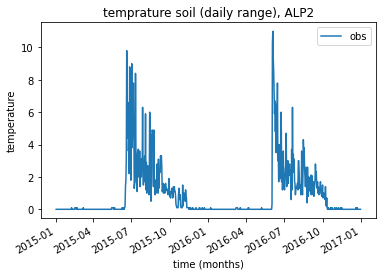

In [8]:
# Diurnal range of temperature plots
for i in range(1,2):
    # Temperature logger="temp200cm","temp30cm","tempabove","tempsoil"
    atm_obs2_sel=atm_obs2[(atm_obs2["siteID"]==siteID2[i])
                            & (atm_obs2["logger"]=="temp200cm")]

    atm_obs2_sel2=atm_obs2[(atm_obs2["siteID"]==siteID2[i])
                            & (atm_obs2["logger"]=="tempsoil")]

    atm_obs2_sel2['date']=pd.to_datetime(atm_obs2_sel2['date'])
    atm_obs2_sel['date']=pd.to_datetime(atm_obs2_sel['date'])
    maskt2 = (atm_obs2_sel2['date'] >= '2015-1-1') & (atm_obs2_sel2['date'] <= '2016-12-31')
    maskt1 = (atm_obs2_sel['date'] >= '2015-1-1') & (atm_obs2_sel['date'] <= '2016-12-31')

    atm_obs2_sel2_rs_max=atm_obs2_sel2.resample('D', on="date").max()
    atm_obs2_sel2_rs_min=atm_obs2_sel2.resample('D', on="date").min()
    #snow=atm_obs2_sel2['value']-atm_obs2_sel['value']
    maskrs = (atm_obs2_sel2_rs_max['date'] >= '2015-1-1') & (atm_obs2_sel2_rs_max['date'] <= '2016-12-31')

    #plt.plot(atm_obs2_sel2.loc[maskt2]['date'],atm_obs2_sel2.loc[maskt2]['value'].to_numpy()-atm_obs2_sel.loc[maskt1]['value'].to_numpy(),label='obs')
    plt.plot(atm_obs2_sel2_rs_max.loc[maskrs]['date'],atm_obs2_sel2_rs_max.loc[maskrs]['value']-atm_obs2_sel2_rs_min.loc[maskrs]['value'],label='obs')

    plt.gcf().autofmt_xdate()

    plt.xlabel("time (months)")
    plt.ylabel("temperature")
    plt.title("temprature soil (daily range), "+sites[i])
    plt.legend(loc='best')
    #plt.grid(True)
    plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/daily_tempsoil"+sites[i]+".png")


In [ ]:
#no enough data: i=2,3
# very good data: i=9

i=0

# Moisture logger="soil.moisture1", "soil.moisture2"
atm_obs4_sel=atm_obs4[(atm_obs4["siteID"]==siteID2[i])
                            & (atm_obs4["logger"]=="soil.moisture1")]
#time_obs4=pd.to_datetime(atm_obs4_sel["date"])
atm_obs4_sel2=atm_obs4[(atm_obs4["siteID"]==siteID2[i])
                            & (atm_obs4["logger"]=="soil.moisture2")]
#time_obs4_2=pd.to_datetime(atm_obs4_sel2["date"])

atm_obs4_sel['date']=pd.to_datetime(atm_obs4_sel['date'])
#atm_obs4_sel.loc['2015-1-1':'2016-12-31']
mask0 = (atm_obs4_sel['date'] >= '2015-1-1') & (atm_obs4_sel['date'] <= '2016-12-31')
#mask0
#atm_obs4_sel.loc['2015-1-1':'2016-12-31']
#atm_obs4_sel.loc[mask0]
atm_obs4_sel2['date']=pd.to_datetime(atm_obs4_sel2['date'])
mask2 = (atm_obs4_sel2['date'] >= '2015-1-1') & (atm_obs4_sel2['date'] <= '2016-12-31')
#mask2
#atm_obs4_sel.loc['2015-1-1':'2016-12-31']
#atm_obs4_sel2.loc[mask2]


#plt.plot(atm_obs4_sel.loc[mask0]['date'],atm_obs4_sel.loc[mask0]['value'],label='obs')
#plt.plot(atm_obs4_sel2.loc[mask2]['date'],atm_obs4_sel2.loc[mask2]['value'],label='obs')
plt.gcf().autofmt_xdate()

In [122]:
atm_obs2_sel2_rs_max=atm_obs2_sel2.resample('D', on="date").max()
atm_obs2_sel2_rs_min=atm_obs2_sel2.resample('D', on="date").min()
#snow=atm_obs2_sel2['value']-atm_obs2_sel['value']
maskrs = (atm_obs2_sel2_rs_max['date'] >= '2015-1-1') & (atm_obs2_sel2_rs_max['date'] <= '2016-12-31')

In [5]:
i=0
# Temperature logger="temp200cm","temp30cm","tempabove","tempsoil"
atm_obs2_sel=atm_obs2[(atm_obs2["siteID"]==siteID2[i])
                            & (atm_obs2["logger"]=="temp200cm")]

atm_obs2_sel2=atm_obs2[(atm_obs2["siteID"]==siteID2[i])
                            & (atm_obs2["logger"]=="tempabove")]

atm_obs2_sel2['date']=pd.to_datetime(atm_obs2_sel2['date'])
mask = (atm_obs2_sel2['date'] >= '2015-1-1') & (atm_obs2_sel2['date'] <= '2016-12-31')
mask

test=atm_obs2_sel2['value']-atm_obs2_sel['value']
test
test=atm_obs2_sel2['value']-atm_obs2_sel['value']
test

#test=atm_obs2_sel2.loc[maskt2]['value'].to_numpy()-atm_obs2_sel.loc[maskt1]['value'].to_numpy()
#print(atm_obs2_sel2.loc[maskt2]['value'])

#test=atm_obs2_sel2.loc[maskt2]['value'].subtract(atm_obs2_sel.loc[maskt1]['value'])

<ipython-input-5-0b2e37f148e4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atm_obs2_sel2['date']=pd.to_datetime(atm_obs2_sel2['date'])


13        NaN
14        NaN
61        NaN
62        NaN
109       NaN
           ..
5078594   NaN
5078641   NaN
5078642   NaN
5078689   NaN
5078690   NaN
Name: value, Length: 211348, dtype: float64

In [10]:
atm_obs2_sel

date      siteID     logger     value flag
9       2008-10-03 10:00:00+00:00  Lavisdalen  temp200cm  2.450836  NaN
57      2008-10-03 11:00:00+00:00  Lavisdalen  temp200cm  3.314240  NaN
105     2008-10-03 12:00:00+00:00  Lavisdalen  temp200cm  3.630219  NaN
153     2008-10-03 13:00:00+00:00  Lavisdalen  temp200cm  3.452332  NaN
201     2008-10-03 14:00:00+00:00  Lavisdalen  temp200cm  3.294525  NaN
...                           ...         ...        ...       ...  ...
5078493 2020-10-23 07:00:00+00:00  Lavisdalen  temp200cm       NaN  NaN
5078541 2020-10-23 08:00:00+00:00  Lavisdalen  temp200cm       NaN  NaN
5078589 2020-10-23 09:00:00+00:00  Lavisdalen  temp200cm       NaN  NaN
5078637 2020-10-23 10:00:00+00:00  Lavisdalen  temp200cm       NaN  NaN
5078685 2020-10-23 11:00:00+00:00  Lavisdalen  temp200cm       NaN  NaN

[105674 rows x 5 columns]

In [42]:
atm_obs4_sel['date']=pd.to_datetime(atm_obs4_sel['date'])
atm_obs4_sel['date']
#atm_obs4_sel.loc['2015-1-1':'2016-12-31']
mask = (atm_obs4_sel['date'] >= '2015-1-1') & (atm_obs4_sel['date'] <= '2016-12-31')
mask
#atm_obs4_sel.loc['2015-1-1':'2016-12-31']
atm_obs4_sel.loc[mask]

<ipython-input-42-cb74623eb613>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atm_obs4_sel['date']=pd.to_datetime(atm_obs4_sel['date'])


date     siteID          logger  value  \
504490 2015-01-01 00:00:00+00:00  Ulvhaugen  soil.moisture1  0.180   
504498 2015-01-01 01:00:00+00:00  Ulvhaugen  soil.moisture1  0.181   
504506 2015-01-01 02:00:00+00:00  Ulvhaugen  soil.moisture1  0.182   
504514 2015-01-01 03:00:00+00:00  Ulvhaugen  soil.moisture1  0.183   
504522 2015-01-01 04:00:00+00:00  Ulvhaugen  soil.moisture1  0.184   
...                          ...        ...             ...    ...   
812361 2016-12-30 22:00:00+00:00  Ulvhaugen  soil.moisture1  0.244   
812374 2016-12-30 23:00:00+00:00  Ulvhaugen  soil.moisture1    NaN   
812375 2016-12-30 23:00:00+00:00  Ulvhaugen  soil.moisture1  0.244   
812388 2016-12-31 00:00:00+00:00  Ulvhaugen  soil.moisture1    NaN   
812389 2016-12-31 00:00:00+00:00  Ulvhaugen  soil.moisture1  0.245   

        sensor.disagree                     flag  
504490            0.010                      NaN  
504498            0.012                      NaN  
504506            0.014                      NaN  
504514            0.017                      NaN  
504522            0.018                      NaN  
...                 ...                      ...  
812361              NaN                      NaN  
812374              NaN  VarianceProblem_TooHigh  
812375              NaN                      NaN  
812388              NaN  VarianceProblem_TooHigh  
812389              NaN                      NaN  

[19971 rows x 6 columns]

In [ ]:
# Daily temperature and precipitation plots

for i in range(0,12):
    fatm=sorted(glob.glob("/home/huitang/saga/work/"+sites[i]+"/clm1pt_"+sites[i]+"_*.nc"))
    datm=xr.open_mfdataset(fatm,concat_dim='time',combine='nested',decode_times=True) #cftime need to be installed
    
    # Quality check with observation: air temperature
    atm_obs_sel=atm_obs[(atm_obs["siteID"]==siteID[i])
                             & (atm_obs["variable"]=="temperature")]
    time_obs=pd.to_datetime(atm_obs_sel["date"])
    atm_obs2_sel=atm_obs2[(atm_obs2["siteID"]==siteID[i])
                            & (atm_obs2["logger"]=="temp200cm")]
    time_obs2=pd.to_datetime(atm_obs2_sel["date"])
    atm_daily=datm["TBOT"].resample(time='1D').mean()-273.15

    plt.plot(time_obs,atm_obs_sel['value'],label='obs grid')
    plt.plot(time_obs2,atm_obs2_sel['value'],label='obs ')
    plt.plot(atm_daily.time,atm_daily[:,0,0].data,label='cruncep')
    #plt.plot(soil_temp_grass_rs.index,soil_temp_grass_rs['soiltemperature'],label='grass')
    #plt.plot(ALP1_moss3['TSOI_10CM']-273.15,label='moss_test3')

    plt.gcf().autofmt_xdate()
    
    plt.xlabel("time (months)")
    plt.ylabel("temperature")
    plt.title("temprature")
    plt.legend(loc='best')
    #plt.grid(True)
    plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/daily_temp_"+sites[i]+".png")
    #plt.show()

    # Quality check with observation: precipitation
    atm_obs_sel=atm_obs[(atm_obs["siteID"]==siteID[i])
                             & (atm_obs["variable"]=="precipitation")]
    time_obs=pd.to_datetime(atm_obs_sel["date"])
    atm_obs3["date"]=pd.to_datetime(atm_obs3["date"])
    atm_obs3_sel=(atm_obs3[(atm_obs3["siteID"]==siteID[i])]).resample('D', on="date").sum()
    #time_obs3=pd.to_datetime(atm_obs3_sel["date"])
    atm_daily=(datm["PRECTmms"].resample(time='1D').mean())*3600*24
    plt.plot(time_obs,atm_obs_sel['value'],label='obs grid')
    plt.plot(atm_obs3_sel.index,atm_obs3_sel['precipitation'],label='obs')
    plt.plot(atm_daily.time,atm_daily[:,0,0].data,label='cruncep')
    #plt.plot(soil_temp_grass_rs.index,soil_temp_grass_rs['soiltemperature'],label='grass')
    #plt.plot(ALP1_moss3['TSOI_10CM']-273.15,label='moss_test3')
    plt.gcf().autofmt_xdate()
    plt.xlabel("time (months)")
    plt.ylabel("precipitation")
    plt.title("precipitation")
    plt.legend(loc='best')
    #plt.grid(True)
    plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/daily_precip_"+sites[i]+".png")
    #plt.show()
    
    plt.plot(time_obs[2190:2855],atm_obs_sel.iloc[2190:2855]['value'],label='obs grid')
    #plt.plot(atm_obs3_sel.index[2002:2367],atm_obs3_sel['precipitation'][2002:2367],label='obs2')
    plt.plot(atm_daily.time[3285:3950],atm_daily[3285:3950,0,0].data,label='cruncep')
    plt.legend(loc='best')
    plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/daily_precip_2015-2016_"+sites[i]+".png")


/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anacon

/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anacon

/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anacon

/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anacon

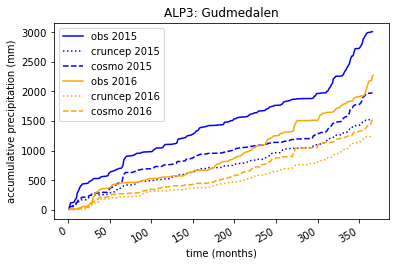

/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anacon

/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anacon

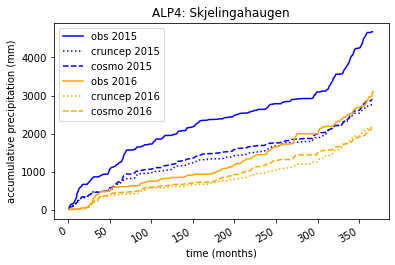

/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anacon

/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anacon

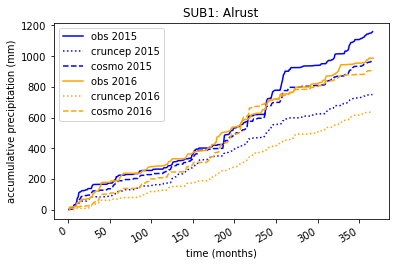

/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anacon

/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anacon

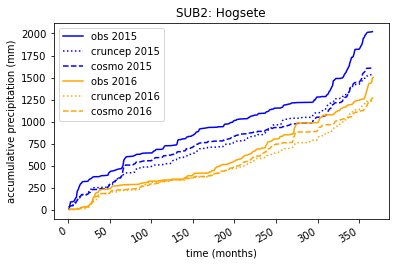

/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anacon

/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anacon

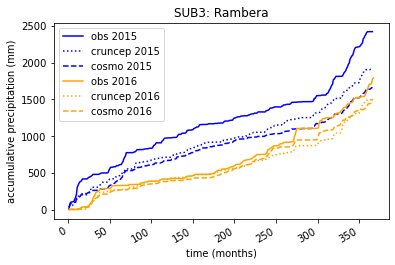

/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anacon

/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


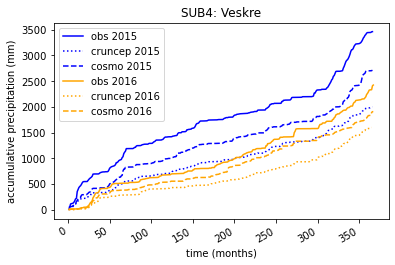

/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anacon

/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anacon

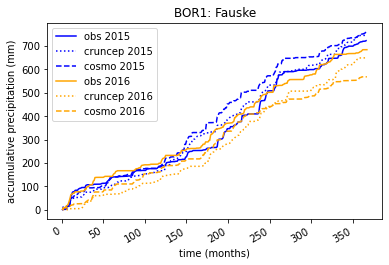

/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anacon

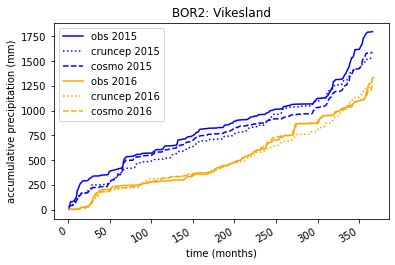

/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anacon

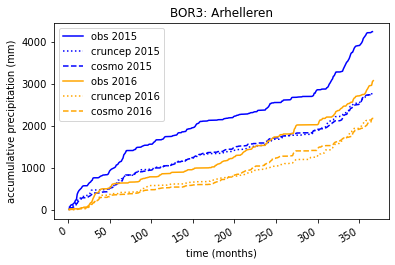

/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anacon

/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/huitang/anacon

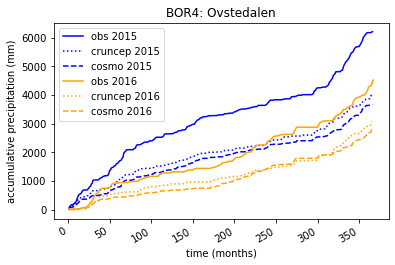

In [11]:
# Accumulative precipitation plots
for i in range(2,12):
    fatm=sorted(glob.glob("/home/huitang/saga/work/"+sites[i]+"/clm1pt_"+sites[i]+"_*.nc"))
    datm=xr.open_mfdataset(fatm,concat_dim='time',combine='nested',decode_times=True) #cftime need to be installed
    fatm2= sorted(glob.glob("/home/huitang/nird/data1/reanalysis/cosmo_6km/SeedClim/clm1pt_cosmorea6_"+sites[i]+"_*.nc"))
    datm2=xr.open_mfdataset(fatm2,concat_dim='time',combine='nested',decode_times=True)
    
    # Quality check with observation: precipitation
    atm_obs_sel=atm_obs[(atm_obs["siteID"]==siteID1[i])
                             & (atm_obs["variable"]=="precipitation")]
    atm_obs3["date"]=pd.to_datetime(atm_obs3["date"])
    atm_obs3_sel=(atm_obs3[(atm_obs3["siteID"]==siteID2[i])]).resample('D', on="date").sum()
    #time_obs3=pd.to_datetime(atm_obs3_sel["date"])
    atm_daily=(datm["PRECTmms"].resample(time='1D').mean())*3600*24
    atm_daily2=(datm2["PRECTmms"].resample(time='1D').mean())*3600*24
    
    date_b='2015-01-01'
    date_e='2016-01-01'
    date_e2='2017-01-01'
    mask_obs = ((atm_obs_sel["date"] >= date_b) 
         & (atm_obs_sel["date"] <= date_e))
    #time_obs=pd.to_datetime(atm_obs_sel.loc[mask_obs]["date"])
#    atm_obs_sel.loc[mask_obs]["value"].cumsum()
  
    time_obs=np.arange(1,367 , 1, dtype=int)
    
    plt.plot(time_obs,atm_obs_sel.loc[mask_obs]["value"].cumsum(),label='obs 2015', color='blue')
    plt.plot(time_obs,atm_daily.sel(time=slice(date_b, date_e))[:,0,0].cumsum().data,label='cruncep 2015', linestyle="dotted", color='blue')
    plt.plot(time_obs,atm_daily2.sel(time=slice(date_b, date_e))[:,0,0].cumsum().data,label='cosmo 2015', linestyle="dashed", color='blue')

 #   plt.plot(atm_obs3_sel.index,atm_obs3_sel['precipitation'],label='obs')
    #plt.plot(soil_temp_grass_rs.index,soil_temp_grass_rs['soiltemperature'],label='grass')
    #plt.plot(ALP1_moss3['TSOI_10CM']-273.15,label='moss_test3')

    mask_obs = ((atm_obs_sel["date"] >= date_e) 
         & (atm_obs_sel["date"] <= date_e2))
    time_obs=np.arange(1,368 , 1, dtype=int)
#    time_obs1=time_obs
    plt.plot(time_obs,atm_obs_sel.loc[mask_obs]["value"].cumsum(),label='obs 2016', color='orange')
    plt.plot(time_obs[0:365],atm_daily.sel(time=slice(date_e, date_e2))[:,0,0].cumsum().data,label='cruncep 2016',linestyle="dotted", color='orange')
    plt.plot(time_obs[0:367],atm_daily2.sel(time=slice(date_e, date_e2))[:,0,0].cumsum().data,label='cosmo 2016', linestyle="dashed", color='orange')

    plt.gcf().autofmt_xdate()
    plt.xlabel("time (months)")
    plt.ylabel("accumulative precipitation (mm)")
    plt.title(sites[i]+": "+siteID1[i])
    plt.legend(loc='best')
    #plt.grid(True)
    plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/daily_precip_"+sites[i]+"_acc_"+date_b+"_cosmo2.png")
    plt.show()
    
    
#    plt.plot(time_obs[2190:2855],atm_obs_sel.iloc[2190:2855]['value'],label='obs grid')
    #plt.plot(atm_obs3_sel.index[2002:2367],atm_obs3_sel['precipitation'][2002:2367],label='obs2')
#    plt.plot(atm_daily.time[3285:3950],atm_daily[3285:3950,0,0].data,label='cruncep')
#    plt.legend(loc='best')
#    plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/daily_precip_2015-2016_"+sites[i]+".png")

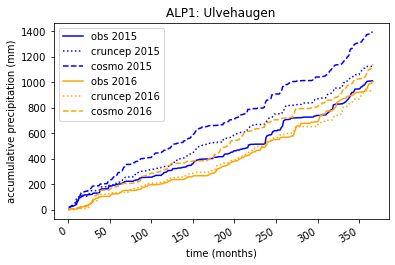

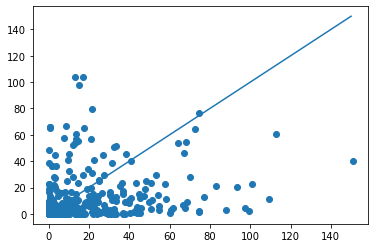

In [27]:
# further check if precipitation matches observation:
plt.scatter(atm_obs_sel.iloc[2190:2555]['value'],atm_daily[3285:3650,0,0],label='obs')
#plt.plot(atm_obs3_sel.index,atm_obs3_sel['precipitation'],label='obs2')
#plt.plot(atm_daily.time,atm_daily[:,0,0].data,label='cruncep')

x = np.linspace(0,150,300)
plt.plot(x, x)

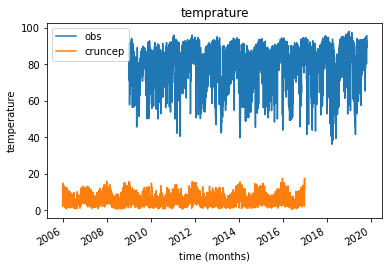

In [7]:
# Quality check with observation: wind

atm_obs_sel=atm_obs[(atm_obs["siteID"]=="Ovstedalen")
                             & (atm_obs["variable"]=="wind")]
time_obs=pd.to_datetime(atm_obs_sel["date"])
#atm_obs3["date"]=pd.to_datetime(atm_obs3["date"])
#atm_obs3_sel=(atm_obs3[(atm_obs3["siteID"]=="Ovstedalen")]).resample('D', on="date").sum()
#time_obs3=pd.to_datetime(atm_obs3_sel["date"])
atm_daily=(datm["WIND"].resample(time='1D').mean())

plt.plot(time_obs,atm_obs_sel['value'],label='obs')
#plt.plot(atm_obs3_sel.index,atm_obs3_sel['precipitation'],label='obs2')
plt.plot(atm_daily.time,atm_daily[:,0,0].data,label='cruncep')
#plt.plot(soil_temp_grass_rs.index,soil_temp_grass_rs['soiltemperature'],label='grass')
#plt.plot(ALP1_moss3['TSOI_10CM']-273.15,label='moss_test3')

plt.gcf().autofmt_xdate()

#plt.xlabel("time (months)")
#plt.ylabel("temperature")
plt.title("temprature")
plt.legend(loc='best')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/daily_wind.png")
plt.show()

In [19]:
# 2. Surface file modification:
# xarray can not do the job: https://github.com/pydata/xarray/issues/1117
# have to use netCDF4 package instead
import netCDF4
import locale          # This is needed to read number in different language or region format correctly

locale.setlocale(locale.LC_ALL, 'nn_NO.utf8')  
# locale.getlocale() # get local language 
# can use shell command to check all the available language format in the system: locale -a  
# test=locale.atof(soil_bd_sel["BD"].iloc[1])  # This can convert , number to . number automatically

# Currently, files are downloaded first from OSF and read
# In future, it will be possible to use osf api to directly fetch files needed: 
# see: https://osfclient.readthedocs.io/en/latest/api/osfclient.html#module-osfclient.cli

# Open observation data file to extract the corresponding values
# File containing vegetation cover info
plant_comp=pd.read_csv("/home/huitang/Documents/MossLichen_testbed/data_raw/FunCaB_clean_composition_2015-2019.csv", index_col=None, header=0)

# File contain soil organic matter info
soil_org=pd.read_csv("/home/huitang/Documents/MossLichen_testbed/data_raw/soilCN_2015.txt", index_col=None, header=0, sep='\t')

soil_bd=pd.read_csv("/home/huitang/Documents/MossLichen_testbed/data_raw/soilBD.txt", index_col=None, header=0, sep='\t').dropna()

# File contain soil depth and texture, etc
soil_info=pd.read_csv("/home/huitang/Documents/MossLichen_testbed/data_raw/Soil_structure_2013-2018_clean.csv", index_col=None, header=0)

topo_info=pd.read_csv("/home/huitang/Documents/MossLichen_testbed/data_raw/SeedClim_Slopes_Aspects.csv", index_col=None, header=0, sep='\t')
#"Soil_structure_2013-2018_clean.csv"
#"soilCN_2015.txt"
#"SeedClim_Slopes_Aspects.csv"

In [23]:
topo_info

siteID blockID  plotID   turfID  year  Slope  Aspect  Unnamed: 7  \
0    Ovstedalen    Ovs1  3030.0  Ovs1RTC  2010   28.0   200.0         NaN   
1    Ovstedalen    Ovs1   286.0  286 TTC  2010   40.0   233.0         NaN   
2    Ovstedalen    Ovs2  3031.0  Ovs2RTC  2010   22.0   210.0         NaN   
3    Ovstedalen    Ovs2   291.0  291 TTC  2010   34.0   176.0         NaN   
4    Ovstedalen    Ovs3  3032.0  Ovs3RTC  2010   28.0   190.0         NaN   
..          ...     ...     ...      ...   ...    ...     ...         ...   
175  Ulvehaugen    Ulv1     NaN      NaN  2012   32.0   255.0         NaN   
176  Ulvehaugen    Ulv2     NaN      NaN  2012   23.0   223.0         NaN   
177  Ulvehaugen    Ulv3     NaN      NaN  2012   21.0   244.0         NaN   
178  Ulvehaugen    Ulv4     NaN      NaN  2012   26.0   210.0         NaN   
179  Ulvehaugen    Ulv5     NaN      NaN  2012   28.0   245.0         NaN   

     Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  
0           NaN         NaN          NaN          NaN          NaN  
1           NaN         NaN          NaN          NaN          NaN  
2           NaN         NaN          NaN          NaN          NaN  
3           NaN         NaN          NaN          NaN          NaN  
4           NaN         NaN          NaN          NaN          NaN  
..          ...         ...          ...          ...          ...  
175         NaN         NaN          NaN          NaN          NaN  
176         NaN         NaN          NaN          NaN          NaN  
177         NaN         NaN          NaN          NaN          NaN  
178         NaN         NaN          NaN          NaN          NaN  
179         NaN         NaN          NaN          NaN          NaN  

[180 rows x 13 columns]

In [36]:
i=0
slop_sel=topo_info[(topo_info["siteID"]==siteID1[i]) & (topo_info["year"]==2010)]["Slope"].mean()
slop_sel

26.0

In [37]:
slop_sel

26.0

In [3]:
sites=["ALP1","ALP2","ALP3","ALP4","SUB1","SUB2","SUB3","SUB4","BOR1","BOR2","BOR3","BOR4"]
siteID1=["Ulvehaugen","Lavisdalen","Gudmedalen","Skjelingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"] 
#siteID2=["Ulvhaugen","Lavisdalen","Gudmedalen","Skjellingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"]
siteID3=["ULV","LAV","GUD","SKJ","ALR","HOG","RAM","VES","FAU","VIK","ARH","OVS"]


blockID=[['Ulv1','Ulv2','Ulv3','Ulv4'],
         ['Lav1','Lav2','Lav3','Lav4'],
         ['Gud12','Gud13','Gud15','Gud5'], #12 13 15 5
         ['Skj1','Skj2','Skj3','Skj4'],
         ['Alr1','Alr2','Alr3','Alr5'], #1, 2,3,5
         ['Hog1','Hog2','Hog3','Hog4'],
         ['Ram4','Ram5','Ram6','Ram8'], #4 5 6 8
         ['Ves1','Ves2','Ves3','Ves4'],
         ['Fau1','Fau2','Fau4','Fau5'], #1 2 4 5
         ['Vik2','Vik3','Vik4','Vik5'], #2, 3,4,5
         ['Arh1','Arh2','Arh3','Arh4'],       
         ['Ovs1','Ovs2','Ovs3','Ovs4']] 

blockID[12]

['Lav1', 'Lav2', 'Lav3', 'Lav4']

In [5]:
blockID[11]

['Ovs1', 'Ovs2', 'Ovs3', 'Ovs4']

In [11]:
# Extract useful information from observation data

#siteID="Ovstedalen"                                  #"Ulvehaugen"
#blockID=['Ovs1','Ovs2','Ovs3','Ovs4']                #"Ulv2"  isin(['Mangos', 'Grapes'])
#treatment="FGB" 
# Bareground: "FGB"
# Moss: "GF" 
# GRASS (Graminoid and Forbs) only: "B"   

#plant_comp_sel=plant_comp[(plant_comp["siteID"]==siteID1[i]) & (plant_comp["treatment"]==treatment)
#                             & (plant_comp["blockID"].isin(blockID))]
#print(plant_comp_sel)


# for version 1.0.2
#!!! BOR3 height need to divide 2, only block 2 and 3 have height value
for i in range(11,12):
    soil_org_sel=soil_org[(soil_org["siteID"]==siteID3[i])
                             & (soil_org["blockID"].isin(['1','2','3','4']))]
    soil_bd_sel=soil_bd[(soil_bd["siteID"]==siteID3[i])] 
    soil_info_sel=soil_info[(soil_info["siteID"]==siteID1[i]) & (soil_info["variable"]=="soil_depth")]
    
    # Number from bulk density is in "comma", need to replace to dot
    # Follow the instruction here: https://herrmann.tech/en/blog/2021/02/05/how-to-deal-with-international-data-formats-in-python.html
    # Bulk density: g/cm3, Carbon content: %, organic: kg/m3
    bd_obs=soil_bd_sel[soil_bd_sel["depth"]=="8"]["BD"].str.replace(',','.').astype(float).mean()  #["BD"].mean()
    c_obs=soil_org_sel[soil_org_sel["depth"]==10]["C"].str.replace(',','.').astype(float).mean()
    org_obs=bd_obs*c_obs/100/1000*1000000/0.58
    org_obs=min(110,org_obs)      #only for ALP1, org_obs has to be less the maximum 130, or else, the simulation will be stopped
    print(org_obs)

    # Soil depth
    sd_obs=soil_info_sel["value"].mean()  # cm
    print(sd_obs)
    
    # Set up surface data file for BOR4 site: bareground - FGB    
    # Open the surface data file to modify
    dset = netCDF4.Dataset('/home/huitang/saga/work/inputdata/lnd/clm2/surfdata_map/'+sites[i]+'/surfdata_'+sites[i]+'_simyr2000_bare_1.0.2.nc', 'r+')
    # Modify percentage vegetation cover of plot
    dset['PCT_NAT_PFT'][0,:,:] = 100
    dset['PCT_NAT_PFT'][1:15,:,:] = 0
    dset['PCT_NATVEG'][:,:] = 100
    dset['PCT_CROP'][:,:] = 0
    dset['PCT_CFT'][:,:,:] = 0
    dset['PCT_WETLAND'][:,:] = 0
    dset['PCT_LAKE'][:,:] = 0
    dset['PCT_GLACIER'][:,:] = 0
    dset['PCT_URBAN'][:,:,:] = 0
    # Modify soil properties
    dset['ORGANIC'][0:3,:,:] = org_obs        # Too much effort, leave for future
    #dset['PCT_SAND'][:,:,:] = 0
    #dset['PCT_CLAY'][:,:,:] = 0
    dset['zbedrock'][:,:] = sd_obs/100       # Modify soil depth:
    # Modify satellite phenology
    #dset['MONTHLY_LAI'][:,:,:,:] = 0
    #dset['MONTHLY_SAI'][:,:,:,:] = 0
    #dset['MONTHLY_HEIGHT_TOP'][:,1,:,:] = 0
    #dset['MONTHLY_HEIGHT_BOT'][:,1,:,:] = 0
    # Modify topography
    dset['SLOPE'][:,:] = 20.0
    dset.close()

    dset = netCDF4.Dataset('/home/huitang/saga/work/inputdata/lnd/clm2/surfdata_map/'+sites[i]+'/surfdata_'+sites[i]+'_simyr2000_moss_1.0.2.nc', 'r+')

    plant_comp_sel=plant_comp[(plant_comp["siteID"]==siteID1[i]) & (plant_comp["treatment"]=="GF")
                             & (plant_comp["blockID"].isin(blockID[i])) & (plant_comp["year"]==2015)]

    print(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_bryophytes"])
    print(plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_bryophytes"])
    print(plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_bryophytes"])
    print(plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_bryophytes"])

    plant_cover_obs=(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_bryophytes"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_bryophytes"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_bryophytes"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_bryophytes"])/4

    plant_cover_obs=min(plant_cover_obs,100.0)

    plant_comp_sel=plant_comp[(plant_comp["siteID"]==siteID1[i]) & (plant_comp["treatment"]=="GF")
                             & (plant_comp["blockID"].isin(blockID[i])) & (plant_comp["year"]==2017)]
    print(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["moss_height"])
    print(plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["moss_height"])
    print(plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["moss_height"])
    print(plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["moss_height"])

    plant_height_obs=(
                  plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["moss_height"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["moss_height"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["moss_height"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["moss_height"]
                  )/4
    # BOR3 height need to divide 2, only block 2 and 3 have height value
    
    #plant_height_obs=(37.5+20+11)/3
    # Modify percentage vegetation cover of plot
    dset['PCT_NAT_PFT'][0,:,:] = 100-plant_cover_obs
    dset['PCT_NAT_PFT'][1,:,:] = plant_cover_obs
    dset['PCT_NAT_PFT'][2:15,:,:] = 0
    dset['PCT_NATVEG'][:,:] = 100
    dset['PCT_CROP'][:,:] = 0
    dset['PCT_CFT'][:,:,:] = 0
    dset['PCT_WETLAND'][:,:] = 0
    dset['PCT_LAKE'][:,:] = 0
    dset['PCT_GLACIER'][:,:] = 0
    dset['PCT_URBAN'][:,:,:] = 0

    # Modify soil properties
    dset['ORGANIC'][0:3,:,:] = org_obs        # Too much effort, leave for future
    #dset['PCT_SAND'][:,:,:] = 0
    #dset['PCT_CLAY'][:,:,:] = 0
    dset['zbedrock'][:,:] = sd_obs/100       # Modify soil depth:

    # Modify satellite phenology
    dset['MONTHLY_LAI'][:,1,:,:] = 2.0
    dset['MONTHLY_SAI'][:,1,:,:] = 0.5
    dset['MONTHLY_HEIGHT_TOP'][:,1,:,:] = plant_height_obs/1000
    dset['MONTHLY_HEIGHT_BOT'][:,1,:,:] = 0.001/1000

    # Modify topography
    dset['SLOPE'][:,:] = 20.0
    dset.close()
    
    
    dset = netCDF4.Dataset('/home/huitang/saga/work/inputdata/lnd/clm2/surfdata_map/'+sites[i]+'/surfdata_'+sites[i]+'_simyr2000_grass_1.0.2.nc', 'r+')
    plant_comp_sel=plant_comp[(plant_comp["siteID"]==siteID1[i]) & (plant_comp["treatment"]=="B")
                             & (plant_comp["blockID"].isin(blockID[i])) & (plant_comp["year"]==2015)]
    
    plant_cover_total=plant_comp_sel["total_graminoids"]+plant_comp_sel["total_forbs"]

    plant_cover_obs=(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_graminoids"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_graminoids"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_graminoids"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_graminoids"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_forbs"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_forbs"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_forbs"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_forbs"])/4
    
    plant_cover_obs=min(plant_cover_obs,100.0)
    
    print(plant_cover_obs)


    plant_height_obs=(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["vegetation_height"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["vegetation_height"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["vegetation_height"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["vegetation_height"])/4
    
    print(plant_height_obs)
    
    # Modify percentage vegetation cover of plot
    dset['PCT_NAT_PFT'][0,:,:] = 100-plant_cover_obs
    dset['PCT_NAT_PFT'][1:12,:,:] = 0
    dset['PCT_NAT_PFT'][12,:,:] = plant_cover_obs
    dset['PCT_NAT_PFT'][13:15,:,:] = 0
    dset['PCT_NATVEG'][:,:] = 100
    dset['PCT_CROP'][:,:] = 0
    dset['PCT_CFT'][:,:,:] = 0
    dset['PCT_WETLAND'][:,:] = 0
    dset['PCT_LAKE'][:,:] = 0
    dset['PCT_GLACIER'][:,:] = 0
    dset['PCT_URBAN'][:,:,:] = 0
    # Modify soil properties
    dset['ORGANIC'][0:3,:,:] = org_obs        # Too much effort, leave for future
    #dset['PCT_SAND'][:,:,:] = 0
    #dset['PCT_CLAY'][:,:,:] = 0
    dset['zbedrock'][:,:] = sd_obs/100       # Modify soil depth:

    # Modify satellite phenology
    #dset['MONTHLY_LAI'][:,:,:,:] = 0
    #dset['MONTHLY_SAI'][:,:,:,:] = 0
    dset['MONTHLY_HEIGHT_TOP'][:,12,:,:] = plant_height_obs/1000
    dset['MONTHLY_HEIGHT_BOT'][:,12,:,:] = 0.001/1000
    # Modify topography
    dset['SLOPE'][:,:] = 20.0
    dset.close()

55.13902541391724
19.926666666666666


<ipython-input-11-c36de4c52f4a>:67: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_bryophytes"])
<ipython-input-11-c36de4c52f4a>:68: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_bryophytes"])
<ipython-input-11-c36de4c52f4a>:69: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_bryophytes"])
<ipython-input-11-c36de4c52f4a>:70: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_bryophytes"])
<ipython-input-11-c36de4c52f4a>:72: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plant_cover_obs=(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0][

90.0
95.0
75.0
10.0
37.5
11.0
20.0
8.5
92.5
113.75


<ipython-input-11-c36de4c52f4a>:130: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plant_cover_obs=(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_graminoids"]
<ipython-input-11-c36de4c52f4a>:131: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_graminoids"]
<ipython-input-11-c36de4c52f4a>:132: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_graminoids"]
<ipython-input-11-c36de4c52f4a>:133: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_graminoids"]
<ipython-input-11-c36de4c52f4a>:134: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_forbs"]
<ipy

In [41]:
# For version: 1.1.4
#!!! BOR3 height need to divide 2, only block 2 and 3 have height value

for i in range(10,11):
    soil_org_sel=soil_org[(soil_org["siteID"]==siteID3[i])
                             & (soil_org["blockID"].isin(['1','2','3','4']))]
    soil_bd_sel=soil_bd[(soil_bd["siteID"]==siteID3[i])] 
    soil_info_sel=soil_info[(soil_info["siteID"]==siteID1[i]) & (soil_info["variable"]=="soil_depth")]
    
    # Number from bulk density is in "comma", need to replace to dot
    # Follow the instruction here: https://herrmann.tech/en/blog/2021/02/05/how-to-deal-with-international-data-formats-in-python.html
    # Bulk density: g/cm3, Carbon content: %, organic: kg/m3
    bd_obs=soil_bd_sel[soil_bd_sel["depth"]=="8"]["BD"].str.replace(',','.').astype(float).mean()  #["BD"].mean()
    c_obs=soil_org_sel[soil_org_sel["depth"]==10]["C"].str.replace(',','.').astype(float).mean()
    org_obs=bd_obs*c_obs/100/1000*1000000/0.58
    org_obs=min(110,org_obs)      #only for ALP1, org_obs has to be less the maximum 130, or else, the simulation will be stopped
    print(org_obs)

    # Soil depth
    sd_obs=soil_info_sel["value"].mean()  # cm
    print(sd_obs)
    
    # Slpe 
    
    slop_obs=topo_info[(topo_info["siteID"]==siteID1[i]) & (topo_info["year"]==2010)]["Slope"].mean()
    print(slop_obs)
    
    # Set up surface data file for BOR4 site: bareground - FGB    
    # Open the surface data file to modify
    dset = netCDF4.Dataset('/home/huitang/saga/work/inputdata/lnd/clm2/surfdata_map/'+sites[i]+'/surfdata_'+sites[i]+'_simyr2000_bare_1.1.4.nc', 'r+')
    # Modify percentage vegetation cover of plot
    dset['PCT_NAT_PFT'][0,:,:] = 100
    dset['PCT_NAT_PFT'][1:15,:,:] = 0
    dset['PCT_NATVEG'][:,:] = 100
    dset['PCT_CROP'][:,:] = 0
    dset['PCT_CFT'][:,:,:] = 0
    dset['PCT_WETLAND'][:,:] = 0
    dset['PCT_LAKE'][:,:] = 0
    dset['PCT_GLACIER'][:,:] = 0
    dset['PCT_URBAN'][:,:,:] = 0
    # Modify soil properties
    dset['ORGANIC'][0:3,:,:] = org_obs        # Too much effort, leave for future
    #dset['PCT_SAND'][:,:,:] = 0
    #dset['PCT_CLAY'][:,:,:] = 0
    dset['zbedrock'][:,:] = sd_obs/100       # Modify soil depth:
    # Modify satellite phenology
    #dset['MONTHLY_LAI'][:,:,:,:] = 0
    #dset['MONTHLY_SAI'][:,:,:,:] = 0
    #dset['MONTHLY_HEIGHT_TOP'][:,1,:,:] = 0
    #dset['MONTHLY_HEIGHT_BOT'][:,1,:,:] = 0
    # Modify topography
    dset['SLOPE'][:,:] = slop_obs
    dset.close()

    dset = netCDF4.Dataset('/home/huitang/saga/work/inputdata/lnd/clm2/surfdata_map/'+sites[i]+'/surfdata_'+sites[i]+'_simyr2000_moss_1.1.4.nc', 'r+')

    plant_comp_sel=plant_comp[(plant_comp["siteID"]==siteID1[i]) & (plant_comp["treatment"]=="GF")
                             & (plant_comp["blockID"].isin(blockID[i])) & (plant_comp["year"]==2015)]

    print(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_bryophytes"])
    print(plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_bryophytes"])
    print(plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_bryophytes"])
    print(plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_bryophytes"])

    plant_cover_obs=(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_bryophytes"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_bryophytes"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_bryophytes"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_bryophytes"])/4

    plant_cover_obs=min(plant_cover_obs,100.0)

    plant_comp_sel=plant_comp[(plant_comp["siteID"]==siteID1[i]) & (plant_comp["treatment"]=="GF")
                             & (plant_comp["blockID"].isin(blockID[i])) & (plant_comp["year"]==2017)]
 #   print(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["moss_height"])
    print(plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["moss_height"])
    print(plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["moss_height"])
 #   print(plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["moss_height"])

    plant_height_obs=(
 #                 plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["moss_height"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["moss_height"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["moss_height"]
 #                +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["moss_height"]
                  )/4
    # BOR3 height need to divide 2, only block 2 and 3 have height value
    
    #plant_height_obs=(37.5+20+11)/3
    # Modify percentage vegetation cover of plot
    dset['PCT_NAT_PFT'][0,:,:] = 100-plant_cover_obs
    dset['PCT_NAT_PFT'][1,:,:] = plant_cover_obs
    dset['PCT_NAT_PFT'][2:15,:,:] = 0
    dset['PCT_NATVEG'][:,:] = 100
    dset['PCT_CROP'][:,:] = 0
    dset['PCT_CFT'][:,:,:] = 0
    dset['PCT_WETLAND'][:,:] = 0
    dset['PCT_LAKE'][:,:] = 0
    dset['PCT_GLACIER'][:,:] = 0
    dset['PCT_URBAN'][:,:,:] = 0

    # Modify soil properties
    dset['ORGANIC'][0:3,:,:] = org_obs        # Too much effort, leave for future
    #dset['PCT_SAND'][:,:,:] = 0
    #dset['PCT_CLAY'][:,:,:] = 0
    dset['zbedrock'][:,:] = sd_obs/100       # Modify soil depth:

    # Modify satellite phenology
    dset['MONTHLY_LAI'][:,1,:,:] = 2.0
    dset['MONTHLY_SAI'][:,1,:,:] = 0.5
    dset['MONTHLY_HEIGHT_TOP'][:,1,:,:] = plant_height_obs/1000
    dset['MONTHLY_HEIGHT_BOT'][:,1,:,:] = 0.001/1000

    # Modify topography
    dset['SLOPE'][:,:] = slop_obs
    dset.close()
    
    
    dset = netCDF4.Dataset('/home/huitang/saga/work/inputdata/lnd/clm2/surfdata_map/'+sites[i]+'/surfdata_'+sites[i]+'_simyr2000_grass_1.1.4.nc', 'r+')
    plant_comp_sel=plant_comp[(plant_comp["siteID"]==siteID1[i]) & (plant_comp["treatment"]=="B")
                             & (plant_comp["blockID"].isin(blockID[i])) & (plant_comp["year"]==2015)]
    
    plant_cover_total=plant_comp_sel["total_graminoids"]+plant_comp_sel["total_forbs"]

    plant_cover_obs=(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_graminoids"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_graminoids"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_graminoids"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_graminoids"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_forbs"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_forbs"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_forbs"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_forbs"])/4
    
    plant_cover_obs=min(plant_cover_obs,100.0)
    
    print(plant_cover_obs)


    plant_height_obs=(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["vegetation_height"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["vegetation_height"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["vegetation_height"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["vegetation_height"])/4
    
    print(plant_height_obs)
    
    # Modify percentage vegetation cover of plot
    dset['PCT_NAT_PFT'][0,:,:] = 100-plant_cover_obs
    dset['PCT_NAT_PFT'][1:12,:,:] = 0
    dset['PCT_NAT_PFT'][12,:,:] = plant_cover_obs
    dset['PCT_NAT_PFT'][13:15,:,:] = 0
    dset['PCT_NATVEG'][:,:] = 100
    dset['PCT_CROP'][:,:] = 0
    dset['PCT_CFT'][:,:,:] = 0
    dset['PCT_WETLAND'][:,:] = 0
    dset['PCT_LAKE'][:,:] = 0
    dset['PCT_GLACIER'][:,:] = 0
    dset['PCT_URBAN'][:,:,:] = 0
    # Modify soil properties
    dset['ORGANIC'][0:3,:,:] = org_obs        # Too much effort, leave for future
    #dset['PCT_SAND'][:,:,:] = 0
    #dset['PCT_CLAY'][:,:,:] = 0
    dset['zbedrock'][:,:] = sd_obs/100       # Modify soil depth:

    # Modify satellite phenology
    #dset['MONTHLY_LAI'][:,:,:,:] = 0
    #dset['MONTHLY_SAI'][:,:,:,:] = 0
    dset['MONTHLY_HEIGHT_TOP'][:,12,:,:] = plant_height_obs/1000
    dset['MONTHLY_HEIGHT_BOT'][:,12,:,:] = 0.001/1000
    # Modify topography
    dset['SLOPE'][:,:] = slop_obs
    dset.close()

72.70368549972328
10.493333333333334
21.4


<ipython-input-41-f6d6bd89e20d>:60: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_bryophytes"])
<ipython-input-41-f6d6bd89e20d>:61: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_bryophytes"])
<ipython-input-41-f6d6bd89e20d>:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_bryophytes"])
<ipython-input-41-f6d6bd89e20d>:63: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_bryophytes"])
<ipython-input-41-f6d6bd89e20d>:65: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plant_cover_obs=(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0][

80.0
6.0
30.0
75.0
31.25
13.75
100.0
117.5


<ipython-input-41-f6d6bd89e20d>:123: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plant_cover_obs=(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_graminoids"]
<ipython-input-41-f6d6bd89e20d>:124: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_graminoids"]
<ipython-input-41-f6d6bd89e20d>:125: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_graminoids"]
<ipython-input-41-f6d6bd89e20d>:126: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_graminoids"]
<ipython-input-41-f6d6bd89e20d>:127: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_forbs"]
<ipy

In [16]:
siteID3=["ULV","LAV","GUD","SKJ","ALR","HOG","RAM","VES","FAU","VIK","ARH","OVS"]
soil_org_sel=soil_org[(soil_org["siteID"]==siteID3[i])
                             & (soil_org["blockID"].isin(['1','2','3','4']))]
soil_bd_sel=soil_bd[(soil_bd["siteID"]==siteID3[i])] 
soil_info_sel=soil_info[(soil_info["siteID"]==siteID1[i]) & (soil_info["variable"]=="soil_depth")]

In [21]:
soil_org_sel
soil_bd_sel

siteID sample depth    tray tray_wetweight tray_dryweight   roots  \
90     LAV    1_1     4  3,8043        91,3723        58,7869   0,601   
92     LAV    2_1     4  3,8058        61,7364        48,2089  0,6002   
94     LAV    3_1     4  3,8143       102,5915        70,1371  0,4505   
96     LAV    4_1     4  3,7952       117,7688        77,0876  0,3648   
97     LAV    4_2     8  3,8025        137,831         107,04  0,0833   
98     LAV    5_1     4  3,7993       102,2406        52,0668  0,4217   
99     LAV    5_2     8  3,7751        90,0959        54,4923  0,1489   
120    LAV    6_1     4  3,8116        55,5365        30,3837  0,6824   
121    LAV    7_1     2  3,8004        56,0778        40,3793  0,1554   

       other soil_dryweight           BD  
90   12,5953        41,7863  0,424139146  
92   30,8085        12,9944   0,13189571  
94   17,8792        47,9931  0,487139385  
96   17,3949        55,5327  0,563667804  
97   27,0465        76,1077  0,772508093  
98    9,3317        38,5141  0,390925674  
99    4,4624        46,1059  0,467983934  
120   1,0393        24,8504  0,252236437  
121   4,8431        31,5804  0,320547258

In [298]:
#blockID[i][3]
plant_comp_sel[plant_comp["blockID"]==blockID[i][0]] #.iloc[0]["moss_height"]
#plant_comp_sel

plant_comp_sel#[plant_comp["blockID"]==blockID[i][0]] #.iloc[0]["total_bryophytes"])

plant_comp_sel=plant_comp[(plant_comp["siteID"]==siteID1[i]) & (plant_comp["treatment"]=="GF")
                             #& (plant_comp["blockID"].isin(blockID[i])) 
                             & (plant_comp["year"]==2017)]
plant_comp_sel

<ipython-input-298-7d300e42ce80>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plant_comp_sel[plant_comp["blockID"]==blockID[i][0]] #.iloc[0]["moss_height"]


year      siteID blockID  plotID treatment  total_graminoids  \
16968  2017  Arhelleren    Arh4  Arh4GF        GF               NaN   
16969  2017  Arhelleren    Arh2  Arh2GF        GF               NaN   
16987  2017  Arhelleren    Arh2  Arh2GF        GF               NaN   
16990  2017  Arhelleren    Arh3  Arh3GF        GF               NaN   

       total_forbs  total_bryophytes  vegetation_height  moss_height  litter  \
16968          NaN              98.0                NaN          NaN     5.0   
16969          NaN              40.0              31.25        31.25    20.0   
16987          NaN              80.0                NaN        19.75     5.0   
16990          NaN              85.0                NaN        13.75    15.0   

      species  cover functional_group  sumcover recorder turfID  
16968     NaN    NaN              NaN       NaN       FJ    NaN  
16969     NaN    NaN              NaN       NaN       LV    NaN  
16987     NaN    NaN              NaN       NaN       LV    NaN  
16990     NaN    NaN              NaN       NaN       FJ    NaN

In [297]:
plant_comp_sel=plant_comp[(plant_comp["siteID"]==siteID1[i]) & (plant_comp["treatment"]=="GF")
                             & (plant_comp["blockID"].isin(blockID[i])) & (plant_comp["year"]==2015)]
plant_comp_sel

year      siteID blockID  plotID treatment  total_graminoids  \
751    2015  Arhelleren    Arh1  Arh1GF        GF              38.0   
758    2015  Arhelleren    Arh2  Arh2GF        GF              87.0   
766    2015  Arhelleren    Arh4  Arh4GF        GF              45.0   
773    2015  Arhelleren    Arh3  Arh3GF        GF              58.0   
1909   2015  Arhelleren    Arh1  Arh1GF        GF              38.0   
1920   2015  Arhelleren    Arh4  Arh4GF        GF              45.0   
2323   2015  Arhelleren    Arh1  Arh1GF        GF              38.0   
2330   2015  Arhelleren    Arh2  Arh2GF        GF              87.0   
2337   2015  Arhelleren    Arh4  Arh4GF        GF              45.0   
2344   2015  Arhelleren    Arh3  Arh3GF        GF              58.0   
2994   2015  Arhelleren    Arh3  Arh3GF        GF              58.0   
3371   2015  Arhelleren    Arh1  Arh1GF        GF              38.0   
3379   2015  Arhelleren    Arh3  Arh3GF        GF              58.0   
3959   2015  Arhelleren    Arh1  Arh1GF        GF              38.0   
3965   2015  Arhelleren    Arh3  Arh3GF        GF              58.0   
4980   2015  Arhelleren    Arh1  Arh1GF        GF              38.0   
4987   2015  Arhelleren    Arh4  Arh4GF        GF              45.0   
5162   2015  Arhelleren    Arh2  Arh2GF        GF              87.0   
5168   2015  Arhelleren    Arh3  Arh3GF        GF              58.0   
6956   2015  Arhelleren    Arh1  Arh1GF        GF              38.0   
6963   2015  Arhelleren    Arh2  Arh2GF        GF              87.0   
6971   2015  Arhelleren    Arh4  Arh4GF        GF              45.0   
7881   2015  Arhelleren    Arh1  Arh1GF        GF              38.0   
7890   2015  Arhelleren    Arh3  Arh3GF        GF              58.0   
8007   2015  Arhelleren    Arh1  Arh1GF        GF              38.0   
8011   2015  Arhelleren    Arh2  Arh2GF        GF              87.0   
8047   2015  Arhelleren    Arh4  Arh4GF        GF              45.0   
8601   2015  Arhelleren    Arh1  Arh1GF        GF              38.0   
8751   2015  Arhelleren    Arh1  Arh1GF        GF              38.0   
8755   2015  Arhelleren    Arh2  Arh2GF        GF              87.0   
8760   2015  Arhelleren    Arh4  Arh4GF        GF              45.0   
8765   2015  Arhelleren    Arh3  Arh3GF        GF              58.0   
8880   2015  Arhelleren    Arh1  Arh1GF        GF              38.0   
8885   2015  Arhelleren    Arh2  Arh2GF        GF              87.0   
8896   2015  Arhelleren    Arh3  Arh3GF        GF              58.0   
10157  2015  Arhelleren    Arh2  Arh2GF        GF              87.0   
10563  2015  Arhelleren    Arh1  Arh1GF        GF              38.0   
10570  2015  Arhelleren    Arh2  Arh2GF        GF              87.0   
10578  2015  Arhelleren    Arh4  Arh4GF        GF              45.0   
10585  2015  Arhelleren    Arh3  Arh3GF        GF              58.0   
11223  2015  Arhelleren    Arh1  Arh1GF        GF              38.0   
11228  2015  Arhelleren    Arh2  Arh2GF        GF              87.0   
11232  2015  Arhelleren    Arh4  Arh4GF        GF              45.0   
11477  2015  Arhelleren    Arh2  Arh2GF        GF              87.0   
11526  2015  Arhelleren    Arh4  Arh4GF        GF              45.0   
11604  2015  Arhelleren    Arh4  Arh4GF        GF              45.0   
11832  2015  Arhelleren    Arh1  Arh1GF        GF              38.0   
11838  2015  Arhelleren    Arh2  Arh2GF        GF              87.0   
13033  2015  Arhelleren    Arh4  Arh4GF        GF              45.0   
13068  2015  Arhelleren    Arh1  Arh1GF        GF              38.0   
14070  2015  Arhelleren    Arh1  Arh1GF        GF              38.0   
14695  2015  Arhelleren    Arh1  Arh1GF        GF              38.0   
14701  2015  Arhelleren    Arh2  Arh2GF        GF              87.0   
14704  2015  Arhelleren    Arh4  Arh4GF        GF              45.0   
14951  2015  Arhelleren    Arh1  Arh1GF        GF              38.0   
15629  2015  Arhelleren    Arh1

In [58]:
    i=0
    # Set up surface data file for BOR4 site: bareground - FGB    
    # Open the surface data file to modify
    dset = netCDF4.Dataset('/home/huitang/saga/work/inputdata/lnd/clm2/surfdata_map/'+sites[i]+'/surfdata_'+sites[i]+'_simyr2000_bare.nc', 'r+')
    # Modify percentage vegetation cover of plot
    dset['PCT_NAT_PFT'][0,:,:] = 100
    dset['PCT_NAT_PFT'][1:15,:,:] = 0
    dset['PCT_NATVEG'][:,:] = 100
    dset['PCT_CROP'][:,:] = 0
    dset['PCT_CFT'][:,:,:] = 0
    dset['PCT_WETLAND'][:,:] = 0
    dset['PCT_LAKE'][:,:] = 0
    dset['PCT_GLACIER'][:,:] = 0
    dset['PCT_URBAN'][:,:,:] = 0
    # Modify soil properties
    dset['ORGANIC'][0:3,:,:] = org_obs        # Too much effort, leave for future
    #dset['PCT_SAND'][:,:,:] = 0
    #dset['PCT_CLAY'][:,:,:] = 0
    dset['zbedrock'][:,:] = sd_obs/100       # Modify soil depth:
    # Modify satellite phenology
    #dset['MONTHLY_LAI'][:,:,:,:] = 0
    #dset['MONTHLY_SAI'][:,:,:,:] = 0
    #dset['MONTHLY_HEIGHT_TOP'][:,1,:,:] = 0
    #dset['MONTHLY_HEIGHT_BOT'][:,1,:,:] = 0
    # Modify topography
    dset['SLOPE'][:,:] = 0
    dset.close()

In [189]:
# 2, 4,6,8,9,10

for i in range(10,11):

    plant_comp_sel=plant_comp[(plant_comp["siteID"]==siteID1[i]) & (plant_comp["treatment"]=="GF")
                             & (plant_comp["blockID"].isin(blockID[i])) & (plant_comp["year"]==2015)]
    print(siteID1[i])
#    print("a1=",plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_bryophytes"])
#    print("a2=",plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_bryophytes"])
#    print("a3=",plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_bryophytes"])
#    print("a4=",plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_bryophytes"])

    plant_cover_obs=(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_bryophytes"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_bryophytes"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_bryophytes"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_bryophytes"])/4


    plant_comp_sel=plant_comp[(plant_comp["siteID"]==siteID1[i]) & (plant_comp["treatment"]=="GF")
                             & (plant_comp["blockID"].isin(blockID[i])) & (plant_comp["year"]==2017)]
#    print("b1=",plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["moss_height"])
#    print("b2=",plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["moss_height"])
#    print("b3=",plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["moss_height"])
#    print("b4=",plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["moss_height"])

    plant_height_obs=(
#                  plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["moss_height"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["moss_height"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["moss_height"]
#                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["moss_height"]
                     )/2
    
    print(plant_cover_obs)
    print(plant_height_obs)

Arhelleren
47.75
22.5


<ipython-input-189-d251147b4095>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plant_cover_obs=(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_bryophytes"]
<ipython-input-189-d251147b4095>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_bryophytes"]
<ipython-input-189-d251147b4095>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_bryophytes"]
<ipython-input-189-d251147b4095>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_bryophytes"])/4
<ipython-input-189-d251147b4095>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["moss_height"]
<

In [178]:
# 2, 4,6,8,9,10

for i in range(0,1):

    plant_comp_sel=plant_comp[(plant_comp["siteID"]==siteID1[i]) & (plant_comp["treatment"]=="GF")
 #                            & (plant_comp["blockID"].isin(blockID[i])) 
                              & (plant_comp["year"]==2015)
                             ]


#    plant_comp_sel=plant_comp[(plant_comp["siteID"]==siteID1[i]) & (plant_comp["treatment"]=="GF")
#                             & (plant_comp["blockID"].isin(blockID[i]))]
plant_comp_sel

year      siteID blockID  plotID treatment  total_graminoids  \
580    2015  Ulvehaugen    Ulv1  Ulv1GF        GF              70.0   
588    2015  Ulvehaugen    Ulv2  Ulv2GF        GF              36.0   
595    2015  Ulvehaugen    Ulv3  Ulv3GF        GF              48.0   
601    2015  Ulvehaugen    Ulv4  Ulv4GF        GF              23.0   
1343   2015  Ulvehaugen    Ulv1  Ulv1GF        GF              70.0   
...     ...         ...     ...     ...       ...               ...   
14827  2015  Ulvehaugen    Ulv3  Ulv3GF        GF              48.0   
15330  2015  Ulvehaugen    Ulv1  Ulv1GF        GF              70.0   
15336  2015  Ulvehaugen    Ulv2  Ulv2GF        GF              36.0   
15344  2015  Ulvehaugen    Ulv3  Ulv3GF        GF              48.0   
15554  2015  Ulvehaugen    Ulv2  Ulv2GF        GF              36.0   

       total_forbs  total_bryophytes  vegetation_height  moss_height  litter  \
580           48.0              30.0               40.0          NaN    15.0   
588           83.0              80.0               30.0          NaN     2.0   
595           60.0              30.0               40.0          NaN    23.0   
601           70.0               6.0               23.0          NaN    12.0   
1343          48.0              30.0               40.0          NaN    15.0   
...            ...               ...                ...          ...     ...   
14827         60.0              30.0               40.0          NaN    23.0   
15330         48.0              30.0               40.0          NaN    15.0   
15336         83.0              80.0               30.0          NaN     2.0   
15344         60.0              30.0               40.0          NaN    23.0   
15554         83.0              80.0               30.0          NaN     2.0   

       species  cover functional_group   sumcover recorder turfID  
580    Agr.cap   15.0        graminoid  35.000000       FJ    NaN  
588    Agr.cap    2.0        graminoid  28.000000       RG    NaN  
595    Agr.cap    2.0        graminoid  46.857143       FJ    NaN  
601    Agr.cap    8.0        graminoid  28.000000       RG    NaN  
1343   Alc.alp   25.0             forb  57.000000       FJ    NaN  
...        ...    ...              ...        ...      ...    ...  
14827  Ver.fru    3.0             forb  86.000000       FJ    NaN  
15330  Vio.bif    3.0             forb  57.000000       FJ    NaN  
15336  Vio.bif    5.0             forb  63.000000       RG    NaN  
15344  Vio.bif    8.0             forb  86.000000       FJ    NaN  
15554  Vio.pal    1.0             forb  63.000000       RG    NaN  

[87 rows x 17 columns]

In [105]:
plant_comp

year      siteID blockID   plotID treatment  total_graminoids  \
0      2016  Gudmedalen    Gud5   Gud4XC        XC              30.0   
1      2016  Gudmedalen    Gud5    Gud5C         C              30.0   
2      2016  Gudmedalen    Gud5   Gud3XC        XC              60.0   
3      2016      Fauske    Fau2   Fau4XC        XC              90.0   
4      2016      Fauske    Fau2   Fau2XC        XC              65.0   
...     ...         ...     ...      ...       ...               ...   
17178  2019      Veskre    Ves1  Ves1FGB       FGB               NaN   
17179  2019      Veskre    Ves1   Ves1GF        GF               NaN   
17180  2019      Veskre    Ves2   Ves2GF        GF               NaN   
17181  2019      Veskre    Ves2  Ves2FGB       FGB               NaN   
17182  2019     Rambera    Ram6  Ram6FGB       FGB               NaN   

       total_forbs  total_bryophytes  vegetation_height  moss_height  litter  \
0             60.0               7.0              37.50          NaN    10.0   
1             70.0              10.0              45.00          NaN    10.0   
2             40.0              15.0              38.75          NaN     5.0   
3             20.0              30.0             160.00        5.000    10.0   
4             60.0              50.0             100.00        5.000    20.0   
...            ...               ...                ...          ...     ...   
17178          NaN               NaN                NaN          NaN    14.0   
17179          NaN              46.0                NaN       26.500     8.0   
17180          NaN              95.0                NaN       34.375     4.0   
17181          NaN               NaN                NaN       62.000     NaN   
17182          NaN               NaN                NaN          NaN    15.0   

       species  cover functional_group  sumcover recorder turfID  
0      Ach.mil    6.0             forb      68.0       RG    NaN  
1      Ach.mil    8.0             forb      66.0       RG    NaN  
2      Ach.mil    2.0             forb      47.0       RG    NaN  
3      Ach.mil    5.0             forb      43.0       FJ    NaN  
4      Ach.mil   12.0             forb      70.0       FJ    NaN  
...        ...    ...              ...       ...      ...    ...  
17178      NaN    NaN              NaN       NaN       FJ    NaN  
17179      NaN    NaN              NaN       NaN       FJ    NaN  
17180      NaN    NaN              NaN       NaN       FJ    NaN  
17181      NaN    NaN              NaN       NaN       FJ    NaN  
17182      NaN    NaN              NaN       NaN      IJD    NaN  

[17183 rows x 17 columns]

In [157]:
# Set up surface data file for BOR4 site: moss - GF

# Open the surface data file to modify
#bor4_surf = xr.open_dataset('/home/huitang/saga/work/inputdata/lnd/clm2/surfdata_map/BOR4/surfdata_BOR4_simyr2000_bare.nc',decode_times=False)#BOR4
for i in range(0,1):
    dset = netCDF4.Dataset('/home/huitang/saga/work/inputdata/lnd/clm2/surfdata_map/'+sites[i]+'/surfdata_'+sites[i]+'_simyr2000_moss.nc', 'r+')

    plant_comp_sel=plant_comp[(plant_comp["siteID"]==siteID1[i]) & (plant_comp["treatment"]=="GF")
                             & (plant_comp["blockID"].isin(blockID[i])) & (plant_comp["year"]==2015)]

    print(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_bryophytes"])
    print(plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_bryophytes"])
    print(plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_bryophytes"])
    print(plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_bryophytes"])

    plant_cover_obs=(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_bryophytes"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_bryophytes"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_bryophytes"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_bryophytes"])/4


    plant_comp_sel=plant_comp[(plant_comp["siteID"]==siteID1[i]) & (plant_comp["treatment"]=="GF")
                             & (plant_comp["blockID"].isin(blockID[i])) & (plant_comp["year"]==2017)]
    print(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["moss_height"])
    print(plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["moss_height"])
    print(plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["moss_height"])
    print(plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["moss_height"])

    plant_height_obs=(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["moss_height"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["moss_height"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["moss_height"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["moss_height"])/4
    
    #plant_height_obs=(37.5+20+11)/3
    # Modify percentage vegetation cover of plot
    dset['PCT_NAT_PFT'][0,:,:] = 100-plant_cover_obs
    dset['PCT_NAT_PFT'][1,:,:] = plant_cover_obs
    dset['PCT_NAT_PFT'][2:15,:,:] = 0
    dset['PCT_NATVEG'][:,:] = 100
    dset['PCT_CROP'][:,:] = 0
    dset['PCT_CFT'][:,:,:] = 0
    dset['PCT_WETLAND'][:,:] = 0
    dset['PCT_LAKE'][:,:] = 0
    dset['PCT_GLACIER'][:,:] = 0
    dset['PCT_URBAN'][:,:,:] = 0

    # Modify soil properties
    dset['ORGANIC'][0:3,:,:] = org_obs        # Too much effort, leave for future
    #dset['PCT_SAND'][:,:,:] = 0
    #dset['PCT_CLAY'][:,:,:] = 0
    dset['zbedrock'][:,:] = sd_obs/100       # Modify soil depth:

    # Modify satellite phenology
    dset['MONTHLY_LAI'][:,1,:,:] = 2.0
    dset['MONTHLY_SAI'][:,1,:,:] = 0.5
    dset['MONTHLY_HEIGHT_TOP'][:,1,:,:] = plant_height_obs/1000
    dset['MONTHLY_HEIGHT_BOT'][:,1,:,:] = 0.001/1000

    # Modify topography
    dset['SLOPE'][:,:] = 0
    dset.close()

30.0
80.0
30.0
6.0
2.0
6.6
1.67
1.5


<ipython-input-157-70f481f3daec>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_bryophytes"])
<ipython-input-157-70f481f3daec>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_bryophytes"])
<ipython-input-157-70f481f3daec>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_bryophytes"])
<ipython-input-157-70f481f3daec>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_bryophytes"])
<ipython-input-157-70f481f3daec>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plant_cover_obs=(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].ilo

In [17]:
plant_comp_sel=plant_comp[(plant_comp["siteID"]==siteID) & (plant_comp["treatment"]=="B")
                             & (plant_comp["blockID"].isin(blockID)) & (plant_comp["year"]==2015)]  #

plant_cover_obs=plant_comp_sel["total_graminoids"]+plant_comp_sel["total_forbs"]
#plant_cover_obs
plant_comp_sel

year      siteID blockID plotID treatment  total_graminoids  \
721    2015  Ovstedalen    Ovs1  Ovs1B         B              45.0   
728    2015  Ovstedalen    Ovs2  Ovs2B         B              28.0   
735    2015  Ovstedalen    Ovs3  Ovs3B         B              45.0   
1237   2015  Ovstedalen    Ovs3  Ovs3B         B              45.0   
2296   2015  Ovstedalen    Ovs1  Ovs1B         B              45.0   
2309   2015  Ovstedalen    Ovs3  Ovs3B         B              45.0   
2975   2015  Ovstedalen    Ovs1  Ovs1B         B              45.0   
3943   2015  Ovstedalen    Ovs1  Ovs1B         B              45.0   
3950   2015  Ovstedalen    Ovs2  Ovs2B         B              28.0   
3955   2015  Ovstedalen    Ovs3  Ovs3B         B              45.0   
4727   2015  Ovstedalen    Ovs2  Ovs2B         B              28.0   
4734   2015  Ovstedalen    Ovs3  Ovs3B         B              45.0   
5138   2015  Ovstedalen    Ovs1  Ovs1B         B              45.0   
5145   2015  Ovstedalen    Ovs2  Ovs2B         B              28.0   
5152   2015  Ovstedalen    Ovs3  Ovs3B         B              45.0   
7733   2015  Ovstedalen    Ovs1  Ovs1B         B              45.0   
7740   2015  Ovstedalen    Ovs2  Ovs2B         B              28.0   
10544  2015  Ovstedalen    Ovs1  Ovs1B         B              45.0   
12066  2015  Ovstedalen    Ovs1  Ovs1B         B              45.0   
12070  2015  Ovstedalen    Ovs2  Ovs2B         B              28.0   
12075  2015  Ovstedalen    Ovs3  Ovs3B         B              45.0   
14934  2015  Ovstedalen    Ovs1  Ovs1B         B              45.0   
14940  2015  Ovstedalen    Ovs2  Ovs2B         B              28.0   
14945  2015  Ovstedalen    Ovs3  Ovs3B         B              45.0   

       total_forbs  total_bryophytes  vegetation_height  moss_height  litter  \
721          100.0              38.0              130.0          NaN     2.0   
728           45.0              84.0               95.0          NaN     7.0   
735            3.0              95.0              130.0          NaN     4.0   
1237           3.0              95.0              130.0          NaN     4.0   
2296         100.0              38.0              130.0          NaN     2.0   
2309           3.0              95.0              130.0          NaN     4.0   
2975         100.0              38.0              130.0          NaN     2.0   
3943         100.0              38.0              130.0          NaN     2.0   
3950          45.0              84.0               95.0          NaN     7.0   
3955           3.0              95.0              130.0          NaN     4.0   
4727          45.0              84.0               95.0          NaN     7.0   
4734           3.0              95.0              130.0          NaN     4.0   
5138         100.0              38.0              130.0          NaN     2.0   
5145          45.0              84.0               95.0          NaN     7.0   
5152           3.0              95.0              130.0          NaN     4.0   
7733         100.0              38.0              130.0          NaN     2.0   
7740          45.0              84.0               95.0          NaN     7.0   
10544        100.0              38.0              130.0          NaN     2.0   
12066        100.0              38.0              130.0          NaN     2.0   
12070         45.0              84.0               95.0          NaN     7.0   
12075          3.0              95.0              130.0          NaN     4.0   
14934        100.0              38.0              130.0          NaN     2.0   
14940         45.0              84.0               95.0          NaN     7.0   
14945          3.0              95.0              130.0          NaN     4.0   

       species  cover functional_group  sumcover recorder turfID  
721    Agr.cap    4.0        graminoid      39.0       RG    NaN  
728    Agr.cap    3.0        graminoid      27.0       FJ    NaN  
735    Agr.cap    8.0        graminoid      45.0      

In [168]:
i=0
plant_comp_sel=plant_comp[(plant_comp["siteID"]==siteID1[i]) & (plant_comp["treatment"]=="B")
                             & (plant_comp["blockID"].isin(blockID[i])) & (plant_comp["year"]==2015)]
plant_cover_total=plant_comp_sel["total_graminoids"]+plant_comp_sel["total_forbs"]
plant_comp_sel

year      siteID blockID plotID treatment  total_graminoids  \
579    2015  Ulvehaugen    Ulv1  Ulv1B         B              35.0   
587    2015  Ulvehaugen    Ulv2  Ulv2B         B              40.0   
594    2015  Ulvehaugen    Ulv3  Ulv3B         B              30.0   
600    2015  Ulvehaugen    Ulv4  Ulv4B         B              40.0   
1342   2015  Ulvehaugen    Ulv1  Ulv1B         B              35.0   
...     ...         ...     ...    ...       ...               ...   
15329  2015  Ulvehaugen    Ulv1  Ulv1B         B              35.0   
15335  2015  Ulvehaugen    Ulv2  Ulv2B         B              40.0   
15343  2015  Ulvehaugen    Ulv3  Ulv3B         B              30.0   
15348  2015  Ulvehaugen    Ulv4  Ulv4B         B              40.0   
15559  2015  Ulvehaugen    Ulv4  Ulv4B         B              40.0   

       total_forbs  total_bryophytes  vegetation_height  moss_height  litter  \
579           76.0              18.0               40.0          NaN     5.0   
587           65.0              20.0               42.0          NaN     2.0   
594           48.0              70.0               35.0          NaN    20.0   
600           35.0              27.0               22.0          NaN     6.0   
1342          76.0              18.0               40.0          NaN     5.0   
...            ...               ...                ...          ...     ...   
15329         76.0              18.0               40.0          NaN     5.0   
15335         65.0              20.0               42.0          NaN     2.0   
15343         48.0              70.0               35.0          NaN    20.0   
15348         35.0              27.0               22.0          NaN     6.0   
15559         35.0              27.0               22.0          NaN     6.0   

       species  cover functional_group    sumcover recorder turfID  
579    Agr.cap   14.0        graminoid   53.712302       FJ    NaN  
587    Agr.cap    3.0        graminoid   27.000000       RG    NaN  
594    Agr.cap   10.0        graminoid   34.000000       FJ    NaN  
600    Agr.cap   18.0        graminoid   37.000000       RG    NaN  
1342   Alc.alp   34.0             forb  128.374415       FJ    NaN  
...        ...    ...              ...         ...      ...    ...  
15329  Vio.bif    2.0             forb  128.374415       FJ    NaN  
15335  Vio.bif    6.0             forb   49.000000       RG    NaN  
15343  Vio.bif    3.0             forb   79.000000       FJ    NaN  
15348  Vio.bif    5.0             forb   44.000000       RG    NaN  
15559  Vio.pal    2.0             forb   44.000000       RG    NaN  

[92 rows x 17 columns]

In [171]:
# Set up surface data file for BOR4 site: grass - B

# Open the surface data file to modify
#bor4_surf = xr.open_dataset('/home/huitang/saga/work/inputdata/lnd/clm2/surfdata_map/BOR4/surfdata_BOR4_simyr2000_bare.nc',decode_times=False)#BOR4
#dset = netCDF4.Dataset('/home/huitang/saga/work/inputdata/lnd/clm2/surfdata_map/BOR4/surfdata_BOR4_simyr2000_grass.nc', 'r+')

#plant_comp_sel=plant_comp[(plant_comp["siteID"]==siteID) & (plant_comp["treatment"]=="B")
#                             & (plant_comp["blockID"].isin(blockID)) & (plant_comp["year"]==2015)]  #
#plant_cover_obs=plant_comp_sel["total_graminoids"]+plant_comp_sel["total_forbs"]
#plant_cover_obs=(145+73+48)/3
#plant_height_obs=(130+95+130)/3

for i in range(0,11):
    dset = netCDF4.Dataset('/home/huitang/saga/work/inputdata/lnd/clm2/surfdata_map/'+sites[i]+'/surfdata_'+sites[i]+'_simyr2000_grass.nc', 'r+')

    plant_comp_sel=plant_comp[(plant_comp["siteID"]==siteID1[i]) & (plant_comp["treatment"]=="B")
                             & (plant_comp["blockID"].isin(blockID[i])) & (plant_comp["year"]==2015)]
    
    plant_cover_total=plant_comp_sel["total_graminoids"]+plant_comp_sel["total_forbs"]

    plant_cover_obs=(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_graminoids"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_graminoids"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_graminoids"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_graminoids"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_forbs"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_forbs"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_forbs"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_forbs"])/4
    
    plant_cover_obs=min(plant_cover_obs,100.0)
    
    print(plant_cover_obs)


    plant_height_obs=(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["vegetation_height"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["vegetation_height"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["vegetation_height"]
                 +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["vegetation_height"])/4
    
    print(plant_height_obs)
    
    # Modify percentage vegetation cover of plot
    dset['PCT_NAT_PFT'][0,:,:] = 100-plant_cover_obs
    dset['PCT_NAT_PFT'][1:12,:,:] = 0
    dset['PCT_NAT_PFT'][12,:,:] = plant_cover_obs
    dset['PCT_NAT_PFT'][13:15,:,:] = 0
    dset['PCT_NATVEG'][:,:] = 100
    dset['PCT_CROP'][:,:] = 0
    dset['PCT_CFT'][:,:,:] = 0
    dset['PCT_WETLAND'][:,:] = 0
    dset['PCT_LAKE'][:,:] = 0
    dset['PCT_GLACIER'][:,:] = 0
    dset['PCT_URBAN'][:,:,:] = 0
    # Modify soil properties
    dset['ORGANIC'][0:3,:,:] = org_obs        # Too much effort, leave for future
    #dset['PCT_SAND'][:,:,:] = 0
    #dset['PCT_CLAY'][:,:,:] = 0
    dset['zbedrock'][:,:] = sd_obs/100       # Modify soil depth:

    # Modify satellite phenology
    #dset['MONTHLY_LAI'][:,:,:,:] = 0
    #dset['MONTHLY_SAI'][:,:,:,:] = 0
    dset['MONTHLY_HEIGHT_TOP'][:,12,:,:] = plant_height_obs/1000
    dset['MONTHLY_HEIGHT_BOT'][:,12,:,:] = 0.001/1000
    # Modify topography
    dset['SLOPE'][:,:] = 0
    dset.close()

<ipython-input-171-f423f5dbe36b>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plant_cover_obs=(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_graminoids"]
<ipython-input-171-f423f5dbe36b>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_graminoids"]
<ipython-input-171-f423f5dbe36b>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_graminoids"]
<ipython-input-171-f423f5dbe36b>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_graminoids"]
<ipython-input-171-f423f5dbe36b>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_forbs"]
<ipy

92.25
34.75


<ipython-input-171-f423f5dbe36b>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plant_cover_obs=(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_graminoids"]
<ipython-input-171-f423f5dbe36b>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_graminoids"]
<ipython-input-171-f423f5dbe36b>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_graminoids"]
<ipython-input-171-f423f5dbe36b>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_graminoids"]
<ipython-input-171-f423f5dbe36b>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_forbs"]
<ipy

86.0
43.0


<ipython-input-171-f423f5dbe36b>:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_forbs"]
<ipython-input-171-f423f5dbe36b>:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_forbs"]
<ipython-input-171-f423f5dbe36b>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_forbs"])/4
<ipython-input-171-f423f5dbe36b>:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plant_height_obs=(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["vegetation_height"]
<ipython-input-171-f423f5dbe36b>:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["vegetation_height"]
<ipython

100.0
43.25
100.0
49.5


<ipython-input-171-f423f5dbe36b>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plant_cover_obs=(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_graminoids"]
<ipython-input-171-f423f5dbe36b>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_graminoids"]
<ipython-input-171-f423f5dbe36b>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_graminoids"]
<ipython-input-171-f423f5dbe36b>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_graminoids"]
<ipython-input-171-f423f5dbe36b>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_forbs"]
<ipy

100.0
123.0
99.75
90.0


<ipython-input-171-f423f5dbe36b>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plant_cover_obs=(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_graminoids"]
<ipython-input-171-f423f5dbe36b>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_graminoids"]
<ipython-input-171-f423f5dbe36b>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_graminoids"]
<ipython-input-171-f423f5dbe36b>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_graminoids"]
<ipython-input-171-f423f5dbe36b>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_forbs"]
<ipy

99.25
82.75
100.0
77.5


<ipython-input-171-f423f5dbe36b>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plant_cover_obs=(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_graminoids"]
<ipython-input-171-f423f5dbe36b>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_graminoids"]
<ipython-input-171-f423f5dbe36b>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_graminoids"]
<ipython-input-171-f423f5dbe36b>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_graminoids"]
<ipython-input-171-f423f5dbe36b>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_forbs"]
<ipy

100.0
109.375
90.0
113.75
100.0
117.5


<ipython-input-171-f423f5dbe36b>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plant_cover_obs=(plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_graminoids"]
<ipython-input-171-f423f5dbe36b>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][1]].iloc[0]["total_graminoids"]
<ipython-input-171-f423f5dbe36b>:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][2]].iloc[0]["total_graminoids"]
<ipython-input-171-f423f5dbe36b>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][3]].iloc[0]["total_graminoids"]
<ipython-input-171-f423f5dbe36b>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  +plant_comp_sel[plant_comp["blockID"]==blockID[i][0]].iloc[0]["total_forbs"]
<ipy

In [4]:
# Observation
cflux=pd.read_csv("/home/huitang/Documents/MossLichen_testbed/data_raw/FunCaB_clean_Cflux_2015-2017.csv", index_col=None, header=0)
soil_moist=pd.read_csv("/home/huitang/Documents/MossLichen_testbed/data_raw/FunCaB_clean_soilMoisture_2015-2019.csv", index_col=None, header=0)
soil_temp=pd.read_csv("/home/huitang/Documents/MossLichen_testbed/data_raw/FunCaB_clean_soiltemperature_2015-2016.csv", index_col=None, header=0)

/home/huitang/anaconda3/envs/tang_moss/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
# Model output and comparison with observation

# Model output
i=11

dbare = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_bare_1.0.0.clm2.h2.2015-2016.nc',decode_times=True)
dgrass = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_grass_1.0.0.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S1 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S1.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S2 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S2.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S3 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S3.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S1V1 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_1.0.0_S1V1.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S1V2 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_1.0.0_S1V2.clm2.h2.2015-2016.nc',decode_times=True)


#output comparison
#variables: "soiltemperature": 3-5 cm soil depth, hourly output
#           "soilmoisture": soilmoisture, daily output
#           "PAR" "gpp" "nee" "Reco":

sites=["ALP1","ALP2","ALP3","ALP4","SUB1","SUB2","SUB3","SUB4","BOR1","BOR2","BOR3","BOR4"]
siteID1=["Ulvehaugen","Lavisdalen","Gudmedalen","Skjelingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"] 
#siteID2=["Ulvhaugen","Lavisdalen","Gudmedalen","Skjellingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"]
siteID3=["ULV","LAV","GUD","SKJ","ALR","HOG","RAM","VES","FAU","VIK","ARH","OVS"]


blockID=[['Ulv1','Ulv2','Ulv3','Ulv4'],
         ['Lav1','Lav2','Lav3','Lav4'],
         ['Gud12','Gud13','Gud15','Gud5'], #12 13 15 5
         ['Skj1','Skj2','Skj3','Skj4'],
         ['Alr1','Alr2','Alr3','Alr5'], #1, 2,3,5
         ['Hog1','Hog2','Hog3','Hog4'],
         ['Ram4','Ram5','Ram6','Ram8'], #4 5 6 8
         ['Ves1','Ves2','Ves3','Ves4'],
         ['Fau1','Fau2','Fau4','Fau5'], #1 2 4 5
         ['Vik2','Vik3','Vik4','Vik5'], #2, 3,4,5
         ['Arh1','Arh2','Arh3','Arh4'],       
         ['Ovs1','Ovs2','Ovs3','Ovs4']] 


#siteID=siteID1[i]                                #"Ulvehaugen"
#blockID=['Ovs1','Ovs2','Ovs3']                #"Ulv2"  isin(['Mangos', 'Grapes'])
treatment1="FGB" # Bareground
treatment2="GF"  # Moss only
treatment3="B"   # GRASS (Graminoid and Forbs) only

soil_temp_bare=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment1)
                             & (soil_temp["blockID"].isin(blockID[i]))]
soil_temp_moss=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment2)
                             & (soil_temp["blockID"].isin(blockID[i]))]
soil_temp_grass=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment3)
                             & (soil_temp["blockID"].isin(blockID[i]))]


soil_moist_bare=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment1)
                             & (soil_moist["blockID"].isin(blockID[i]))]
soil_moist_moss=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment2)
                             & (soil_moist["blockID"].isin(blockID[i]))]
soil_moist_grass=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment3)
                             & (soil_moist["blockID"].isin(blockID[i]))]

cflux_bare=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment1)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_moss=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment2)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_grass=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment3)
                             & (cflux["blockID"].isin(blockID[i]))]


<ipython-input-37-efbdfbff5f21>:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soil_temp_bare["date_time"]=pd.to_datetime(soil_temp_bare["date_time"])
<ipython-input-37-efbdfbff5f21>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soil_temp_moss["date_time"]=pd.to_datetime(soil_temp_moss["date_time"])
<ipython-input-37-efbdfbff5f21>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

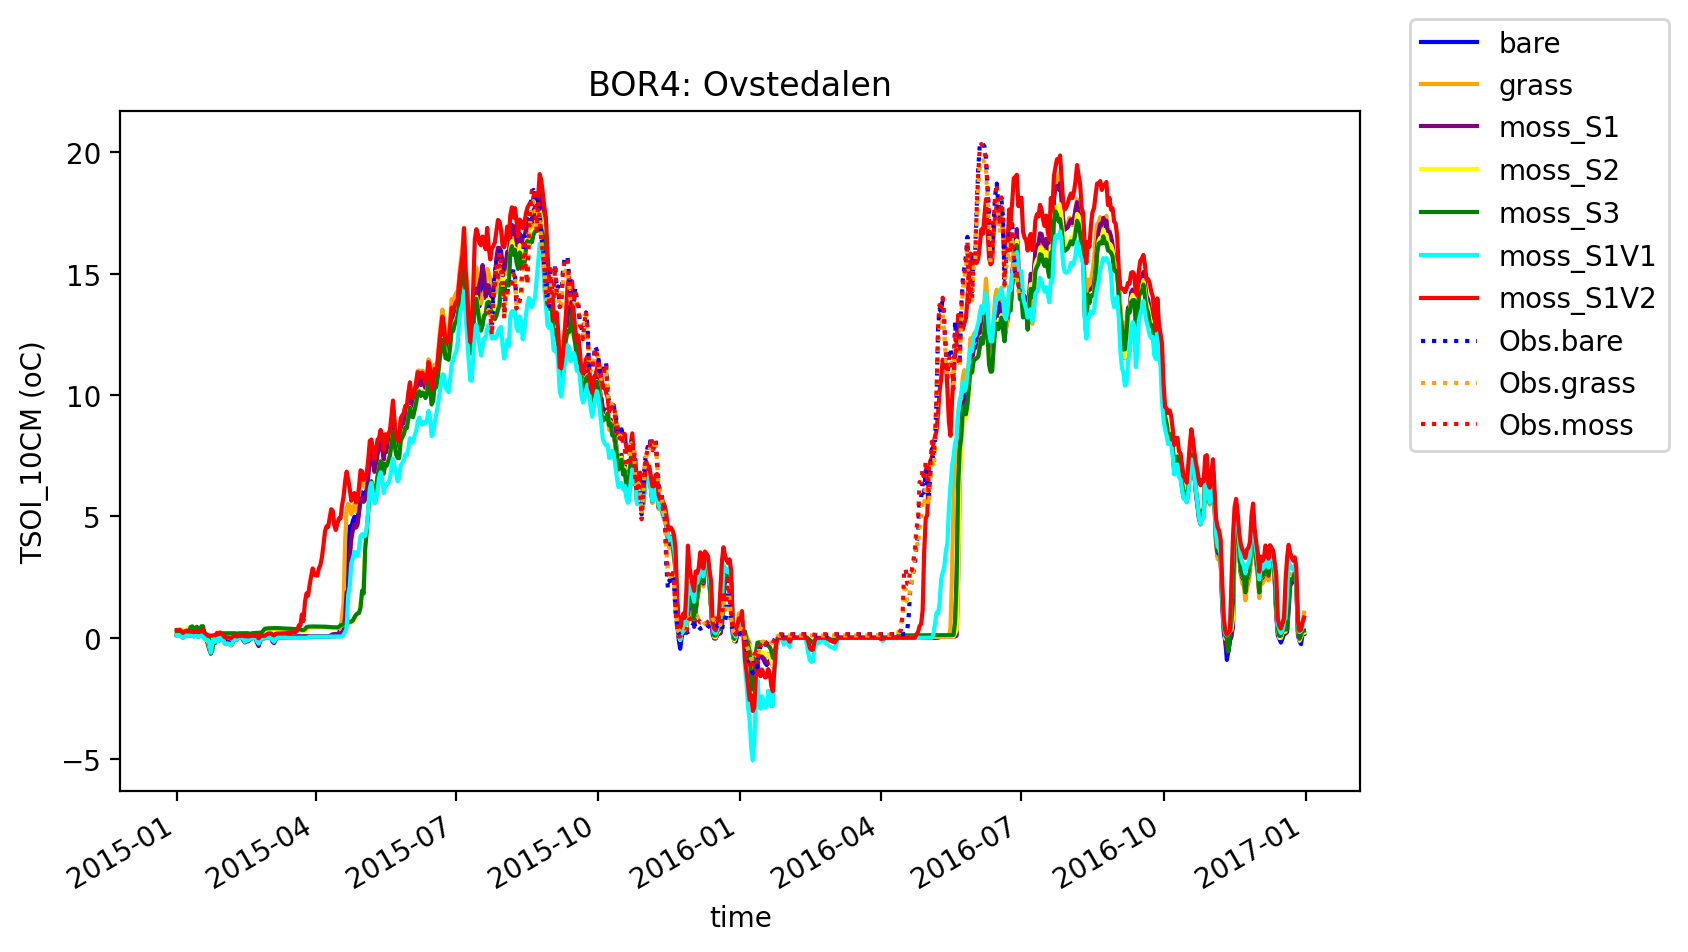

In [37]:
# Model output and comparison with observation

# Model output
i=11

dbare = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_bare_1.0.0.clm2.h2.2015-2016.nc',decode_times=True)
dgrass = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_grass_1.0.0.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S1 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S1.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S2 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S2.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S3 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S3.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S1V1 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_1.0.0_S1V1.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S1V2 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_1.0.0_S1V2.clm2.h2.2015-2016.nc',decode_times=True)


#output comparison
#variables: "soiltemperature": 3-5 cm soil depth, hourly output
#           "soilmoisture": soilmoisture, daily output
#           "PAR" "gpp" "nee" "Reco":

sites=["ALP1","ALP2","ALP3","ALP4","SUB1","SUB2","SUB3","SUB4","BOR1","BOR2","BOR3","BOR4"]
siteID1=["Ulvehaugen","Lavisdalen","Gudmedalen","Skjelingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"] 
#siteID2=["Ulvhaugen","Lavisdalen","Gudmedalen","Skjellingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"]
siteID3=["ULV","LAV","GUD","SKJ","ALR","HOG","RAM","VES","FAU","VIK","ARH","OVS"]


blockID=[['Ulv1','Ulv2','Ulv3','Ulv4'],
         ['Lav1','Lav2','Lav3','Lav4'],
         ['Gud12','Gud13','Gud15','Gud5'], #12 13 15 5
         ['Skj1','Skj2','Skj3','Skj4'],
         ['Alr1','Alr2','Alr3','Alr5'], #1, 2,3,5
         ['Hog1','Hog2','Hog3','Hog4'],
         ['Ram4','Ram5','Ram6','Ram8'], #4 5 6 8
         ['Ves1','Ves2','Ves3','Ves4'],
         ['Fau1','Fau2','Fau4','Fau5'], #1 2 4 5
         ['Vik2','Vik3','Vik4','Vik5'], #2, 3,4,5
         ['Arh1','Arh2','Arh3','Arh4'],       
         ['Ovs1','Ovs2','Ovs3','Ovs4']] 


#siteID=siteID1[i]                                #"Ulvehaugen"
#blockID=['Ovs1','Ovs2','Ovs3']                #"Ulv2"  isin(['Mangos', 'Grapes'])
treatment1="FGB" # Bareground
treatment2="GF"  # Moss only
treatment3="B"   # GRASS (Graminoid and Forbs) only

soil_temp_bare=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment1)
                             & (soil_temp["blockID"].isin(blockID[i]))]
soil_temp_moss=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment2)
                             & (soil_temp["blockID"].isin(blockID[i]))]
soil_temp_grass=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment3)
                             & (soil_temp["blockID"].isin(blockID[i]))]


soil_moist_bare=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment1)
                             & (soil_moist["blockID"].isin(blockID[i]))]
soil_moist_moss=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment2)
                             & (soil_moist["blockID"].isin(blockID[i]))]
soil_moist_grass=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment3)
                             & (soil_moist["blockID"].isin(blockID[i]))]

cflux_bare=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment1)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_moss=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment2)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_grass=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment3)
                             & (cflux["blockID"].isin(blockID[i]))]


# Set correct date format for dataframe

soil_temp_bare["date_time"]=pd.to_datetime(soil_temp_bare["date_time"])
soil_temp_moss["date_time"]=pd.to_datetime(soil_temp_moss["date_time"])
soil_temp_grass["date_time"]=pd.to_datetime(soil_temp_grass["date_time"])

# Resample observation data to daily or monthly mean
soil_temp_bare_rs=soil_temp_bare.resample('D', on="date_time").mean()
soil_temp_moss_rs=soil_temp_moss.resample('D', on="date_time").mean()
soil_temp_grass_rs=soil_temp_grass.resample('D', on="date_time").mean()


# Output processed observation data to csv
soil_temp_bare_rs.to_csv('/home/huitang/Documents/MossLichen_testbed/data_mod/'+sites[i]+'_bare_soiltemperature_2015-2016_daily.csv')
soil_temp_moss_rs.to_csv('/home/huitang/Documents/MossLichen_testbed/data_mod/'+sites[i]+'_moss_soiltemperature_2015-2016_daily.csv')
soil_temp_grass_rs.to_csv('/home/huitang/Documents/MossLichen_testbed/data_mod/'+sites[i]+'_grass_soiltemperature_2015-2016_daily.csv')


# Soil temperature and comparison with observation
plt.figure(figsize=(8,5), dpi=200)
#plt.plot(ALP1_lichen['SABG'],label='lichen')
#plt.plot(ALP1_lichen1['SABG'],label='lichen')
#plt.plot(ALP1_lichen2['SABG'],label='lichen')
#plt.plot(ALP1_moss1['TSOI_10CM']-273.15,label='moss_test1')
#plt.plot(ALP1_moss3['TSOI_10CM']-273.15,label='moss_test3')
#BOR4_bare['TSOI'].time
#plt(figsize=(10, 10), dpi=100)


plt.plot(dbare.indexes['time'].to_datetimeindex(),dbare['TSOI_10CM'][:,0].data-273.15,label='bare', color='blue')
plt.plot(dgrass.indexes['time'].to_datetimeindex(),dgrass['TSOI_10CM'][:,0].data-273.15,label='grass', color='orange')
plt.plot(dmoss_S1.indexes['time'].to_datetimeindex(),dmoss_S1['TSOI_10CM'][:,0].data-273.15,label='moss_S1', color='purple')
plt.plot(dmoss_S2.indexes['time'].to_datetimeindex(),dmoss_S2['TSOI_10CM'][:,0].data-273.15,label='moss_S2', color='yellow')
plt.plot(dmoss_S3.indexes['time'].to_datetimeindex(),dmoss_S3['TSOI_10CM'][:,0].data-273.15,label='moss_S3', color='green')
plt.plot(dmoss_S1V1.indexes['time'].to_datetimeindex(),dmoss_S1V1['TSOI_10CM'][:,0].data-273.15,label='moss_S1V1', color='cyan')
plt.plot(dmoss_S1V2.indexes['time'].to_datetimeindex(),dmoss_S1V2['TSOI_10CM'][:,0].data-273.15,label='moss_S1V2', color='red')
plt.plot(soil_temp_bare_rs.index,soil_temp_bare_rs['soiltemperature'],label='Obs.bare',linestyle="dotted", color='blue')
plt.plot(soil_temp_grass_rs.index,soil_temp_grass_rs['soiltemperature'],label='Obs.grass',linestyle="dotted", color='orange')
plt.plot(soil_temp_moss_rs.index,soil_temp_moss_rs['soiltemperature'],label='Obs.moss',linestyle="dotted", color='red')

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("TSOI_10CM (oC)")
plt.title(sites[i]+": "+siteID1[i])
plt.legend(loc=(1.04,0.5))
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_TSOI_10CM_daily.png", dpi=200)
plt.show()

<ipython-input-36-eda9eed11497>:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soil_temp_bare["date_time"]=pd.to_datetime(soil_temp_bare["date_time"])
<ipython-input-36-eda9eed11497>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soil_temp_moss["date_time"]=pd.to_datetime(soil_temp_moss["date_time"])
<ipython-input-36-eda9eed11497>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

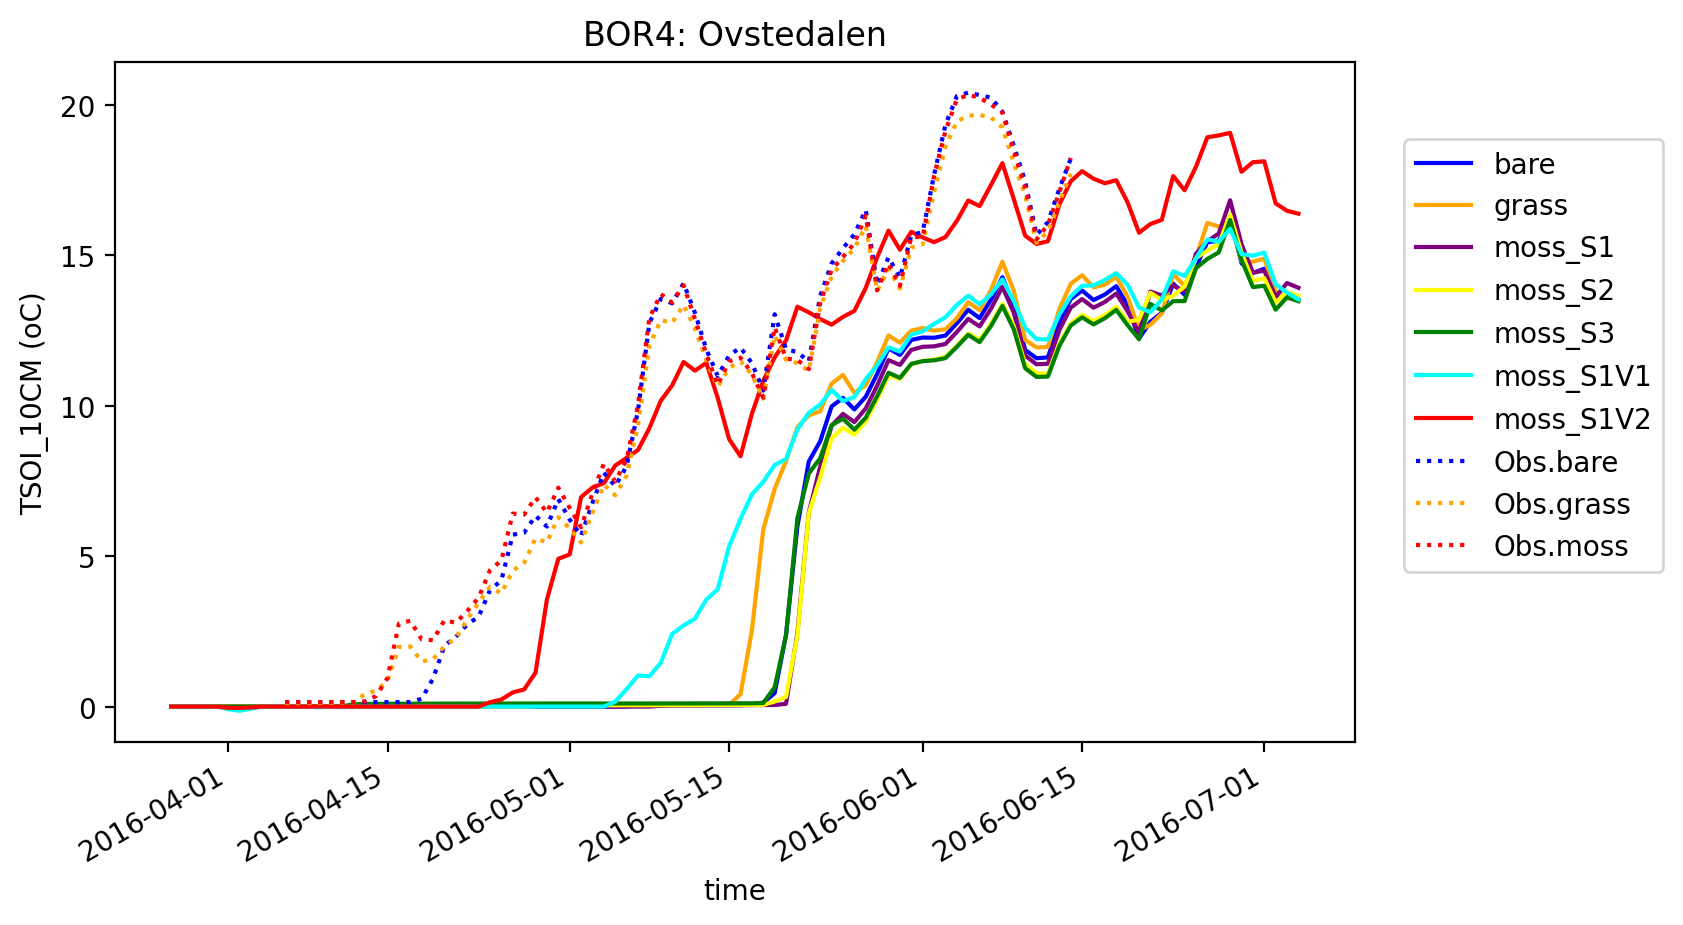

In [36]:
# Model output and comparison with observation, time masks

# Model output
i=11

dbare = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_bare_1.0.0.clm2.h2.2015-2016.nc',decode_times=True)
dgrass = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_grass_1.0.0.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S1 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S1.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S2 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S2.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S3 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S3.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S1V1 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_1.0.0_S1V1.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S1V2 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_1.0.0_S1V2.clm2.h2.2015-2016.nc',decode_times=True)


#output comparison
#variables: "soiltemperature": 3-5 cm soil depth, hourly output
#           "soilmoisture": soilmoisture, daily output
#           "PAR" "gpp" "nee" "Reco":

sites=["ALP1","ALP2","ALP3","ALP4","SUB1","SUB2","SUB3","SUB4","BOR1","BOR2","BOR3","BOR4"]
siteID1=["Ulvehaugen","Lavisdalen","Gudmedalen","Skjelingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"] 
#siteID2=["Ulvhaugen","Lavisdalen","Gudmedalen","Skjellingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"]
siteID3=["ULV","LAV","GUD","SKJ","ALR","HOG","RAM","VES","FAU","VIK","ARH","OVS"]


blockID=[['Ulv1','Ulv2','Ulv3','Ulv4'],
         ['Lav1','Lav2','Lav3','Lav4'],
         ['Gud12','Gud13','Gud15','Gud5'], #12 13 15 5
         ['Skj1','Skj2','Skj3','Skj4'],
         ['Alr1','Alr2','Alr3','Alr5'], #1, 2,3,5
         ['Hog1','Hog2','Hog3','Hog4'],
         ['Ram4','Ram5','Ram6','Ram8'], #4 5 6 8
         ['Ves1','Ves2','Ves3','Ves4'],
         ['Fau1','Fau2','Fau4','Fau5'], #1 2 4 5
         ['Vik2','Vik3','Vik4','Vik5'], #2, 3,4,5
         ['Arh1','Arh2','Arh3','Arh4'],       
         ['Ovs1','Ovs2','Ovs3','Ovs4']] 


#siteID=siteID1[i]                                #"Ulvehaugen"
#blockID=['Ovs1','Ovs2','Ovs3']                #"Ulv2"  isin(['Mangos', 'Grapes'])
treatment1="FGB" # Bareground
treatment2="GF"  # Moss only
treatment3="B"   # GRASS (Graminoid and Forbs) only

soil_temp_bare=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment1)
                             & (soil_temp["blockID"].isin(blockID[i]))]
soil_temp_moss=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment2)
                             & (soil_temp["blockID"].isin(blockID[i]))]
soil_temp_grass=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment3)
                             & (soil_temp["blockID"].isin(blockID[i]))]


soil_moist_bare=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment1)
                             & (soil_moist["blockID"].isin(blockID[i]))]
soil_moist_moss=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment2)
                             & (soil_moist["blockID"].isin(blockID[i]))]
soil_moist_grass=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment3)
                             & (soil_moist["blockID"].isin(blockID[i]))]

cflux_bare=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment1)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_moss=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment2)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_grass=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment3)
                             & (cflux["blockID"].isin(blockID[i]))]


# Set correct date format for dataframe

soil_temp_bare["date_time"]=pd.to_datetime(soil_temp_bare["date_time"])
soil_temp_moss["date_time"]=pd.to_datetime(soil_temp_moss["date_time"])
soil_temp_grass["date_time"]=pd.to_datetime(soil_temp_grass["date_time"])

# Resample observation data to daily or monthly mean
soil_temp_bare_rs=soil_temp_bare.resample('D', on="date_time").mean()
soil_temp_moss_rs=soil_temp_moss.resample('D', on="date_time").mean()
soil_temp_grass_rs=soil_temp_grass.resample('D', on="date_time").mean()


# Output processed observation data to csv
soil_temp_bare_rs.to_csv('/home/huitang/Documents/MossLichen_testbed/data_mod/'+sites[i]+'_bare_soiltemperature_2015-2016_daily.csv')
soil_temp_moss_rs.to_csv('/home/huitang/Documents/MossLichen_testbed/data_mod/'+sites[i]+'_moss_soiltemperature_2015-2016_daily.csv')
soil_temp_grass_rs.to_csv('/home/huitang/Documents/MossLichen_testbed/data_mod/'+sites[i]+'_grass_soiltemperature_2015-2016_daily.csv')


mask_bare = np.logical_or((soil_temp_bare["date_time"] >= '2015-7-1') 
         & (soil_temp_bare["date_time"] <= '2015-10-1'),
         (soil_temp_bare["date_time"] >= '2016-5-1') 
         & (soil_temp_bare["date_time"] <= '2016-7-1'))
mask_grass = np.logical_or((soil_temp_grass["date_time"] >= '2015-7-1') 
         & (soil_temp_grass["date_time"] <= '2015-10-1'),
         (soil_temp_grass["date_time"] >= '2016-5-1') 
         & (soil_temp_grass["date_time"] <= '2016-7-1'))
mask_moss = np.logical_or((soil_temp_moss["date_time"] >= '2015-7-1') 
         & (soil_temp_moss["date_time"] <= '2015-10-1'),
         (soil_temp_moss["date_time"] >= '2016-5-1') 
         & (soil_temp_moss["date_time"] <= '2016-7-1'))


# Soil temperature and comparison with observation
plt.figure(figsize=(8,5), dpi=200)
#plt.plot(ALP1_lichen['SABG'],label='lichen')
#plt.plot(ALP1_lichen1['SABG'],label='lichen')
#plt.plot(ALP1_lichen2['SABG'],label='lichen')
#plt.plot(ALP1_moss1['TSOI_10CM']-273.15,label='moss_test1')
#plt.plot(ALP1_moss3['TSOI_10CM']-273.15,label='moss_test3')
#BOR4_bare['TSOI'].time
#plt(figsize=(10, 10), dpi=100)

mask1=450
mask2=550
mask3=260
mask4=330

plt.plot(dbare.indexes['time'][mask1:mask2].to_datetimeindex(),dbare['TSOI_10CM'][mask1:mask2,0].data-273.15,label='bare', color='blue')
plt.plot(dgrass.indexes['time'][mask1:mask2].to_datetimeindex(),dgrass['TSOI_10CM'][mask1:mask2,0].data-273.15,label='grass', color='orange')
plt.plot(dmoss_S1.indexes['time'][mask1:mask2].to_datetimeindex(),dmoss_S1['TSOI_10CM'][mask1:mask2,0].data-273.15,label='moss_S1', color='purple')
plt.plot(dmoss_S2.indexes['time'][mask1:mask2].to_datetimeindex(),dmoss_S2['TSOI_10CM'][mask1:mask2,0].data-273.15,label='moss_S2', color='yellow')
plt.plot(dmoss_S3.indexes['time'][mask1:mask2].to_datetimeindex(),dmoss_S3['TSOI_10CM'][mask1:mask2,0].data-273.15,label='moss_S3', color='green')
plt.plot(dmoss_S1V1.indexes['time'][mask1:mask2].to_datetimeindex(),dmoss_S1V1['TSOI_10CM'][mask1:mask2,0].data-273.15,label='moss_S1V1', color='cyan')
plt.plot(dmoss_S1V2.indexes['time'][mask1:mask2].to_datetimeindex(),dmoss_S1V2['TSOI_10CM'][mask1:mask2,0].data-273.15,label='moss_S1V2', color='red')
plt.plot(soil_temp_bare_rs.index[mask3:mask4],soil_temp_bare_rs['soiltemperature'][mask3:mask4],label='Obs.bare',linestyle="dotted", color='blue')
plt.plot(soil_temp_grass_rs.index[mask3:mask4],soil_temp_grass_rs['soiltemperature'][mask3:mask4],label='Obs.grass',linestyle="dotted", color='orange')
plt.plot(soil_temp_moss_rs.index[mask3:mask4],soil_temp_moss_rs['soiltemperature'][mask3:mask4],label='Obs.moss',linestyle="dotted", color='red')

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("TSOI_10CM (oC)")
plt.title(sites[i]+": "+siteID1[i])
plt.legend(loc=(1.04,0.25))
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_TSOI_10CM_daily.png", dpi=200)
plt.show()

In [21]:
mask1=340
mask2=500
dgrass.indexes['time'][mask1:mask2].to_datetimeindex()

soil_temp_bare_rs.index[100:300]

<ipython-input-21-4653920b467e>:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  dgrass.indexes['time'][mask1:mask2].to_datetimeindex()


DatetimeIndex(['2015-11-06 00:00:00+00:00', '2015-11-07 00:00:00+00:00',
               '2015-11-08 00:00:00+00:00', '2015-11-09 00:00:00+00:00',
               '2015-11-10 00:00:00+00:00', '2015-11-11 00:00:00+00:00',
               '2015-11-12 00:00:00+00:00', '2015-11-13 00:00:00+00:00',
               '2015-11-14 00:00:00+00:00', '2015-11-15 00:00:00+00:00',
               ...
               '2016-05-14 00:00:00+00:00', '2016-05-15 00:00:00+00:00',
               '2016-05-16 00:00:00+00:00', '2016-05-17 00:00:00+00:00',
               '2016-05-18 00:00:00+00:00', '2016-05-19 00:00:00+00:00',
               '2016-05-20 00:00:00+00:00', '2016-05-21 00:00:00+00:00',
               '2016-05-22 00:00:00+00:00', '2016-05-23 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date_time', length=200, freq='D')

<ipython-input-215-11470f2a2340>:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soil_temp_bare["date_time"]=pd.to_datetime(soil_temp_bare["date_time"])
<ipython-input-215-11470f2a2340>:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soil_temp_moss["date_time"]=pd.to_datetime(soil_temp_moss["date_time"])
<ipython-input-215-11470f2a2340>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

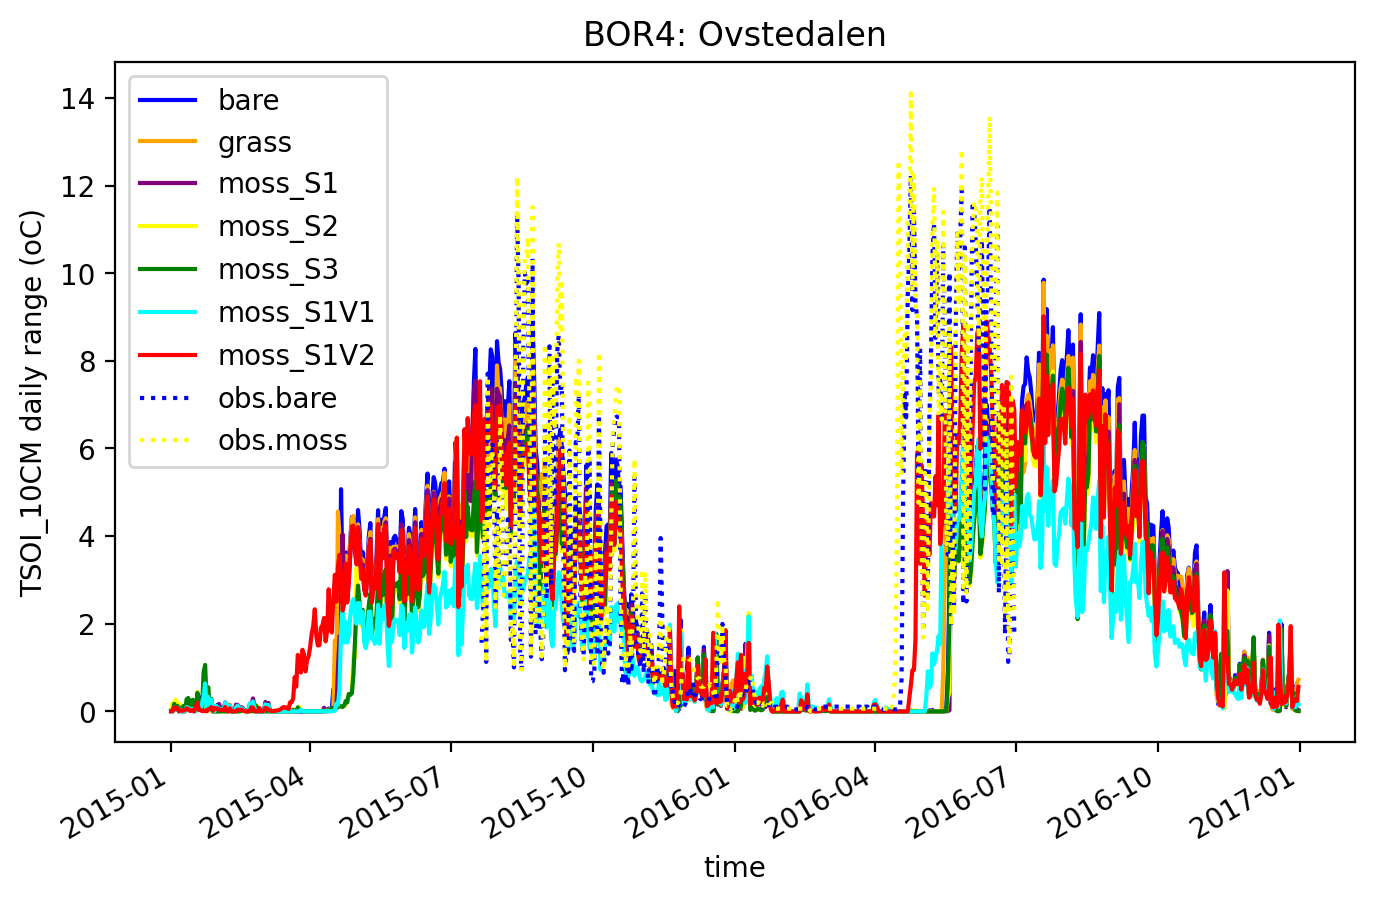

In [215]:
# Model output and comparison with observation: daily temperature range

# Model output
i=11

dbare = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_bare_1.0.0.clm2.h1.2015-2016.nc',decode_times=True)
dgrass = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_grass_1.0.0.clm2.h1.2015-2016.nc',decode_times=True)
dmoss_S1 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S1.clm2.h1.2015-2016.nc',decode_times=True)
dmoss_S2 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S2.clm2.h1.2015-2016.nc',decode_times=True)
dmoss_S3 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S3.clm2.h1.2015-2016.nc',decode_times=True)
dmoss_S1V1 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_1.0.0_S1V1.clm2.h1.2015-2016.nc',decode_times=True)
dmoss_S1V2 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_1.0.0_S1V2.clm2.h1.2015-2016.nc',decode_times=True)


#output comparison
#variables: "soiltemperature": 3-5 cm soil depth, hourly output
#           "soilmoisture": soilmoisture, daily output
#           "PAR" "gpp" "nee" "Reco":


sites=["ALP1","ALP2","ALP3","ALP4","SUB1","SUB2","SUB3","SUB4","BOR1","BOR2","BOR3","BOR4"]
siteID1=["Ulvehaugen","Lavisdalen","Gudmedalen","Skjelingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"] 
#siteID2=["Ulvhaugen","Lavisdalen","Gudmedalen","Skjellingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"]
siteID3=["ULV","LAV","GUD","SKJ","ALR","HOG","RAM","VES","FAU","VIK","ARH","OVS"]


blockID=[['Ulv1','Ulv2','Ulv3','Ulv4'],
         ['Lav1','Lav2','Lav3','Lav4'],
         ['Gud12','Gud13','Gud15','Gud5'], #12 13 15 5
         ['Skj1','Skj2','Skj3','Skj4'],
         ['Alr1','Alr2','Alr3','Alr5'], #1, 2,3,5
         ['Hog1','Hog2','Hog3','Hog4'],
         ['Ram4','Ram5','Ram6','Ram8'], #4 5 6 8
         ['Ves1','Ves2','Ves3','Ves4'],
         ['Fau1','Fau2','Fau4','Fau5'], #1 2 4 5
         ['Vik2','Vik3','Vik4','Vik5'], #2, 3,4,5
         ['Arh1','Arh2','Arh3','Arh4'],       
         ['Ovs1','Ovs2','Ovs3','Ovs4']] 


#siteID=siteID1[i]                                #"Ulvehaugen"
#blockID=['Ovs1','Ovs2','Ovs3']                #"Ulv2"  isin(['Mangos', 'Grapes'])
treatment1="FGB" # Bareground
treatment2="GF"  # Moss only
treatment3="B"   # GRASS (Graminoid and Forbs) only

soil_temp_bare=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment1)
                             & (soil_temp["blockID"].isin(blockID[i]))]
soil_temp_moss=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment2)
                             & (soil_temp["blockID"].isin(blockID[i]))]
soil_temp_grass=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment3)
                             & (soil_temp["blockID"].isin(blockID[i]))]


soil_moist_bare=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment1)
                             & (soil_moist["blockID"].isin(blockID[i]))]
soil_moist_moss=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment2)
                             & (soil_moist["blockID"].isin(blockID[i]))]
soil_moist_grass=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment3)
                             & (soil_moist["blockID"].isin(blockID[i]))]

cflux_bare=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment1)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_moss=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment2)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_grass=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment3)
                             & (cflux["blockID"].isin(blockID[i]))]

dbare_rs=dbare['TSOI_10CM'].resample(time='1D').max()-dbare['TSOI_10CM'].resample(time='1D').min()
dgrass_rs=dgrass['TSOI_10CM'].resample(time='1D').max()-dgrass['TSOI_10CM'].resample(time='1D').min()
dmoss_S1_rs=dmoss_S1['TSOI_10CM'].resample(time='1D').max()-dmoss_S1['TSOI_10CM'].resample(time='1D').min()
dmoss_S2_rs=dmoss_S2['TSOI_10CM'].resample(time='1D').max()-dmoss_S2['TSOI_10CM'].resample(time='1D').min()
dmoss_S3_rs=dmoss_S3['TSOI_10CM'].resample(time='1D').max()-dmoss_S3['TSOI_10CM'].resample(time='1D').min()
dmoss_S1V1_rs=dmoss_S1V1['TSOI_10CM'].resample(time='1D').max()-dmoss_S1V1['TSOI_10CM'].resample(time='1D').min()
dmoss_S1V2_rs=dmoss_S1V2['TSOI_10CM'].resample(time='1D').max()-dmoss_S1V2['TSOI_10CM'].resample(time='1D').min()


# Set correct date format for dataframe

soil_temp_bare["date_time"]=pd.to_datetime(soil_temp_bare["date_time"])
soil_temp_moss["date_time"]=pd.to_datetime(soil_temp_moss["date_time"])
soil_temp_grass["date_time"]=pd.to_datetime(soil_temp_grass["date_time"])

# Resample observation data to daily or monthly mean
soil_temp_bare_rs=soil_temp_bare.resample('D', on="date_time").mean()
soil_temp_moss_rs=soil_temp_moss.resample('D', on="date_time").mean()
#soil_temp_grass_rs=soil_temp_grass.resample('D', on="date_time").mean()

soil_temp_bare_rs_max=soil_temp_bare.resample('D', on="date_time").max()
soil_temp_moss_rs_max=soil_temp_moss.resample('D', on="date_time").max()
#soil_temp_grass_rs_max=soil_temp_grass.resample('D', on="date_time").max()

soil_temp_bare_rs_min=soil_temp_bare.resample('D', on="date_time").min()
soil_temp_moss_rs_min=soil_temp_moss.resample('D', on="date_time").min()
#soil_temp_grass_rs_min=soil_temp_grass.resample('D', on="date_time").min()

#maskrs = (atm_obs2_sel2_rs_max['date'] >= '2015-1-1') & (atm_obs2_sel2_rs_max['date'] <= '2016-12-31')

#plt.plot(atm_obs2_sel2.loc[maskt2]['date'],atm_obs2_sel2.loc[maskt2]['value'].to_numpy()-atm_obs2_sel.loc[maskt1]['value'].to_numpy(),label='obs')
#plt.plot(atm_obs2_sel2_rs_max.loc[maskrs]['date'],atm_obs2_sel2_rs_max.loc[maskrs]['value']-atm_obs2_sel2_rs_min.loc[maskrs]['value'],label='obs')


# Soil temperature and comparison with observation
plt.figure(figsize=(8,5), dpi=200)
#plt.plot(ALP1_lichen['SABG'],label='lichen')
#plt.plot(ALP1_lichen1['SABG'],label='lichen')
#plt.plot(ALP1_lichen2['SABG'],label='lichen')
#plt.plot(ALP1_moss1['TSOI_10CM']-273.15,label='moss_test1')
#plt.plot(ALP1_moss3['TSOI_10CM']-273.15,label='moss_test3')
#BOR4_bare['TSOI'].time
#plt(figsize=(10, 10), dpi=100)

plt.plot(dbare_rs.indexes['time'].to_datetimeindex(),dbare_rs[:,0].data,label='bare', color='blue')
plt.plot(dgrass_rs.indexes['time'].to_datetimeindex(),dgrass_rs[:,0].data,label='grass', color='orange')
plt.plot(dmoss_S1_rs.indexes['time'].to_datetimeindex(),dmoss_S1_rs[:,0].data,label='moss_S1', color='purple')
plt.plot(dmoss_S2_rs.indexes['time'].to_datetimeindex(),dmoss_S2_rs[:,0].data,label='moss_S2', color='yellow')
plt.plot(dmoss_S3_rs.indexes['time'].to_datetimeindex(),dmoss_S3_rs[:,0].data,label='moss_S3', color='green')
plt.plot(dmoss_S1V1_rs.indexes['time'].to_datetimeindex(),dmoss_S1V1_rs[:,0].data,label='moss_S1V1', color='cyan')
plt.plot(dmoss_S1V2_rs.indexes['time'].to_datetimeindex(),dmoss_S1V2_rs[:,0].data,label='moss_S1V2', color='red')

plt.plot(soil_temp_bare_rs_max.index,soil_temp_bare_rs_max['soiltemperature']-soil_temp_bare_rs_min['soiltemperature'],label='obs.bare',linestyle="dotted", color='blue')
#plt.plot(soil_temp_grass_rs_max.index,soil_temp_grass_rs_max['soiltemperature']-soil_temp_grass_rs_min['soiltemperature'],label='obs.grass',linestyle="dotted", color='orange')
plt.plot(soil_temp_moss_rs_max.index,soil_temp_moss_rs_max['soiltemperature']-soil_temp_moss_rs_min['soiltemperature'],label='obs.moss',linestyle="dotted", color='yellow')


plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("TSOI_10CM daily range (oC)")
plt.title(sites[i]+": "+siteID1[i])
plt.legend(loc='upper left')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_TSOI_10CM_daily_range.png", dpi=200)
plt.show()

<ipython-input-9-6399d0fcff23>:72: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  mask = np.logical_or((dbare.indexes['time'].to_datetimeindex() >= '2015-7-1')
<ipython-input-9-6399d0fcff23>:73: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  & (dbare.indexes['time'].to_datetimeindex() <= '2015-10-1'),
<ipython-input-9-6399d0fcff23>:74: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the lengt

FileNotFoundError: [Errno 2] No such file or directory: '/home/huitang/SynologyDrive/moss_lichen/sites_observation/SUB4_TSOI_10CM_diurnal_cycle_5-10_window4.png'

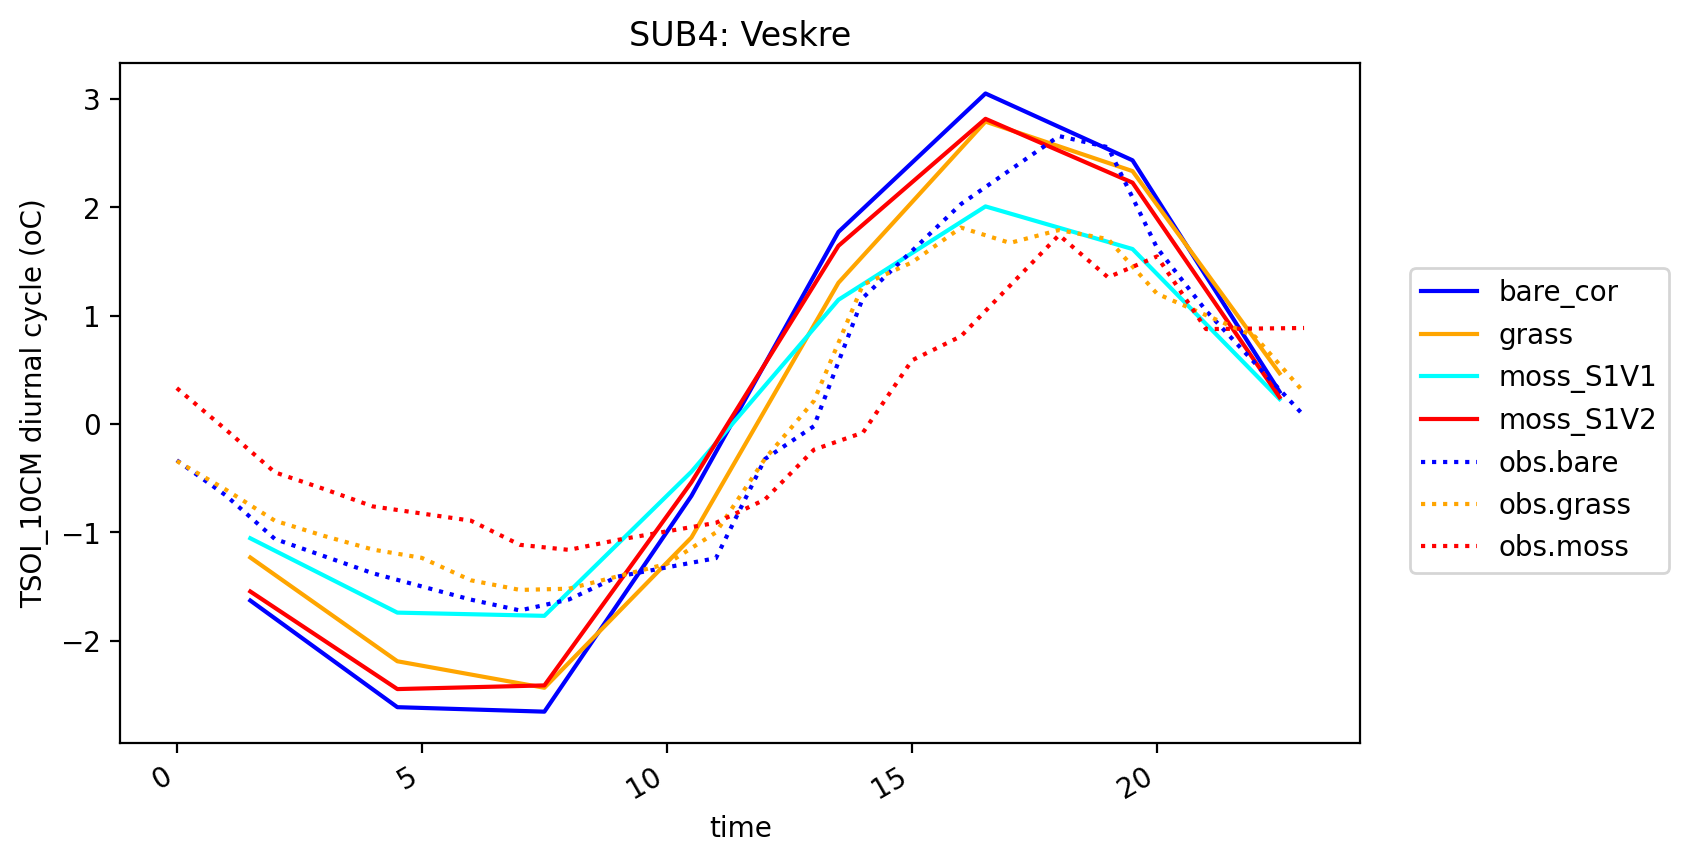

In [9]:
# Model output and comparison with observation: daily temperature range


sites=["ALP1","ALP2","ALP3","ALP4","SUB1","SUB2","SUB3","SUB4","BOR1","BOR2","BOR3","BOR4"]
siteID1=["Ulvehaugen","Lavisdalen","Gudmedalen","Skjelingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"] 
#siteID2=["Ulvhaugen","Lavisdalen","Gudmedalen","Skjellingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"]
siteID3=["ULV","LAV","GUD","SKJ","ALR","HOG","RAM","VES","FAU","VIK","ARH","OVS"]


blockID=[['Ulv1','Ulv2','Ulv3','Ulv4'],
         ['Lav1','Lav2','Lav3','Lav4'],
         ['Gud12','Gud13','Gud15','Gud5'], #12 13 15 5
         ['Skj1','Skj2','Skj3','Skj4'],
         ['Alr1','Alr2','Alr3','Alr5'], #1, 2,3,5
         ['Hog1','Hog2','Hog3','Hog4'],
         ['Ram4','Ram5','Ram6','Ram8'], #4 5 6 8
         ['Ves1','Ves2','Ves3','Ves4'],
         ['Fau1','Fau2','Fau4','Fau5'], #1 2 4 5
         ['Vik2','Vik3','Vik4','Vik5'], #2, 3,4,5
         ['Arh1','Arh2','Arh3','Arh4'],       
         ['Ovs1','Ovs2','Ovs3','Ovs4']] 

# Model output

i=7

dbare = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_bare_1.0.0.clm2.h1.2015-2016.nc',decode_times=True)
dgrass = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_grass_1.0.0.clm2.h1.2015-2016.nc',decode_times=True)
dmoss_S1 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S1.clm2.h1.2015-2016.nc',decode_times=True)
dmoss_S2 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S2.clm2.h1.2015-2016.nc',decode_times=True)
dmoss_S3 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S3.clm2.h1.2015-2016.nc',decode_times=True)
dmoss_S1V1 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_1.0.0_S1V1.clm2.h1.2015-2016.nc',decode_times=True)
dmoss_S1V2 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_1.0.0_S1V2.clm2.h1.2015-2016.nc',decode_times=True)


#output comparison
#variables: "soiltemperature": 3-5 cm soil depth, hourly output
#           "soilmoisture": soilmoisture, daily output
#           "PAR" "gpp" "nee" "Reco":




#siteID=siteID1[i]                                #"Ulvehaugen"
#blockID=['Ovs1','Ovs2','Ovs3']                #"Ulv2"  isin(['Mangos', 'Grapes'])
treatment1="FGB" # Bareground
treatment2="GF"  # Moss only
treatment3="B"   # GRASS (Graminoid and Forbs) only

soil_temp_bare=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment1)
                             & (soil_temp["blockID"].isin(blockID[i]))]
soil_temp_moss=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment2)
                             & (soil_temp["blockID"].isin(blockID[i]))]
soil_temp_grass=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment3)
                             & (soil_temp["blockID"].isin(blockID[i]))]


soil_moist_bare=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment1)
                             & (soil_moist["blockID"].isin(blockID[i]))]
soil_moist_moss=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment2)
                             & (soil_moist["blockID"].isin(blockID[i]))]
soil_moist_grass=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment3)
                             & (soil_moist["blockID"].isin(blockID[i]))]

cflux_bare=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment1)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_moss=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment2)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_grass=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment3)
                             & (cflux["blockID"].isin(blockID[i]))]

mask = np.logical_or((dbare.indexes['time'].to_datetimeindex() >= '2015-7-1') 
         & (dbare.indexes['time'].to_datetimeindex() <= '2015-10-1'),
         (dbare.indexes['time'].to_datetimeindex() >= '2016-5-1') 
         & (dbare.indexes['time'].to_datetimeindex() <= '2016-7-1'))

#mask = ((dbare.indexes['time'].to_datetimeindex() >= '2015-7-1') 
#         & (dbare.indexes['time'].to_datetimeindex() <= '2015-9-1'))

# hourly data is the anomaly to the average of each day?
dbare_rs=dbare['TSOI_10CM'].loc[mask].groupby('time.hour').mean('time')-273.15
dgrass_rs=dgrass['TSOI_10CM'].loc[mask].groupby('time.hour').mean('time')-273.15
dmoss_S1_rs=dmoss_S1['TSOI_10CM'].loc[mask].groupby('time.hour').mean('time')-273.15
dmoss_S2_rs=dmoss_S2['TSOI_10CM'].loc[mask].groupby('time.hour').mean('time')-273.15
dmoss_S3_rs=dmoss_S3['TSOI_10CM'].loc[mask].groupby('time.hour').mean('time')-273.15
dmoss_S1V1_rs=dmoss_S1V1['TSOI_10CM'].loc[mask].groupby('time.hour').mean('time')-273.15
dmoss_S1V2_rs=dmoss_S1V2['TSOI_10CM'].loc[mask].groupby('time.hour').mean('time')-273.15

dbare_rs=dbare_rs-np.average(dbare_rs)
dgrass_rs=dgrass_rs-np.average(dgrass_rs)
dmoss_S1_rs=dmoss_S1_rs-np.average(dmoss_S1_rs)
dmoss_S2_rs=dmoss_S2_rs-np.average(dmoss_S2_rs)
dmoss_S3_rs=dmoss_S3_rs-np.average(dmoss_S3_rs)
dmoss_S1V1_rs=dmoss_S1V1_rs-np.average(dmoss_S1V1_rs)
dmoss_S1V2_rs=dmoss_S1V2_rs-np.average(dmoss_S1V2_rs)

# Set correct date format for dataframe

soil_temp_bare["date_time"]=pd.to_datetime(soil_temp_bare["date_time"])
soil_temp_moss["date_time"]=pd.to_datetime(soil_temp_moss["date_time"])
soil_temp_grass["date_time"]=pd.to_datetime(soil_temp_grass["date_time"])

# Resample observation data to daily or monthly mean
mask_bare = np.logical_or((soil_temp_bare["date_time"] >= '2015-8-1') 
         & (soil_temp_bare["date_time"] <= '2015-10-1'),
         (soil_temp_bare["date_time"] >= '2016-5-1') 
         & (soil_temp_bare["date_time"] <= '2016-7-1'))
mask_grass = np.logical_or((soil_temp_grass["date_time"] >= '2015-8-1') 
         & (soil_temp_grass["date_time"] <= '2015-10-1'),
         (soil_temp_grass["date_time"] >= '2016-5-1') 
         & (soil_temp_grass["date_time"] <= '2016-7-1'))
mask_moss = np.logical_or((soil_temp_moss["date_time"] >= '2015-8-1') 
         & (soil_temp_moss["date_time"] <= '2015-10-1'),
         (soil_temp_moss["date_time"] >= '2016-5-1') 
         & (soil_temp_moss["date_time"] <= '2016-7-1'))

#mask_bare = ((soil_temp_bare["date_time"] >= '2015-7-1') 
#         & (soil_temp_bare["date_time"] <= '2015-9-1'))
#mask_grass =((soil_temp_grass["date_time"] >= '2015-7-1') 
#         & (soil_temp_grass["date_time"] <= '2015-9-1'))
#mask_moss = ((soil_temp_moss["date_time"] >= '2015-7-1') 
#         & (soil_temp_moss["date_time"] <= '2015-9-1'))

soil_temp_bare_rs=soil_temp_bare.loc[mask_bare].groupby(soil_temp_bare["date_time"].dt.hour).mean()
soil_temp_grass_rs=soil_temp_grass.loc[mask_grass].groupby(soil_temp_grass["date_time"].dt.hour).mean()
soil_temp_moss_rs=soil_temp_moss.loc[mask_moss].groupby(soil_temp_moss["date_time"].dt.hour).mean()

soil_temp_bare_rs=soil_temp_bare_rs['soiltemperature']-np.average(soil_temp_bare_rs['soiltemperature'])
soil_temp_grass_rs=soil_temp_grass_rs['soiltemperature']-np.average(soil_temp_grass_rs['soiltemperature'])
soil_temp_moss_rs=soil_temp_moss_rs['soiltemperature']-np.average(soil_temp_moss_rs['soiltemperature'])

#maskrs = (atm_obs2_sel2_rs_max['date'] >= '2015-1-1') & (atm_obs2_sel2_rs_max['date'] <= '2016-12-31')

#plt.plot(atm_obs2_sel2.loc[maskt2]['date'],atm_obs2_sel2.loc[maskt2]['value'].to_numpy()-atm_obs2_sel.loc[maskt1]['value'].to_numpy(),label='obs')
#plt.plot(atm_obs2_sel2_rs_max.loc[maskrs]['date'],atm_obs2_sel2_rs_max.loc[maskrs]['value']-atm_obs2_sel2_rs_min.loc[maskrs]['value'],label='obs')


# Soil temperature and comparison with observation
plt.figure(figsize=(8,5), dpi=200)
#plt.plot(ALP1_lichen['SABG'],label='lichen')
#plt.plot(ALP1_lichen1['SABG'],label='lichen')
#plt.plot(ALP1_lichen2['SABG'],label='lichen')
#plt.plot(ALP1_moss1['TSOI_10CM']-273.15,label='moss_test1')
#plt.plot(ALP1_moss3['TSOI_10CM']-273.15,label='moss_test3')
#BOR4_bare['TSOI'].time
#plt(figsize=(10, 10), dpi=100)

plt.plot(dbare_rs.indexes["hour"]+1.5,dbare_rs[:,0].data,label='bare_cor', color='blue')
plt.plot(dgrass_rs.indexes["hour"]+1.5,dgrass_rs[:,0].data,label='grass', color='orange')
#plt.plot(dmoss_S1_rs.indexes["hour"]+1.5,dmoss_S1_rs[:,0].data,label='moss_S1', color='purple')
#plt.plot(dmoss_S2_rs.indexes["hour"]+1.5,dmoss_S2_rs[:,0].data,label='moss_S2', color='yellow')
#plt.plot(dmoss_S3_rs.indexes["hour"]+1.5,dmoss_S3_rs[:,0].data,label='moss_S3', color='green')
plt.plot(dmoss_S1V1_rs.indexes["hour"]+1.5,dmoss_S1V1_rs[:,0].data,label='moss_S1V1', color='cyan')
plt.plot(dmoss_S1V2_rs.indexes["hour"]+1.5,dmoss_S1V2_rs[:,0].data,label='moss_S1V2', color='red')

#plt.plot(soil_temp_bare_rs.index,soil_temp_bare_rs['soiltemperature'],label='obs.bare',linestyle="dotted", color='blue')
#plt.plot(soil_temp_grass_rs.index,soil_temp_grass_rs['soiltemperature'],label='obs.grass',linestyle="dotted", color='orange')
#plt.plot(soil_temp_moss_rs.index,soil_temp_moss_rs['soiltemperature'],label='obs.moss',linestyle="dotted", color='yellow')

#Savitzky–Golay filter: Tips from: https://www.delftstack.com/howto/python/smooth-data-in-python/
soil_temp_bare_rs_smooth = savgol_filter(soil_temp_bare_rs, 3, 1)
soil_temp_grass_rs_smooth = savgol_filter(soil_temp_grass_rs,3, 1)
soil_temp_moss_rs_smooth = savgol_filter(soil_temp_moss_rs, 3, 1)

# Resample can do the trick but it is not better than SG method
#soil_temp_bare_rs.index=[dt.datetime(2015, 7, 1, 0, 0) + dt.timedelta(hours=soil_temp_bare_rs.index[i].item()) for i in range(len(soil_temp_bare_rs.index))]
#test=soil_temp_bare_rs.resample('3H').mean()
#test.index=test.index+dt.timedelta(hours=1)

#Tips from:

plt.plot(soil_temp_bare_rs.index,soil_temp_bare_rs_smooth,label='obs.bare',linestyle="dotted", color='blue')
plt.plot(soil_temp_grass_rs.index,soil_temp_grass_rs_smooth,label='obs.grass',linestyle="dotted", color='orange')
plt.plot(soil_temp_moss_rs.index,soil_temp_moss_rs_smooth,label='obs.moss',linestyle="dotted", color='red')

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("TSOI_10CM diurnal cycle (oC)")
plt.title(sites[i]+": "+siteID1[i])
plt.legend(loc=(1.04,0.25))
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_TSOI_10CM_diurnal_cycle_5-10_window4.png", dpi=200)
plt.show()


In [ ]:
# Model output and comparison with observation: daily temperature range


sites=["ALP1","ALP2","ALP3","ALP4","SUB1","SUB2","SUB3","SUB4","BOR1","BOR2","BOR3","BOR4"]
siteID1=["Ulvehaugen","Lavisdalen","Gudmedalen","Skjelingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"] 
#siteID2=["Ulvhaugen","Lavisdalen","Gudmedalen","Skjellingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"]
siteID3=["ULV","LAV","GUD","SKJ","ALR","HOG","RAM","VES","FAU","VIK","ARH","OVS"]


blockID=[['Ulv1','Ulv2','Ulv3','Ulv4'],
         ['Lav1','Lav2','Lav3','Lav4'],
         ['Gud12','Gud13','Gud15','Gud5'], #12 13 15 5
         ['Skj1','Skj2','Skj3','Skj4'],
         ['Alr1','Alr2','Alr3','Alr5'], #1, 2,3,5
         ['Hog1','Hog2','Hog3','Hog4'],
         ['Ram4','Ram5','Ram6','Ram8'], #4 5 6 8
         ['Ves1','Ves2','Ves3','Ves4'],
         ['Fau1','Fau2','Fau4','Fau5'], #1 2 4 5
         ['Vik2','Vik3','Vik4','Vik5'], #2, 3,4,5
         ['Arh1','Arh2','Arh3','Arh4'],       
         ['Ovs1','Ovs2','Ovs3','Ovs4']] 

# Model output

i=5

dbare = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_bare_1.0.0.clm2.h1.2015-2016.nc',decode_times=True)
dgrass = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_grass_1.0.0.clm2.h1.2015-2016.nc',decode_times=True)
dmoss_S1 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S1.clm2.h1.2015-2016.nc',decode_times=True)
dmoss_S2 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S2.clm2.h1.2015-2016.nc',decode_times=True)
dmoss_S3 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S3.clm2.h1.2015-2016.nc',decode_times=True)
dmoss_S1V1 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_1.0.0_S1V1.clm2.h1.2015-2016.nc',decode_times=True)
dmoss_S1V2 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_1.0.0_S1V2.clm2.h1.2015-2016.nc',decode_times=True)


#output comparison
#variables: "soiltemperature": 3-5 cm soil depth, hourly output
#           "soilmoisture": soilmoisture, daily output
#           "PAR" "gpp" "nee" "Reco":




#siteID=siteID1[i]                                #"Ulvehaugen"
#blockID=['Ovs1','Ovs2','Ovs3']                #"Ulv2"  isin(['Mangos', 'Grapes'])
treatment1="FGB" # Bareground
treatment2="GF"  # Moss only
treatment3="B"   # GRASS (Graminoid and Forbs) only

soil_temp_bare=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment1)
                             & (soil_temp["blockID"].isin(blockID[i]))]
soil_temp_moss=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment2)
                             & (soil_temp["blockID"].isin(blockID[i]))]
soil_temp_grass=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment3)
                             & (soil_temp["blockID"].isin(blockID[i]))]


soil_moist_bare=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment1)
                             & (soil_moist["blockID"].isin(blockID[i]))]
soil_moist_moss=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment2)
                             & (soil_moist["blockID"].isin(blockID[i]))]
soil_moist_grass=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment3)
                             & (soil_moist["blockID"].isin(blockID[i]))]

cflux_bare=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment1)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_moss=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment2)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_grass=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment3)
                             & (cflux["blockID"].isin(blockID[i]))]

mask = np.logical_or((dbare.indexes['time'].to_datetimeindex() >= '2015-7-1') 
         & (dbare.indexes['time'].to_datetimeindex() <= '2015-10-1'),
         (dbare.indexes['time'].to_datetimeindex() >= '2016-5-1') 
         & (dbare.indexes['time'].to_datetimeindex() <= '2016-7-1'))

#mask = ((dbare.indexes['time'].to_datetimeindex() >= '2015-7-1') 
#         & (dbare.indexes['time'].to_datetimeindex() <= '2015-9-1'))

# hourly data is the anomaly to the average of each day?
dbare_rs=dbare['TSOI_10CM'].loc[mask].groupby('time.hour').mean('time')-273.15
dgrass_rs=dgrass['TSOI_10CM'].loc[mask].groupby('time.hour').mean('time')-273.15
dmoss_S1_rs=dmoss_S1['TSOI_10CM'].loc[mask].groupby('time.hour').mean('time')-273.15
dmoss_S2_rs=dmoss_S2['TSOI_10CM'].loc[mask].groupby('time.hour').mean('time')-273.15
dmoss_S3_rs=dmoss_S3['TSOI_10CM'].loc[mask].groupby('time.hour').mean('time')-273.15
dmoss_S1V1_rs=dmoss_S1V1['TSOI_10CM'].loc[mask].groupby('time.hour').mean('time')-273.15
dmoss_S1V2_rs=dmoss_S1V2['TSOI_10CM'].loc[mask].groupby('time.hour').mean('time')-273.15

dbare_rs=dbare_rs-np.average(dbare_rs)
dgrass_rs=dgrass_rs-np.average(dgrass_rs)
dmoss_S1_rs=dmoss_S1_rs-np.average(dmoss_S1_rs)
dmoss_S2_rs=dmoss_S2_rs-np.average(dmoss_S2_rs)
dmoss_S3_rs=dmoss_S3_rs-np.average(dmoss_S3_rs)
dmoss_S1V1_rs=dmoss_S1V1_rs-np.average(dmoss_S1V1_rs)
dmoss_S1V2_rs=dmoss_S1V2_rs-np.average(dmoss_S1V2_rs)

# Set correct date format for dataframe

soil_temp_bare["date_time"]=pd.to_datetime(soil_temp_bare["date_time"])
soil_temp_moss["date_time"]=pd.to_datetime(soil_temp_moss["date_time"])
soil_temp_grass["date_time"]=pd.to_datetime(soil_temp_grass["date_time"])

# Resample observation data to daily or monthly mean
mask_bare = np.logical_or((soil_temp_bare["date_time"] >= '2015-8-1') 
         & (soil_temp_bare["date_time"] <= '2015-10-1'),
         (soil_temp_bare["date_time"] >= '2016-5-1') 
         & (soil_temp_bare["date_time"] <= '2016-7-1'))
mask_grass = np.logical_or((soil_temp_grass["date_time"] >= '2015-8-1') 
         & (soil_temp_grass["date_time"] <= '2015-10-1'),
         (soil_temp_grass["date_time"] >= '2016-5-1') 
         & (soil_temp_grass["date_time"] <= '2016-7-1'))
mask_moss = np.logical_or((soil_temp_moss["date_time"] >= '2015-8-1') 
         & (soil_temp_moss["date_time"] <= '2015-10-1'),
         (soil_temp_moss["date_time"] >= '2016-5-1') 
         & (soil_temp_moss["date_time"] <= '2016-7-1'))

#mask_bare = ((soil_temp_bare["date_time"] >= '2015-7-1') 
#         & (soil_temp_bare["date_time"] <= '2015-9-1'))
#mask_grass =((soil_temp_grass["date_time"] >= '2015-7-1') 
#         & (soil_temp_grass["date_time"] <= '2015-9-1'))
#mask_moss = ((soil_temp_moss["date_time"] >= '2015-7-1') 
#         & (soil_temp_moss["date_time"] <= '2015-9-1'))

soil_temp_bare_rs=soil_temp_bare.loc[mask_bare].groupby(soil_temp_bare["date_time"].dt.hour).mean()
soil_temp_grass_rs=soil_temp_grass.loc[mask_grass].groupby(soil_temp_grass["date_time"].dt.hour).mean()
soil_temp_moss_rs=soil_temp_moss.loc[mask_moss].groupby(soil_temp_moss["date_time"].dt.hour).mean()

soil_temp_bare_rs=soil_temp_bare_rs['soiltemperature']-np.average(soil_temp_bare_rs['soiltemperature'])
soil_temp_grass_rs=soil_temp_grass_rs['soiltemperature']-np.average(soil_temp_grass_rs['soiltemperature'])
soil_temp_moss_rs=soil_temp_moss_rs['soiltemperature']-np.average(soil_temp_moss_rs['soiltemperature'])

#maskrs = (atm_obs2_sel2_rs_max['date'] >= '2015-1-1') & (atm_obs2_sel2_rs_max['date'] <= '2016-12-31')

#plt.plot(atm_obs2_sel2.loc[maskt2]['date'],atm_obs2_sel2.loc[maskt2]['value'].to_numpy()-atm_obs2_sel.loc[maskt1]['value'].to_numpy(),label='obs')
#plt.plot(atm_obs2_sel2_rs_max.loc[maskrs]['date'],atm_obs2_sel2_rs_max.loc[maskrs]['value']-atm_obs2_sel2_rs_min.loc[maskrs]['value'],label='obs')


# Soil temperature and comparison with observation
plt.figure(figsize=(8,5), dpi=200)
#plt.plot(ALP1_lichen['SABG'],label='lichen')
#plt.plot(ALP1_lichen1['SABG'],label='lichen')
#plt.plot(ALP1_lichen2['SABG'],label='lichen')
#plt.plot(ALP1_moss1['TSOI_10CM']-273.15,label='moss_test1')
#plt.plot(ALP1_moss3['TSOI_10CM']-273.15,label='moss_test3')
#BOR4_bare['TSOI'].time
#plt(figsize=(10, 10), dpi=100)

plt.plot(dbare_rs.indexes["hour"]+1.5,dbare_rs[:,0].data,label='bare_cor', color='blue')
plt.plot(dgrass_rs.indexes["hour"]+1.5,dgrass_rs[:,0].data,label='grass', color='orange')
#plt.plot(dmoss_S1_rs.indexes["hour"]+1.5,dmoss_S1_rs[:,0].data,label='moss_S1', color='purple')
#plt.plot(dmoss_S2_rs.indexes["hour"]+1.5,dmoss_S2_rs[:,0].data,label='moss_S2', color='yellow')
#plt.plot(dmoss_S3_rs.indexes["hour"]+1.5,dmoss_S3_rs[:,0].data,label='moss_S3', color='green')
plt.plot(dmoss_S1V1_rs.indexes["hour"]+1.5,dmoss_S1V1_rs[:,0].data,label='moss_S1V1', color='cyan')
plt.plot(dmoss_S1V2_rs.indexes["hour"]+1.5,dmoss_S1V2_rs[:,0].data,label='moss_S1V2', color='red')

#plt.plot(soil_temp_bare_rs.index,soil_temp_bare_rs['soiltemperature'],label='obs.bare',linestyle="dotted", color='blue')
#plt.plot(soil_temp_grass_rs.index,soil_temp_grass_rs['soiltemperature'],label='obs.grass',linestyle="dotted", color='orange')
#plt.plot(soil_temp_moss_rs.index,soil_temp_moss_rs['soiltemperature'],label='obs.moss',linestyle="dotted", color='yellow')

#Savitzky–Golay filter: Tips from: https://www.delftstack.com/howto/python/smooth-data-in-python/
soil_temp_bare_rs_smooth = savgol_filter(soil_temp_bare_rs, 3, 1)
soil_temp_grass_rs_smooth = savgol_filter(soil_temp_grass_rs,3, 1)
soil_temp_moss_rs_smooth = savgol_filter(soil_temp_moss_rs, 3, 1)

# Resample can do the trick but it is not better than SG method
#soil_temp_bare_rs.index=[dt.datetime(2015, 7, 1, 0, 0) + dt.timedelta(hours=soil_temp_bare_rs.index[i].item()) for i in range(len(soil_temp_bare_rs.index))]
#test=soil_temp_bare_rs.resample('3H').mean()
#test.index=test.index+dt.timedelta(hours=1)

#Tips from:

plt.plot(soil_temp_bare_rs.index,soil_temp_bare_rs_smooth,label='obs.bare',linestyle="dotted", color='blue')
plt.plot(soil_temp_grass_rs.index,soil_temp_grass_rs_smooth,label='obs.grass',linestyle="dotted", color='orange')
plt.plot(soil_temp_moss_rs.index,soil_temp_moss_rs_smooth,label='obs.moss',linestyle="dotted", color='red')

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("TSOI_10CM diurnal cycle (oC)")
plt.title(sites[i]+": "+siteID1[i])
plt.legend(loc=(1.04,0.25))
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_TSOI_10CM_diurnal_cycle_5-10_window4.png", dpi=200)
plt.show()

<AxesSubplot:>

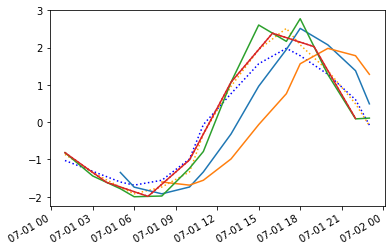

In [105]:
# Smoothing method comparison:

# SG method
soil_temp_bare_rs_smooth = savgol_filter(soil_temp_bare_rs, 5, 1)
soil_temp_bare_rs_smooth2 = savgol_filter(soil_temp_bare_rs, 3, 1)
#soil_temp_bare_rs_smooth.plot()

# Resample: time axis is shifted (not good)
#soil_temp_bare_rs.index=[dt.datetime(2015, 7, 1, 0, 0) + dt.timedelta(hours=soil_temp_bare_rs.index[i].item()) for i in range(len(soil_temp_bare_rs.index))]
#test=soil_temp_bare_rs.resample('3H').mean()
#test.index=test.index+dt.timedelta(hours=1)

plt.plot(soil_temp_bare_rs.index,soil_temp_bare_rs_smooth,label='obs.bare',linestyle="dotted", color='blue')
plt.plot(soil_temp_bare_rs.index,soil_temp_bare_rs_smooth2,label='obs.bare',linestyle="dotted", color='orange')
plt.plot(test.index,test,label='obs.bare',linestyle="dotted", color='red')

# Running average: time axis is shifted (not good)
soil_temp_bare_rs.rolling(window =3).mean().plot()
soil_temp_bare_rs.rolling(window =5).mean().plot()
soil_temp_bare_rs.plot()
test.plot()

<ipython-input-7-e7d07f3153eb>:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soil_temp_bare["date_time"]=pd.to_datetime(soil_temp_bare["date_time"])
<ipython-input-7-e7d07f3153eb>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soil_temp_moss["date_time"]=pd.to_datetime(soil_temp_moss["date_time"])
<ipython-input-7-e7d07f3153eb>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

FileNotFoundError: [Errno 2] No such file or directory: '/home/huitang/SynologyDrive/moss_lichen/sites_observation/SUB4_TSOI_10CM_diurnal_cycle_5-10_window_1.1.0.png'

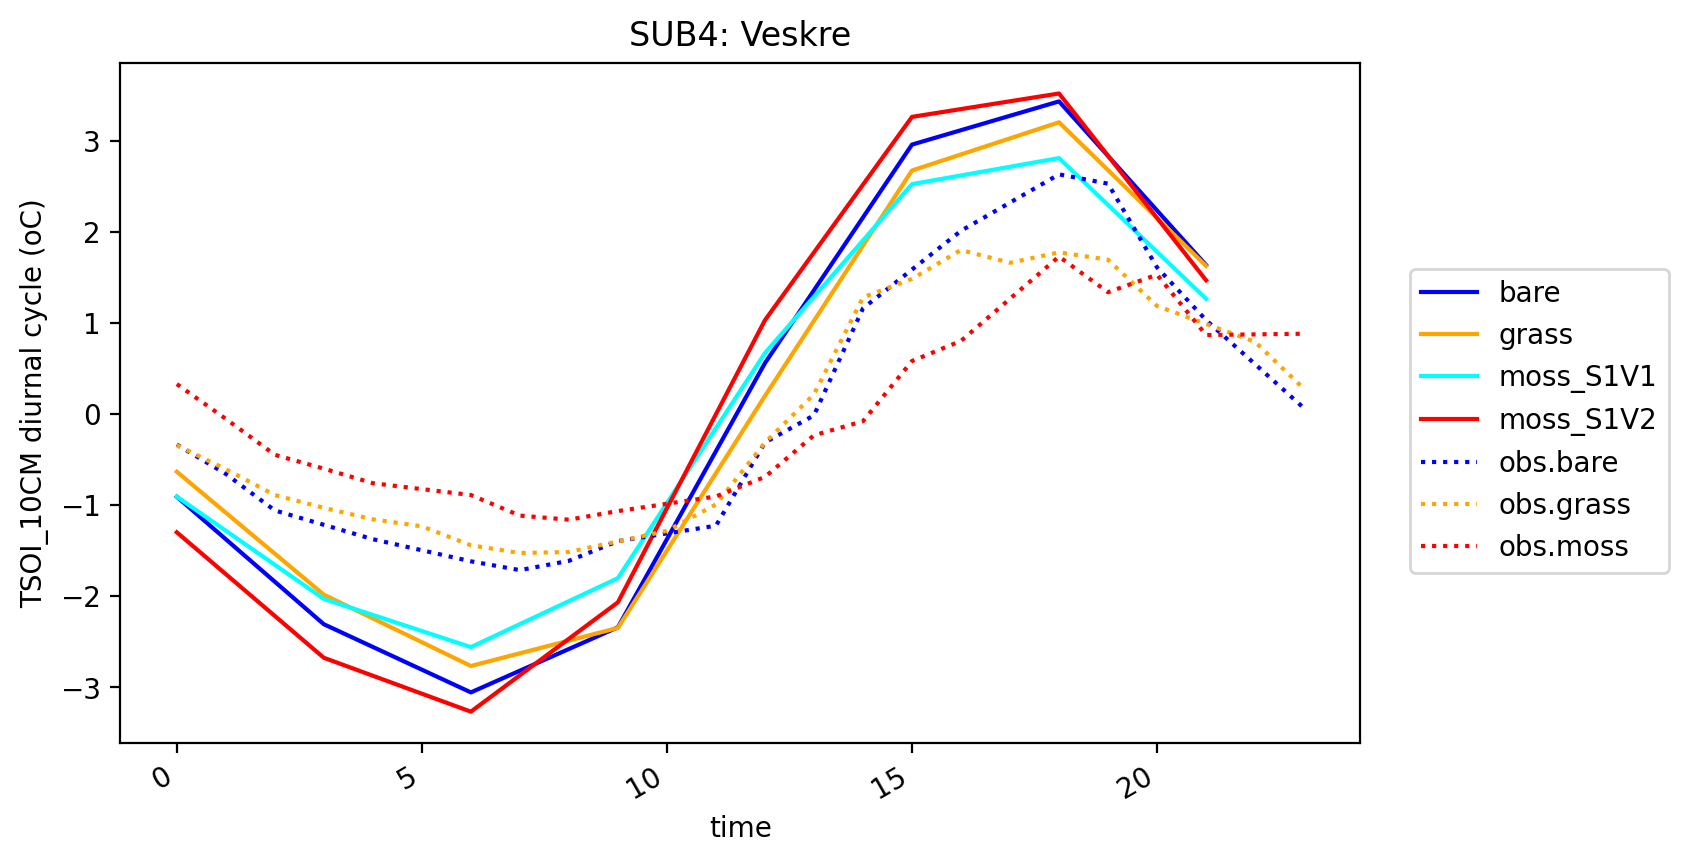

In [7]:
# Model output and comparison with observation: daily temperature range for cosmo rea


sites=["ALP1","ALP2","ALP3","ALP4","SUB1","SUB2","SUB3","SUB4","BOR1","BOR2","BOR3","BOR4"]
siteID1=["Ulvehaugen","Lavisdalen","Gudmedalen","Skjelingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"] 
#siteID2=["Ulvhaugen","Lavisdalen","Gudmedalen","Skjellingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"]
siteID3=["ULV","LAV","GUD","SKJ","ALR","HOG","RAM","VES","FAU","VIK","ARH","OVS"]


blockID=[['Ulv1','Ulv2','Ulv3','Ulv4'],
         ['Lav1','Lav2','Lav3','Lav4'],
         ['Gud12','Gud13','Gud15','Gud5'], #12 13 15 5
         ['Skj1','Skj2','Skj3','Skj4'],
         ['Alr1','Alr2','Alr3','Alr5'], #1, 2,3,5
         ['Hog1','Hog2','Hog3','Hog4'],
         ['Ram4','Ram5','Ram6','Ram8'], #4 5 6 8
         ['Ves1','Ves2','Ves3','Ves4'],
         ['Fau1','Fau2','Fau4','Fau5'], #1 2 4 5
         ['Vik2','Vik3','Vik4','Vik5'], #2, 3,4,5
         ['Arh1','Arh2','Arh3','Arh4'],       
         ['Ovs1','Ovs2','Ovs3','Ovs4']] 

# Model output

i=7

dbare = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_bare_1.1.0.clm2.h1.2015-2017.nc',decode_times=True)
dgrass = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_grass_1.1.0.clm2.h1.2015-2017.nc',decode_times=True)
dmoss_S1V1 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_1.1.4_S3V1.clm2.h1.2015-2017.nc',decode_times=True)
dmoss_S1V2 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_1.1.4_S3V2.clm2.h1.2015-2017.nc',decode_times=True)


#output comparison
#variables: "soiltemperature": 3-5 cm soil depth, hourly output
#           "soilmoisture": soilmoisture, daily output
#           "PAR" "gpp" "nee" "Reco":


#siteID=siteID1[i]                                #"Ulvehaugen"
#blockID=['Ovs1','Ovs2','Ovs3']                #"Ulv2"  isin(['Mangos', 'Grapes'])
treatment1="FGB" # Bareground
treatment2="GF"  # Moss only
treatment3="B"   # GRASS (Graminoid and Forbs) only

soil_temp_bare=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment1)
                             & (soil_temp["blockID"].isin(blockID[i]))]
soil_temp_moss=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment2)
                             & (soil_temp["blockID"].isin(blockID[i]))]
soil_temp_grass=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment3)
                             & (soil_temp["blockID"].isin(blockID[i]))]


soil_moist_bare=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment1)
                             & (soil_moist["blockID"].isin(blockID[i]))]
soil_moist_moss=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment2)
                             & (soil_moist["blockID"].isin(blockID[i]))]
soil_moist_grass=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment3)
                             & (soil_moist["blockID"].isin(blockID[i]))]

cflux_bare=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment1)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_moss=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment2)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_grass=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment3)
                             & (cflux["blockID"].isin(blockID[i]))]

mask = np.logical_or((dbare.indexes['time'] >= '2015-7-1') 
         & (dbare.indexes['time'] <= '2015-10-1'),
         (dbare.indexes['time'] >= '2016-5-1') 
         & (dbare.indexes['time'] <= '2016-7-1'))

#mask = ((dbare.indexes['time'].to_datetimeindex() >= '2015-7-1') 
#         & (dbare.indexes['time'].to_datetimeindex() <= '2015-9-1'))

# hourly data is the anomaly to the average of each day?
dbare_rs=dbare['TSOI_10CM'].loc[mask].groupby('time.hour').mean('time')-273.15
dgrass_rs=dgrass['TSOI_10CM'].loc[mask].groupby('time.hour').mean('time')-273.15
dmoss_S1V1_rs=dmoss_S1V1['TSOI_10CM'].loc[mask].groupby('time.hour').mean('time')-273.15
dmoss_S1V2_rs=dmoss_S1V2['TSOI_10CM'].loc[mask].groupby('time.hour').mean('time')-273.15

dbare_rs=dbare_rs-np.average(dbare_rs)
dgrass_rs=dgrass_rs-np.average(dgrass_rs)
dmoss_S1V1_rs=dmoss_S1V1_rs-np.average(dmoss_S1V1_rs)
dmoss_S1V2_rs=dmoss_S1V2_rs-np.average(dmoss_S1V2_rs)

# Set correct date format for dataframe

soil_temp_bare["date_time"]=pd.to_datetime(soil_temp_bare["date_time"])
soil_temp_moss["date_time"]=pd.to_datetime(soil_temp_moss["date_time"])
soil_temp_grass["date_time"]=pd.to_datetime(soil_temp_grass["date_time"])

# Resample observation data to daily or monthly mean
mask_bare = np.logical_or((soil_temp_bare["date_time"] >= '2015-7-1') 
         & (soil_temp_bare["date_time"] <= '2015-10-1'),
         (soil_temp_bare["date_time"] >= '2016-5-1') 
         & (soil_temp_bare["date_time"] <= '2016-7-1'))
mask_grass = np.logical_or((soil_temp_grass["date_time"] >= '2015-7-1') 
         & (soil_temp_grass["date_time"] <= '2015-10-1'),
         (soil_temp_grass["date_time"] >= '2016-5-1') 
         & (soil_temp_grass["date_time"] <= '2016-7-1'))
mask_moss = np.logical_or((soil_temp_moss["date_time"] >= '2015-7-1') 
         & (soil_temp_moss["date_time"] <= '2015-10-1'),
         (soil_temp_moss["date_time"] >= '2016-5-1') 
         & (soil_temp_moss["date_time"] <= '2016-7-1'))

#mask_bare = ((soil_temp_bare["date_time"] >= '2015-7-1') 
#         & (soil_temp_bare["date_time"] <= '2015-9-1'))
#mask_grass =((soil_temp_grass["date_time"] >= '2015-7-1') 
#         & (soil_temp_grass["date_time"] <= '2015-9-1'))
#mask_moss = ((soil_temp_moss["date_time"] >= '2015-7-1') 
#         & (soil_temp_moss["date_time"] <= '2015-9-1'))

soil_temp_bare_rs=soil_temp_bare.loc[mask_bare].groupby(soil_temp_bare["date_time"].dt.hour).mean()
soil_temp_grass_rs=soil_temp_grass.loc[mask_grass].groupby(soil_temp_grass["date_time"].dt.hour).mean()
soil_temp_moss_rs=soil_temp_moss.loc[mask_moss].groupby(soil_temp_moss["date_time"].dt.hour).mean()

soil_temp_bare_rs=soil_temp_bare_rs['soiltemperature']-np.average(soil_temp_bare_rs['soiltemperature'])
soil_temp_grass_rs=soil_temp_grass_rs['soiltemperature']-np.average(soil_temp_grass_rs['soiltemperature'])
soil_temp_moss_rs=soil_temp_moss_rs['soiltemperature']-np.average(soil_temp_moss_rs['soiltemperature'])

#maskrs = (atm_obs2_sel2_rs_max['date'] >= '2015-1-1') & (atm_obs2_sel2_rs_max['date'] <= '2016-12-31')

#plt.plot(atm_obs2_sel2.loc[maskt2]['date'],atm_obs2_sel2.loc[maskt2]['value'].to_numpy()-atm_obs2_sel.loc[maskt1]['value'].to_numpy(),label='obs')
#plt.plot(atm_obs2_sel2_rs_max.loc[maskrs]['date'],atm_obs2_sel2_rs_max.loc[maskrs]['value']-atm_obs2_sel2_rs_min.loc[maskrs]['value'],label='obs')


# Soil temperature and comparison with observation
plt.figure(figsize=(8,5), dpi=200)
#plt.plot(ALP1_lichen['SABG'],label='lichen')
#plt.plot(ALP1_lichen1['SABG'],label='lichen')
#plt.plot(ALP1_lichen2['SABG'],label='lichen')
#plt.plot(ALP1_moss1['TSOI_10CM']-273.15,label='moss_test1')
#plt.plot(ALP1_moss3['TSOI_10CM']-273.15,label='moss_test3')
#BOR4_bare['TSOI'].time
#plt(figsize=(10, 10), dpi=100)

plt.plot(dbare_rs.indexes["hour"],dbare_rs[:,0].data,label='bare', color='blue')
plt.plot(dgrass_rs.indexes["hour"],dgrass_rs[:,0].data,label='grass', color='orange')
plt.plot(dmoss_S1V1_rs.indexes["hour"],dmoss_S1V1_rs[:,0].data,label='moss_S1V1', color='cyan')
plt.plot(dmoss_S1V2_rs.indexes["hour"],dmoss_S1V2_rs[:,0].data,label='moss_S1V2', color='red')

#plt.plot(soil_temp_bare_rs.index,soil_temp_bare_rs['soiltemperature'],label='obs.bare',linestyle="dotted", color='blue')
#plt.plot(soil_temp_grass_rs.index,soil_temp_grass_rs['soiltemperature'],label='obs.grass',linestyle="dotted", color='orange')
#plt.plot(soil_temp_moss_rs.index,soil_temp_moss_rs['soiltemperature'],label='obs.moss',linestyle="dotted", color='yellow')

#Savitzky–Golay filter: Tips from: https://www.delftstack.com/howto/python/smooth-data-in-python/
soil_temp_bare_rs_smooth = savgol_filter(soil_temp_bare_rs, 3, 1)
soil_temp_grass_rs_smooth = savgol_filter(soil_temp_grass_rs,3, 1)
soil_temp_moss_rs_smooth = savgol_filter(soil_temp_moss_rs, 3, 1)

# Resample can do the trick but it is not better than SG method
#soil_temp_bare_rs.index=[dt.datetime(2015, 7, 1, 0, 0) + dt.timedelta(hours=soil_temp_bare_rs.index[i].item()) for i in range(len(soil_temp_bare_rs.index))]
#test=soil_temp_bare_rs.resample('3H').mean()
#test.index=test.index+dt.timedelta(hours=1)

#Tips from:

plt.plot(soil_temp_bare_rs.index,soil_temp_bare_rs_smooth,label='obs.bare',linestyle="dotted", color='blue')
plt.plot(soil_temp_grass_rs.index,soil_temp_grass_rs_smooth,label='obs.grass',linestyle="dotted", color='orange')
plt.plot(soil_temp_moss_rs.index,soil_temp_moss_rs_smooth,label='obs.moss',linestyle="dotted", color='red')

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("TSOI_10CM diurnal cycle (oC)")
plt.title(sites[i]+": "+siteID1[i])
plt.legend(loc=(1.04,0.25))
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_TSOI_10CM_diurnal_cycle_5-10_window_1.1.0.png", dpi=200)
plt.show()


In [52]:
dbare.indexes['time']

CFTimeIndex([2015-01-01 00:00:00, 2015-01-01 03:00:00, 2015-01-01 06:00:00,
             2015-01-01 09:00:00, 2015-01-01 12:00:00, 2015-01-01 15:00:00,
             2015-01-01 18:00:00, 2015-01-01 21:00:00, 2015-01-02 00:00:00,
             2015-01-02 03:00:00,
             ...
             2016-12-30 18:00:00, 2016-12-30 21:00:00, 2016-12-31 00:00:00,
             2016-12-31 03:00:00, 2016-12-31 06:00:00, 2016-12-31 09:00:00,
             2016-12-31 12:00:00, 2016-12-31 15:00:00, 2016-12-31 18:00:00,
             2016-12-31 21:00:00],
            dtype='object', length=5840, calendar='noleap')

In [71]:
soil_temp_bare_rs.index[i]
#=soil_temp_bare_rs-np.average(soil_temp_bare_rs)

1

In [298]:
test=soil_temp_bare_rs['soiltemperature']-np.average(soil_temp_bare_rs['soiltemperature'])
test

date_time
1    -0.821873
3    -1.446016
5    -1.789004
6    -2.004245
8    -1.984700
10   -1.240613
11   -0.790801
13    1.069424
15    2.603642
17    2.164718
18    2.773372
20    1.274774
22    0.085274
23    0.106048
Name: soiltemperature, dtype: float64

In [299]:
test.index

Int64Index([1, 3, 5, 6, 8, 10, 11, 13, 15, 17, 18, 20, 22, 23], dtype='int64', name='date_time')

In [256]:
soil_temp_bare["date_time"]

557371   2015-07-21 01:11:01+00:00
557372   2015-07-21 03:35:01+00:00
557373   2015-07-21 05:59:01+00:00
557374   2015-07-21 08:23:01+00:00
557375   2015-07-21 10:47:01+00:00
                    ...           
591966   2016-06-30 13:32:01+00:00
591967   2016-06-30 15:56:01+00:00
591968   2016-06-30 18:20:01+00:00
591969   2016-06-30 20:44:01+00:00
591970   2016-06-30 23:08:01+00:00
Name: date_time, Length: 6920, dtype: datetime64[ns, UTC]

In [124]:
soil_temp_bare_rs

Series([], Name: soiltemperature, dtype: float64)

<ipython-input-199-d688ca5107cc>:3: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  plt.plot(dbare_rs.indexes['time'].to_datetimeindex(),dbare_rs[:,0].data,label='bare', color='blue')


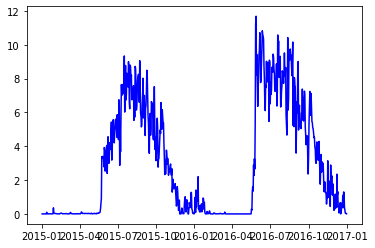

In [199]:
dbare_rs=dbare['TSOI_10CM'].resample(time='1D').max()-dbare['TSOI_10CM'].resample(time='1D').min()
dbare_rs
plt.plot(dbare_rs.indexes['time'].to_datetimeindex(),dbare_rs[:,0].data,label='bare', color='blue')

In [ ]:
ds.sel(time="2000-01")

plt.plot(soil_temp_bare_rs.loc['2016-4-1':'2016-7-1'].index,soil_temp_bare_rs.loc['2016-4-1':'2016-7-1']['soiltemperature'],label='Obs.bare',linestyle="--", color='blue')
plt.plot(soil_temp_moss_rs.loc['2016-4-1':'2016-7-1'].index,soil_temp_moss_rs.loc['2016-4-1':'2016-7-1']['soiltemperature'],label='Obs.moss',linestyle="--", color='orange')
plt.plot(soil_temp_grass_rs.loc['2016-4-1':'2016-7-1'].index,soil_temp_grass_rs.loc['2016-4-1':'2016-7-1']['soiltemperature'],label='Obs.grass',linestyle="--", color='yellow')
plt.plot(dbare['TSOI'].time,dbare['TSOI'][:,1,0].data-273.15,label='bare', color='blue')
plt.plot(dgrass['TSOI'].time,dgrass['TSOI'][:,1,0].data-273.15,label='grass', color='orange')
plt.plot(dmoss_S1V1['TSOI'].time,dmoss_S1V1['TSOI'][:,1,0].data-273.15,label='moss_S1V1', color='cyan')
plt.plot(dmoss_S1V2['TSOI'].time,dmoss_S1V2['TSOI'][:,1,0].data-273.15,label='moss_S1V2', color='maroon')
plt.plot(dmoss_S1['TSOI'].time,dmoss_S1['TSOI'][:,1,0].data-273.15,label='moss_S1', color='purple')
plt.plot(dmoss_S2['TSOI'].time,dmoss_S2['TSOI'][:,2,0].data-273.15,label='moss_S2', color='yellow')
plt.plot(dmoss_S3['TSOI'].time,dmoss_S3['TSOI'][:,3,0].data-273.15,label='moss_S3', color='green')

plt.gcf().autofmt_xdate()

plt.xlabel("time (months)")
plt.ylabel("TSOI")
plt.title("soil temperature under moss")
plt.legend(loc='best')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_TSOI_daily.png")
plt.show()

In [183]:
soil_temp_bare
#soil_moist_bare_rs.index
dbare.indexes['time']

CFTimeIndex([2015-01-01 00:00:00, 2015-01-02 00:00:00, 2015-01-03 00:00:00,
             2015-01-04 00:00:00, 2015-01-05 00:00:00, 2015-01-06 00:00:00,
             2015-01-07 00:00:00, 2015-01-08 00:00:00, 2015-01-09 00:00:00,
             2015-01-10 00:00:00,
             ...
             2016-12-22 00:00:00, 2016-12-23 00:00:00, 2016-12-24 00:00:00,
             2016-12-25 00:00:00, 2016-12-26 00:00:00, 2016-12-27 00:00:00,
             2016-12-28 00:00:00, 2016-12-29 00:00:00, 2016-12-30 00:00:00,
             2016-12-31 00:00:00],
            dtype='object', length=730, calendar='noleap')

In [44]:
# Soil moisture

soil_moist_bare["date"]=pd.to_datetime(soil_moist_bare["date"])
soil_moist_moss["date"]=pd.to_datetime(soil_moist_moss["date"])
soil_moist_grass["date"]=pd.to_datetime(soil_moist_grass["date"])

soil_moist_bare_rs=soil_moist_bare.resample('D', on="date").mean()
soil_moist_moss_rs=soil_moist_moss.resample('D', on="date").mean()
soil_moist_grass_rs=soil_moist_grass.resample('D', on="date").mean()

#plt.figure(figsize=(8,8))
#plt.plot(ALP1_lichen['SABG'],label='lichen')
#plt.plot(ALP1_lichen1['SABG'],label='lichen')
#plt.plot(ALP1_lichen2['SABG'],label='lichen')
#plt.plot(ALP1_moss1['TSOI_10CM']-273.15,label='moss_test1')
#plt.plot(ALP1_moss3['TSOI_10CM']-273.15,label='moss_test3')
#plt.scatter(soil_moist_bare_rs.loc['2015-1-1':'2019-12-31'].index,
#            soil_moist_bare_rs.loc['2015-1-1':'2019-12-31']['soilmoisture'],label='bare')
#plt.scatter(soil_moist_moss_rs.loc['2015-1-1':'2019-12-31'].index,
 #           soil_moist_moss_rs.loc['2015-1-1':'2019-12-31']['soilmoisture'],label='moss')
#plt.scatter(soil_moist_grass_rs.loc['2015-1-1':'2019-12-31'].index,
#            soil_moist_grass_rs.loc['2015-1-1':'2019-12-31']['soilmoisture'],label='grass')
#plt.plot(ALP1_moss3['TSOI_10CM']-273.15,label='moss_test3')
#plt.scatter(soil_moist_moss_rs.loc['2015-1-1':'2019-12-31']['soilmoisture'],
#            soil_moist_bare_rs.loc['2015-1-1':'2019-12-31']['soilmoisture'],label='grass')

#plt.plot(soil_moist_grass_rs.loc['2015-1-1':'2016-12-31'].index,soil_moist_grass_rs.loc['2015-1-1':'2016-12-31']['soilmoisture'],label='Obs.grass',linestyle="--", color='yellow')
#plt.plot(soil_moist_grass_rs.index,soil_moist_grass_rs['soilmoisture'],label='Obs.grass',linestyle="--", color='yellow')

#x = np.linspace(0,40,100)
#plt.plot(x, x)

#plt.xlabel("soil moisture (m3/m3) model")  # unit: mm3/mm3
#plt.ylabel("soil moisture (m3/m3) obs")   # unit: m3/m3
#plt.title("soil moisture in top 10cm of soil")
#plt.legend(loc='best')
#plt.grid(True)
#plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/monthly_H2OSOI_10CM.png")
#plt.show()

<ipython-input-44-4ecc49d7e866>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soil_moist_bare["date"]=pd.to_datetime(soil_moist_bare["date"])
<ipython-input-44-4ecc49d7e866>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soil_moist_moss["date"]=pd.to_datetime(soil_moist_moss["date"])
<ipython-input-44-4ecc49d7e866>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

<ipython-input-14-ea3a71513307>:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atm_obs4_sel['date']=pd.to_datetime(atm_obs4_sel['date'])
<ipython-input-14-ea3a71513307>:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atm_obs4_sel2['date']=pd.to_datetime(atm_obs4_sel2['date'])
<ipython-input-14-ea3a71513307>:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

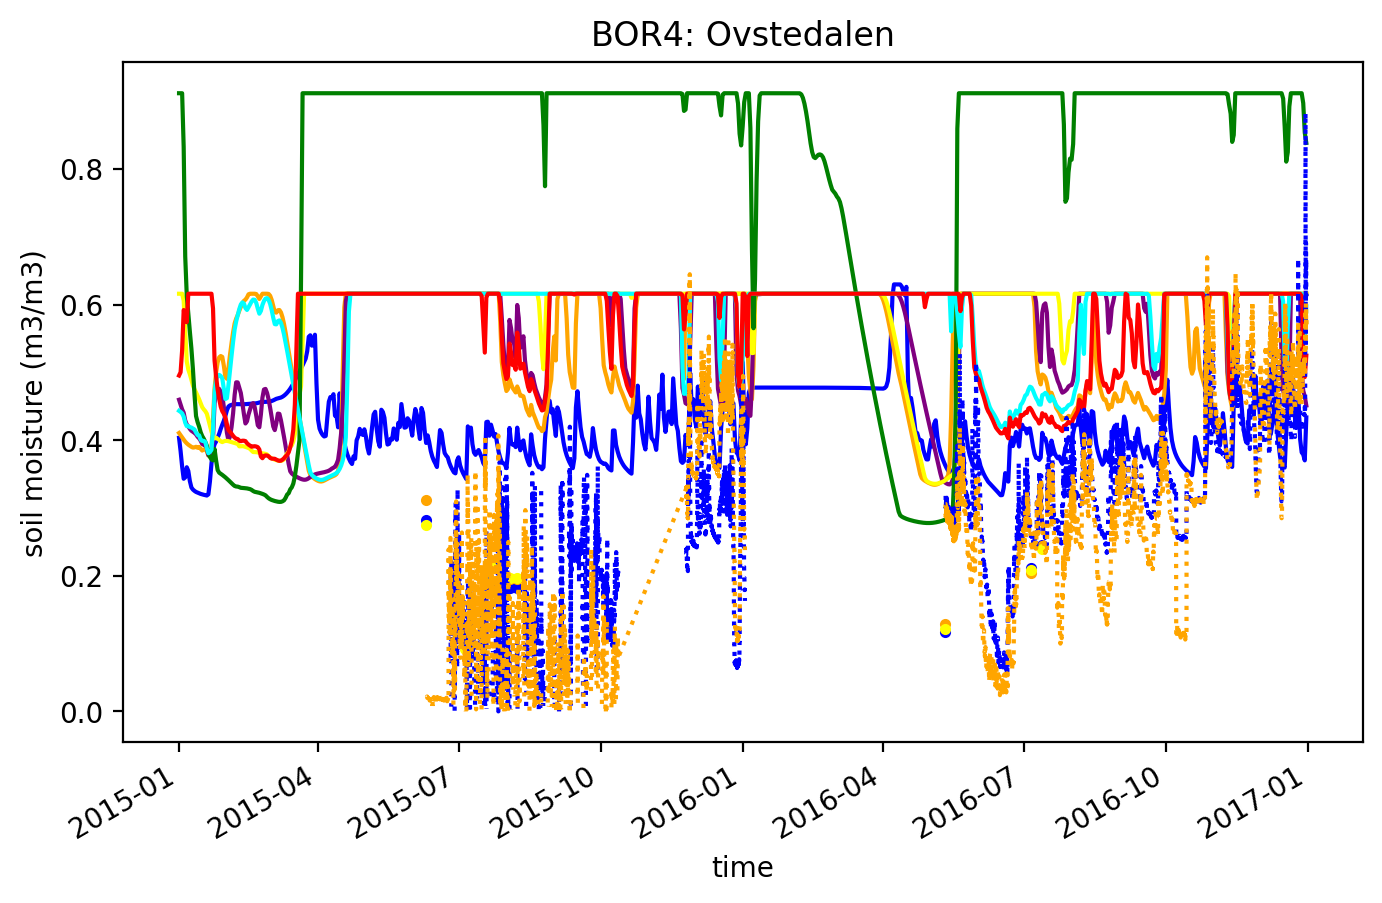

In [14]:
# Model output and comparison with observation

#no enough data: i=2,3
# very good data: i=9

# Model output
i=11

dbare = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_bare_1.0.2.clm2.h2.2015-2016.nc',decode_times=True)
dgrass = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_grass_1.0.0.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S1 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S1.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S2 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S2.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S3 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S3.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S1V1 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_1.0.0_S1V1.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S1V2 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_1.0.0_S1V2.clm2.h2.2015-2016.nc',decode_times=True)


#output comparison
#variables: "soiltemperature": 3-5 cm soil depth, hourly output
#           "soilmoisture": soilmoisture, daily output
#           "PAR" "gpp" "nee" "Reco":

sites=["ALP1","ALP2","ALP3","ALP4","SUB1","SUB2","SUB3","SUB4","BOR1","BOR2","BOR3","BOR4"]
siteID1=["Ulvehaugen","Lavisdalen","Gudmedalen","Skjelingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"] 
siteID2=["Ulvhaugen","Lavisdalen","Gudmedalen","Skjellingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"]
siteID3=["ULV","LAV","GUD","SKJ","ALR","HOG","RAM","VES","FAU","VIK","ARH","OVS"]


blockID=[['Ulv1','Ulv2','Ulv3','Ulv4'],
         ['Lav1','Lav2','Lav3','Lav4'],
         ['Gud12','Gud13','Gud15','Gud5'], #12 13 15 5
         ['Skj1','Skj2','Skj3','Skj4'],
         ['Alr1','Alr2','Alr3','Alr5'], #1, 2,3,5
         ['Hog1','Hog2','Hog3','Hog4'],
         ['Ram4','Ram5','Ram6','Ram8'], #4 5 6 8
         ['Ves1','Ves2','Ves3','Ves4'],
         ['Fau1','Fau2','Fau4','Fau5'], #1 2 4 5
         ['Vik2','Vik3','Vik4','Vik5'], #2, 3,4,5
         ['Arh1','Arh2','Arh3','Arh4'],       
         ['Ovs1','Ovs2','Ovs3','Ovs4']] 


#siteID=siteID1[i]                                #"Ulvehaugen"
#blockID=['Ovs1','Ovs2','Ovs3']                #"Ulv2"  isin(['Mangos', 'Grapes'])
treatment1="FGB" # Bareground
treatment2="GF"  # Moss only
treatment3="B"   # GRASS (Graminoid and Forbs) only

soil_temp_bare=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment1)
                             & (soil_temp["blockID"].isin(blockID[i]))]
soil_temp_moss=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment2)
                             & (soil_temp["blockID"].isin(blockID[i]))]
soil_temp_grass=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment3)
                             & (soil_temp["blockID"].isin(blockID[i]))]


soil_moist_bare=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment1)
                             & (soil_moist["blockID"].isin(blockID[i]))]
soil_moist_moss=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment2)
                             & (soil_moist["blockID"].isin(blockID[i]))]
soil_moist_grass=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment3)
                             & (soil_moist["blockID"].isin(blockID[i]))]

cflux_bare=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment1)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_moss=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment2)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_grass=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment3)
                             & (cflux["blockID"].isin(blockID[i]))]



# Moisture logger="soil.moisture1", "soil.moisture2"
atm_obs4_sel=atm_obs4[(atm_obs4["siteID"]==siteID2[i])
                            & (atm_obs4["logger"]=="soil.moisture1")]
#time_obs4=pd.to_datetime(atm_obs4_sel["date"])
atm_obs4_sel2=atm_obs4[(atm_obs4["siteID"]==siteID2[i])
                            & (atm_obs4["logger"]=="soil.moisture2")]
#time_obs4_2=pd.to_datetime(atm_obs4_sel2["date"])

atm_obs4_sel['date']=pd.to_datetime(atm_obs4_sel['date'])
#atm_obs4_sel.loc['2015-1-1':'2016-12-31']
mask0 = (atm_obs4_sel['date'] >= '2015-1-1') & (atm_obs4_sel['date'] <= '2016-12-31')
#mask0
#atm_obs4_sel.loc['2015-1-1':'2016-12-31']
#atm_obs4_sel.loc[mask0]
atm_obs4_sel2['date']=pd.to_datetime(atm_obs4_sel2['date'])
mask2 = (atm_obs4_sel2['date'] >= '2015-1-1') & (atm_obs4_sel2['date'] <= '2016-12-31')
#mask2
#atm_obs4_sel.loc['2015-1-1':'2016-12-31']
#atm_obs4_sel2.loc[mask2]


soil_moist_bare["date"]=pd.to_datetime(soil_moist_bare["date"])
soil_moist_moss["date"]=pd.to_datetime(soil_moist_moss["date"])
soil_moist_grass["date"]=pd.to_datetime(soil_moist_grass["date"])

soil_moist_bare_rs=soil_moist_bare.resample('D', on="date").mean()
soil_moist_moss_rs=soil_moist_moss.resample('D', on="date").mean()
soil_moist_grass_rs=soil_moist_grass.resample('D', on="date").mean()

plt.figure(figsize=(8,5), dpi=200)

plt.plot(dbare.indexes['time'].to_datetimeindex(),dbare['H2OSOI'][:,2,0].data,label='bare_slop20', color='blue')
plt.plot(dgrass.indexes['time'].to_datetimeindex(),dgrass['H2OSOI'][:,2,0].data,label='grass', color='orange')
plt.plot(dmoss_S1.indexes['time'].to_datetimeindex(),dmoss_S1['H2OSOI'][:,2,0].data,label='moss_S1', color='purple')
plt.plot(dmoss_S2.indexes['time'].to_datetimeindex(),dmoss_S2['H2OSOI'][:,2,0].data,label='moss_S2', color='yellow')
plt.plot(dmoss_S3.indexes['time'].to_datetimeindex(),dmoss_S3['H2OSOI'][:,2,0].data,label='moss_S3', color='green')
plt.plot(dmoss_S1V1.indexes['time'].to_datetimeindex(),dmoss_S1V1['H2OSOI'][:,2,0].data,label='moss_S1V1', color='cyan')
plt.plot(dmoss_S1V2.indexes['time'].to_datetimeindex(),dmoss_S1V2['H2OSOI'][:,2,0].data,label='moss_S1V2', color='red')
plt.scatter(soil_moist_bare_rs.loc['2015-1-1':'2016-12-31'].index,
         soil_moist_bare_rs.loc['2015-1-1':'2016-12-31']['soilmoisture']/100,label='Obs.bare', marker=".",color='blue')
plt.scatter(soil_moist_grass_rs.loc['2015-1-1':'2016-12-31'].index,
         soil_moist_grass_rs.loc['2015-1-1':'2016-12-31']['soilmoisture']/100,label='Obs.grass',marker=".", color='orange')
plt.scatter(soil_moist_moss_rs.loc['2015-1-1':'2016-12-31'].index,
         soil_moist_moss_rs.loc['2015-1-1':'2016-12-31']['soilmoisture']/100,label='Obs.moss',marker=".", color='yellow')

plt.plot(atm_obs4_sel.loc[mask0]['date'],atm_obs4_sel.loc[mask0]['value'],linestyle="dotted",label='obs.logger1',color='blue')
plt.plot(atm_obs4_sel2.loc[mask2]['date'],atm_obs4_sel2.loc[mask2]['value'],linestyle="dotted",label='obs.logger2',color='orange')

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("soil moisture (m3/m3)")
plt.title(sites[i]+": "+siteID1[i])
#plt.legend(loc='upper right')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_soilmoist_daily_slop20.png", dpi=200)
plt.show()

<ipython-input-29-eaa8733f7529>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atm_obs4_sel['date']=pd.to_datetime(atm_obs4_sel['date'])
<ipython-input-29-eaa8733f7529>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atm_obs4_sel2['date']=pd.to_datetime(atm_obs4_sel2['date'])
<ipython-input-29-eaa8733f7529>:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

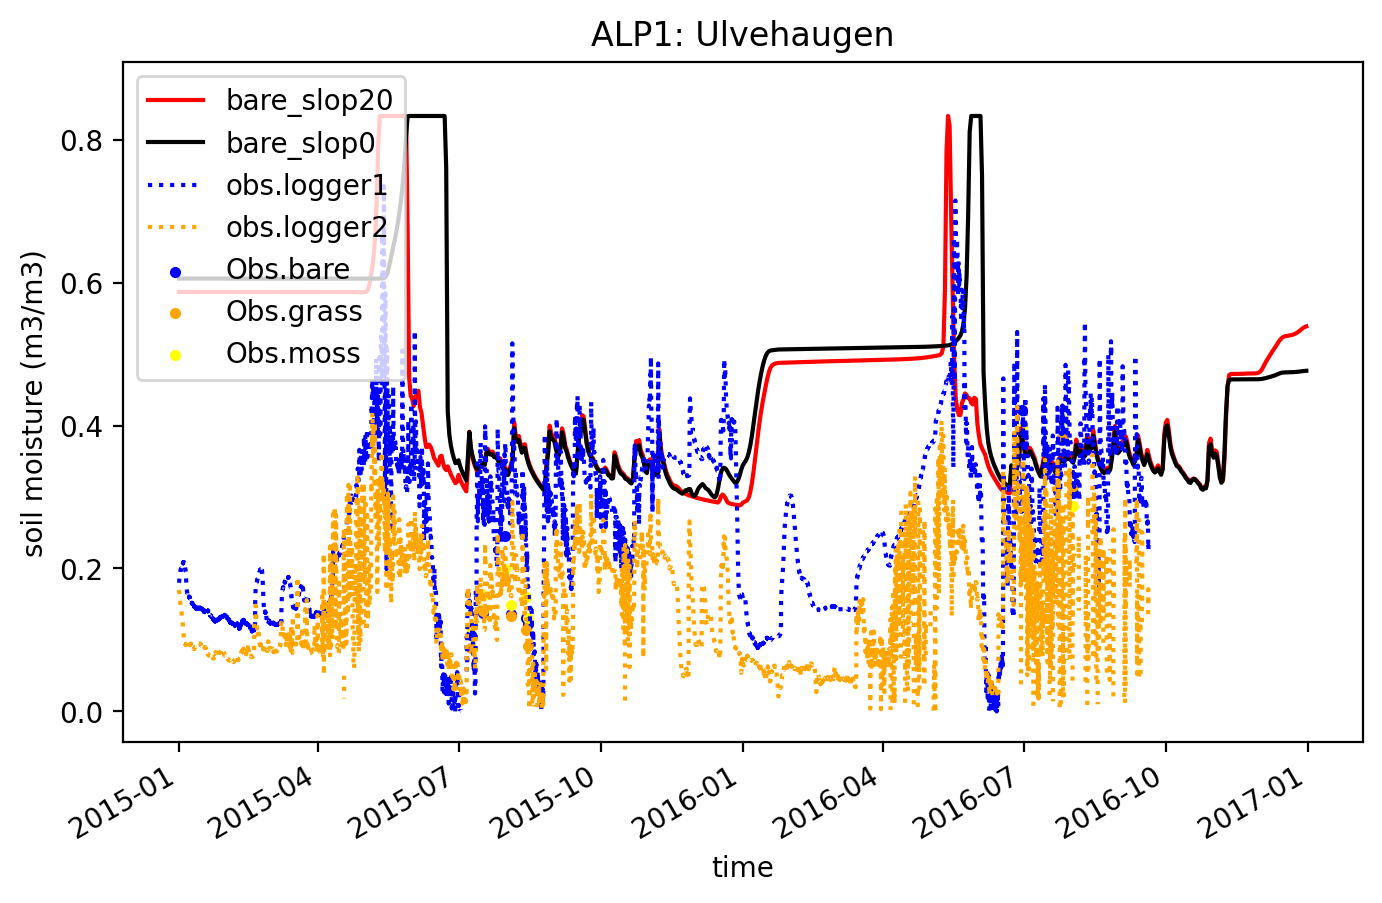

In [29]:
# Comparison between slop20 and slop0

# Model output and comparison with observation

#no enough data: i=2,3
# very good data: i=9

# Model output
i=0

dbare = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_bare_1.0.2.clm2.h2.2015-2016.nc',decode_times=True)
dbare2 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_bare_1.0.0.clm2.h2.2015-2016.nc',decode_times=True)

#output comparison
#variables: "soiltemperature": 3-5 cm soil depth, hourly output
#           "soilmoisture": soilmoisture, daily output
#           "PAR" "gpp" "nee" "Reco":

sites=["ALP1","ALP2","ALP3","ALP4","SUB1","SUB2","SUB3","SUB4","BOR1","BOR2","BOR3","BOR4"]
siteID1=["Ulvehaugen","Lavisdalen","Gudmedalen","Skjelingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"] 
siteID2=["Ulvhaugen","Lavisdalen","Gudmedalen","Skjellingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"]
siteID3=["ULV","LAV","GUD","SKJ","ALR","HOG","RAM","VES","FAU","VIK","ARH","OVS"]


blockID=[['Ulv1','Ulv2','Ulv3','Ulv4'],
         ['Lav1','Lav2','Lav3','Lav4'],
         ['Gud12','Gud13','Gud15','Gud5'], #12 13 15 5
         ['Skj1','Skj2','Skj3','Skj4'],
         ['Alr1','Alr2','Alr3','Alr5'], #1, 2,3,5
         ['Hog1','Hog2','Hog3','Hog4'],
         ['Ram4','Ram5','Ram6','Ram8'], #4 5 6 8
         ['Ves1','Ves2','Ves3','Ves4'],
         ['Fau1','Fau2','Fau4','Fau5'], #1 2 4 5
         ['Vik2','Vik3','Vik4','Vik5'], #2, 3,4,5
         ['Arh1','Arh2','Arh3','Arh4'],       
         ['Ovs1','Ovs2','Ovs3','Ovs4']] 


#siteID=siteID1[i]                                #"Ulvehaugen"
#blockID=['Ovs1','Ovs2','Ovs3']                #"Ulv2"  isin(['Mangos', 'Grapes'])
treatment1="FGB" # Bareground
treatment2="GF"  # Moss only
treatment3="B"   # GRASS (Graminoid and Forbs) only

soil_temp_bare=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment1)
                             & (soil_temp["blockID"].isin(blockID[i]))]
soil_temp_moss=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment2)
                             & (soil_temp["blockID"].isin(blockID[i]))]
soil_temp_grass=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment3)
                             & (soil_temp["blockID"].isin(blockID[i]))]


soil_moist_bare=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment1)
                             & (soil_moist["blockID"].isin(blockID[i]))]
soil_moist_moss=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment2)
                             & (soil_moist["blockID"].isin(blockID[i]))]
soil_moist_grass=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment3)
                             & (soil_moist["blockID"].isin(blockID[i]))]

cflux_bare=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment1)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_moss=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment2)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_grass=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment3)
                             & (cflux["blockID"].isin(blockID[i]))]



# Moisture logger="soil.moisture1", "soil.moisture2"
atm_obs4_sel=atm_obs4[(atm_obs4["siteID"]==siteID2[i])
                            & (atm_obs4["logger"]=="soil.moisture1")]
#time_obs4=pd.to_datetime(atm_obs4_sel["date"])
atm_obs4_sel2=atm_obs4[(atm_obs4["siteID"]==siteID2[i])
                            & (atm_obs4["logger"]=="soil.moisture2")]
#time_obs4_2=pd.to_datetime(atm_obs4_sel2["date"])

atm_obs4_sel['date']=pd.to_datetime(atm_obs4_sel['date'])
#atm_obs4_sel.loc['2015-1-1':'2016-12-31']
mask0 = (atm_obs4_sel['date'] >= '2015-1-1') & (atm_obs4_sel['date'] <= '2016-12-31')
#mask0
#atm_obs4_sel.loc['2015-1-1':'2016-12-31']
#atm_obs4_sel.loc[mask0]
atm_obs4_sel2['date']=pd.to_datetime(atm_obs4_sel2['date'])
mask2 = (atm_obs4_sel2['date'] >= '2015-1-1') & (atm_obs4_sel2['date'] <= '2016-12-31')
#mask2
#atm_obs4_sel.loc['2015-1-1':'2016-12-31']
#atm_obs4_sel2.loc[mask2]


soil_moist_bare["date"]=pd.to_datetime(soil_moist_bare["date"])
soil_moist_moss["date"]=pd.to_datetime(soil_moist_moss["date"])
soil_moist_grass["date"]=pd.to_datetime(soil_moist_grass["date"])

soil_moist_bare_rs=soil_moist_bare.resample('D', on="date").mean()
soil_moist_moss_rs=soil_moist_moss.resample('D', on="date").mean()
soil_moist_grass_rs=soil_moist_grass.resample('D', on="date").mean()

plt.figure(figsize=(8,5), dpi=200)

plt.plot(dbare.indexes['time'].to_datetimeindex(),dbare['H2OSOI'][:,2,0].data,label='bare_slop20', color='red')
plt.plot(dbare2.indexes['time'].to_datetimeindex(),dbare2['H2OSOI'][:,2,0].data,label='bare_slop0', color='black')

plt.scatter(soil_moist_bare_rs.loc['2015-1-1':'2016-12-31'].index,
         soil_moist_bare_rs.loc['2015-1-1':'2016-12-31']['soilmoisture']/100,label='Obs.bare', marker=".",color='blue')
plt.scatter(soil_moist_grass_rs.loc['2015-1-1':'2016-12-31'].index,
         soil_moist_grass_rs.loc['2015-1-1':'2016-12-31']['soilmoisture']/100,label='Obs.grass',marker=".", color='orange')
plt.scatter(soil_moist_moss_rs.loc['2015-1-1':'2016-12-31'].index,
         soil_moist_moss_rs.loc['2015-1-1':'2016-12-31']['soilmoisture']/100,label='Obs.moss',marker=".", color='yellow')

plt.plot(atm_obs4_sel.loc[mask0]['date'],atm_obs4_sel.loc[mask0]['value'],linestyle="dotted",label='obs.logger1',color='blue')
plt.plot(atm_obs4_sel2.loc[mask2]['date'],atm_obs4_sel2.loc[mask2]['value'],linestyle="dotted",label='obs.logger2',color='orange')

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("soil moisture (m3/m3)")
plt.title(sites[i]+": "+siteID1[i])
plt.legend(loc='upper left')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_soilmoist_daily_slop20-0.png", dpi=200)
plt.show()

In [ ]:
# Soil moisture mass concentration (kg/m3) to volumetric concentration (m3/m3)

h2osoi_vol(c,k) = h2osoi_liq(c,k)/(dz(c,k)*denh2o) &
                     + h2osoi_ice(c,k)/(dz(c,k)*denice)

denh2o=1.000e3
denice=0.917e3
    
liq_vol=h2osoi_vol*(h2osoi_liq*denice)/(h2osoi_ice*denh2o)/((h2osoi_liq*denice)/(h2osoi_ice*denh2o)+1) 

    

<ipython-input-104-2305e2daf00c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cflux_bare["date"]=pd.to_datetime(cflux_bare["date"])
<ipython-input-104-2305e2daf00c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cflux_moss["date"]=pd.to_datetime(cflux_moss["date"])
<ipython-input-104-2305e2daf00c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

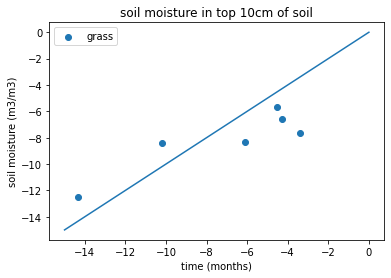

In [104]:
# Carbon flux and comparison with observation

cflux_bare["date"]=pd.to_datetime(cflux_bare["date"])
cflux_moss["date"]=pd.to_datetime(cflux_moss["date"])
cflux_grass["date"]=pd.to_datetime(cflux_grass["date"])

cflux_bare_rs=cflux_bare.resample('D', on="date").mean()
cflux_moss_rs=cflux_moss.resample('D', on="date").mean()
cflux_grass_rs=cflux_grass.resample('D', on="date").mean()

#plt.figure(figsize=(8,8))
#plt.plot(ALP1_lichen['SABG'],label='lichen')
#plt.plot(ALP1_lichen1['SABG'],label='lichen')
#plt.plot(ALP1_lichen2['SABG'],label='lichen')
#plt.plot(ALP1_moss1['TSOI_10CM']-273.15,label='moss_test1')
#plt.plot(ALP1_moss3['TSOI_10CM']-273.15,label='moss_test3')
#plt.scatter(cflux_bare['date'],
 #           cflux_bare['gpp'],label='bare')
#plt.scatter(cflux_moss['date'],
 #           cflux_moss['gpp'],label='moss')
#plt.scatter(cflux_grass['date'],
#            cflux_grass['gpp'],label='grass')
#plt.plot(ALP1_moss3['TSOI_10CM']-273.15,label='moss_test3')
plt.scatter(cflux_moss_rs.loc['2015-1-1':'2019-12-31']['gpp'],
            cflux_grass_rs.loc['2015-1-1':'2019-12-31']['gpp'],label='grass')

x = np.linspace(-15,0,100)
plt.plot(x, x)

plt.xlabel("time (months)")
plt.ylabel("soil moisture (m3/m3)")
plt.title("soil moisture in top 10cm of soil")
plt.legend(loc='best')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/monthly_TSOI_10CM.png")
plt.show()

<ipython-input-60-c0f57243e498>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cflux_bare["date"]=pd.to_datetime(cflux_bare["date"])
<ipython-input-60-c0f57243e498>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cflux_moss["date"]=pd.to_datetime(cflux_moss["date"])
<ipython-input-60-c0f57243e498>:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

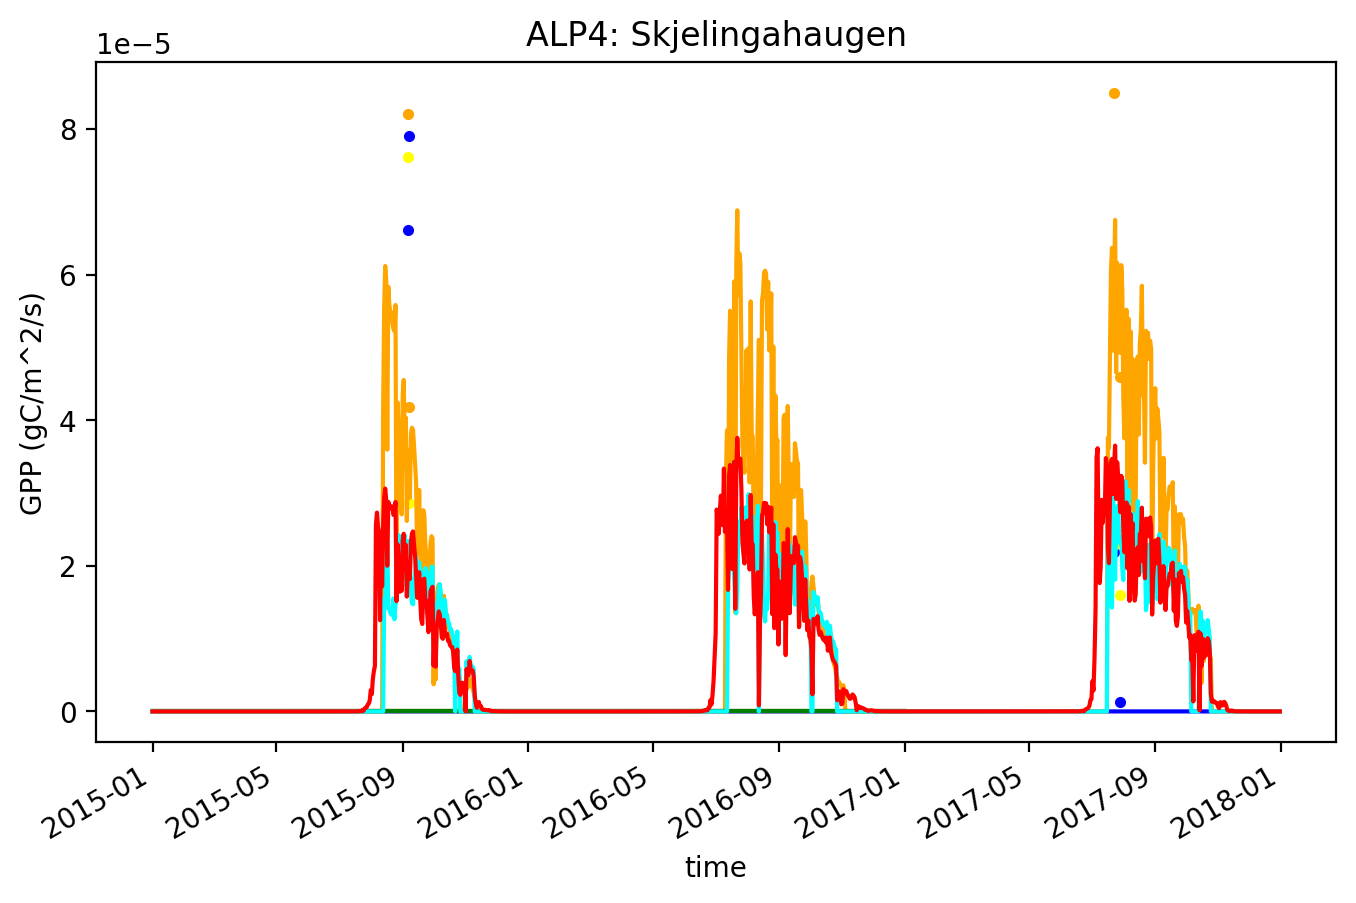

In [60]:
# Model output and comparison with observation

# Model output
i=3

dbare = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_bare_1.1.0.clm2.h2.2015-2017.nc',decode_times=True)
dgrass = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_grass_1.1.0.clm2.h2.2015-2017.nc',decode_times=True)
dmoss_S1 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S1.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S2 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S2.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S3 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S3.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S1V1 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_1.1.0_S1V1.clm2.h2.2015-2017.nc',decode_times=True)
dmoss_S1V2 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_1.1.0_S1V2.clm2.h2.2015-2017.nc',decode_times=True)


#output comparison
#variables: "soiltemperature": 3-5 cm soil depth, hourly output
#           "soilmoisture": soilmoisture, daily output
#           "PAR" "gpp" "nee" "Reco":

sites=["ALP1","ALP2","ALP3","ALP4","SUB1","SUB2","SUB3","SUB4","BOR1","BOR2","BOR3","BOR4"]
siteID1=["Ulvehaugen","Lavisdalen","Gudmedalen","Skjelingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"] 
#siteID2=["Ulvhaugen","Lavisdalen","Gudmedalen","Skjellingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"]
siteID3=["ULV","LAV","GUD","SKJ","ALR","HOG","RAM","VES","FAU","VIK","ARH","OVS"]


blockID=[['Ulv1','Ulv2','Ulv3','Ulv4'],
         ['Lav1','Lav2','Lav3','Lav4'],
         ['Gud12','Gud13','Gud15','Gud5'], #12 13 15 5
         ['Skj1','Skj2','Skj3','Skj4'],
         ['Alr1','Alr2','Alr3','Alr5'], #1, 2,3,5
         ['Hog1','Hog2','Hog3','Hog4'],
         ['Ram4','Ram5','Ram6','Ram8'], #4 5 6 8
         ['Ves1','Ves2','Ves3','Ves4'],
         ['Fau1','Fau2','Fau4','Fau5'], #1 2 4 5
         ['Vik2','Vik3','Vik4','Vik5'], #2, 3,4,5
         ['Arh1','Arh2','Arh3','Arh4'],       
         ['Ovs1','Ovs2','Ovs3','Ovs4']] 


#siteID=siteID1[i]                                #"Ulvehaugen"
#blockID=['Ovs1','Ovs2','Ovs3']                #"Ulv2"  isin(['Mangos', 'Grapes'])
treatment1="FGB" # Bareground
treatment2="GF"  # Moss only
treatment3="B"   # GRASS (Graminoid and Forbs) only

soil_temp_bare=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment1)
                             & (soil_temp["blockID"].isin(blockID[i]))]
soil_temp_moss=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment2)
                             & (soil_temp["blockID"].isin(blockID[i]))]
soil_temp_grass=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment3)
                             & (soil_temp["blockID"].isin(blockID[i]))]


soil_moist_bare=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment1)
                             & (soil_moist["blockID"].isin(blockID[i]))]
soil_moist_moss=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment2)
                             & (soil_moist["blockID"].isin(blockID[i]))]
soil_moist_grass=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment3)
                             & (soil_moist["blockID"].isin(blockID[i]))]

cflux_bare=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment1)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_moss=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment2)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_grass=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment3)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_control=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]=="C")
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_G=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]=="G")
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_F=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]=="F")
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_GB=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]=="GB")
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_FB=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]=="FB")
                             & (cflux["blockID"].isin(blockID[i]))]

# Carbon flux and comparison with observation
# Unit observation: µmol mol-1 s-1 gpp  (should be µmol m-2 s-1 )
# Unit model: gC/m^2/s

cflux_bare["date"]=pd.to_datetime(cflux_bare["date"])
cflux_moss["date"]=pd.to_datetime(cflux_moss["date"])
cflux_grass["date"]=pd.to_datetime(cflux_grass["date"])

cflux_bare_rs=cflux_bare.resample('D', on="date").mean()*(-12)/1000000
cflux_moss_rs=cflux_moss.resample('D', on="date").mean()*(-12)/1000000
cflux_grass_rs=cflux_grass.resample('D', on="date").mean()*(-12)/1000000

plt.figure(figsize=(8,5), dpi=200)

plt.scatter(cflux_bare_rs.loc['2015-1-1':'2017-12-31'].index,
         cflux_bare_rs.loc['2015-1-1':'2017-12-31']['gpp'],label='Obs.bare', marker=".",color='blue')
plt.scatter(cflux_grass_rs.loc['2015-1-1':'2017-12-31'].index,
         cflux_grass_rs.loc['2015-1-1':'2017-12-31']['gpp'],label='Obs.grass',marker=".", color='orange')
plt.scatter(cflux_moss_rs.loc['2015-1-1':'2017-12-31'].index,
         cflux_moss_rs.loc['2015-1-1':'2017-12-31']['gpp'],label='Obs.moss',marker=".", color='yellow')

plt.plot(dbare.indexes['time'],dbare['GPP'][:,0].data,label='bare', color='blue')
plt.plot(dgrass.indexes['time'],dgrass['GPP'][:,0].data,label='grass', color='orange')
plt.plot(dmoss_S1.indexes['time'].to_datetimeindex(),dmoss_S1['GPP'][:,0].data,label='moss_S1', color='purple')
plt.plot(dmoss_S2.indexes['time'].to_datetimeindex(),dmoss_S2['GPP'][:,0].data,label='moss_S2', color='yellow')
plt.plot(dmoss_S3.indexes['time'].to_datetimeindex(),dmoss_S3['GPP'][:,0].data,label='moss_S3', color='green')
plt.plot(dmoss_S1V1.indexes['time'],dmoss_S1V1['GPP'][:,0].data,label='moss_S1V1', color='cyan')
plt.plot(dmoss_S1V2.indexes['time'],dmoss_S1V2['GPP'][:,0].data,label='moss_S1V2', color='red')

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("GPP (gC/m^2/s)")
plt.title(sites[i]+": "+siteID1[i])
#plt.legend(loc='upper left')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_gpp_daily_2017.png", dpi=200)
plt.show()

<ipython-input-35-aa6dba683efe>:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cflux_bare["date"]=pd.to_datetime(cflux_bare["date"])
<ipython-input-35-aa6dba683efe>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cflux_moss["date"]=pd.to_datetime(cflux_moss["date"])
<ipython-input-35-aa6dba683efe>:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

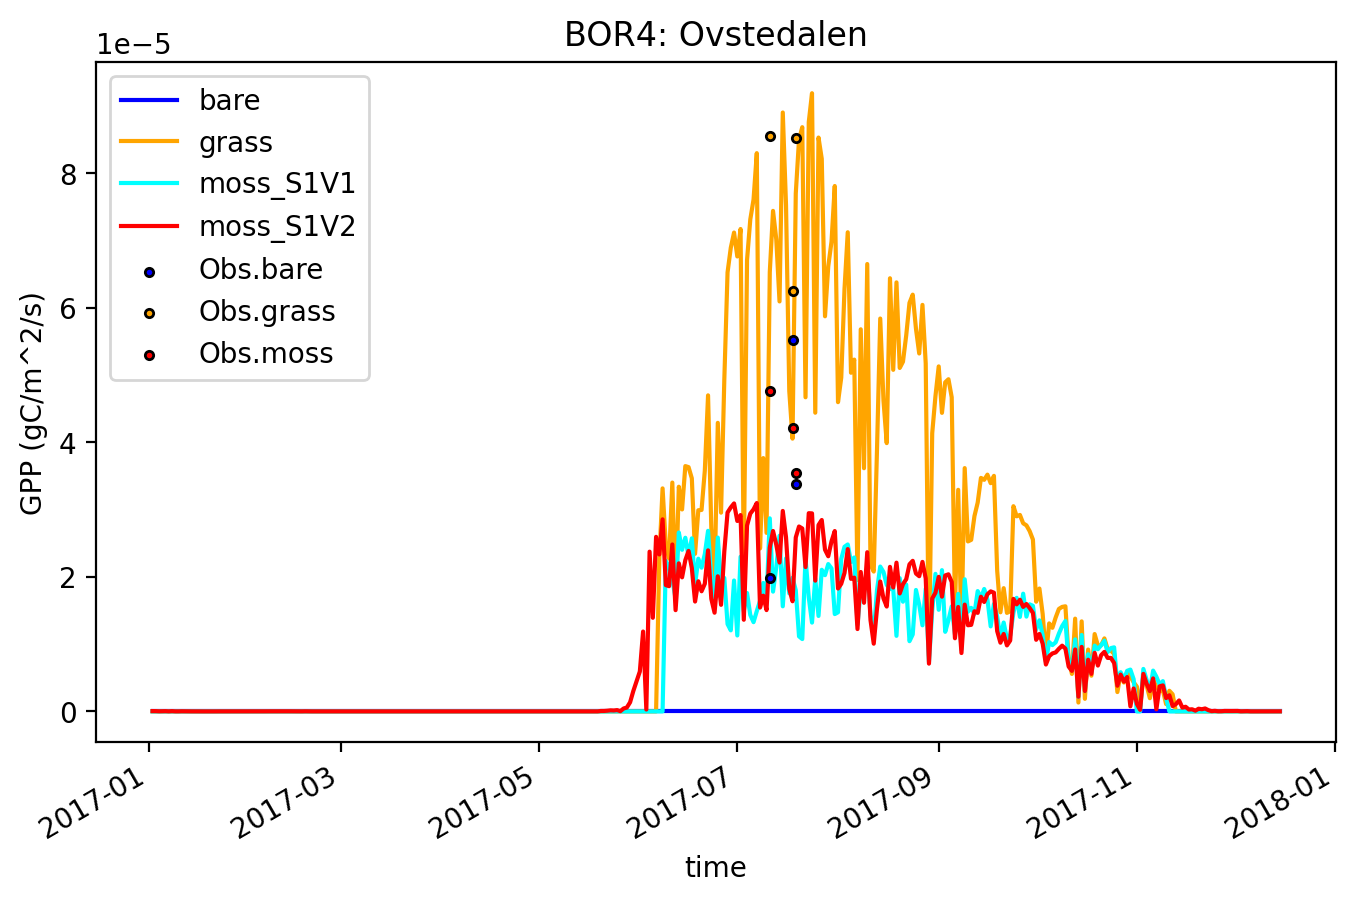

In [35]:


# Model output and comparison with observation, 2017

# Model output
i=11

dbare = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_bare_1.1.4.clm2.h2.2015-2017.nc',decode_times=True)
dgrass = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_grass_1.1.4.clm2.h2.2015-2017.nc',decode_times=True)
dmoss_S1 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S1.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S2 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S2.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S3 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S3.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S1V1 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_1.1.4_S1V1.clm2.h2.2015-2017.nc',decode_times=True)
dmoss_S1V2 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_1.1.4_S1V2.clm2.h2.2015-2017.nc',decode_times=True)


#output comparison
#variables: "soiltemperature": 3-5 cm soil depth, hourly output
#           "soilmoisture": soilmoisture, daily output
#           "PAR" "gpp" "nee" "Reco":

sites=["ALP1","ALP2","ALP3","ALP4","SUB1","SUB2","SUB3","SUB4","BOR1","BOR2","BOR3","BOR4"]
siteID1=["Ulvehaugen","Lavisdalen","Gudmedalen","Skjelingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"] 
#siteID2=["Ulvhaugen","Lavisdalen","Gudmedalen","Skjellingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"]
siteID3=["ULV","LAV","GUD","SKJ","ALR","HOG","RAM","VES","FAU","VIK","ARH","OVS"]


blockID=[['Ulv1','Ulv2','Ulv3','Ulv4'],
         ['Lav1','Lav2','Lav3','Lav4'],
         ['Gud12','Gud13','Gud15','Gud5'], #12 13 15 5
         ['Skj1','Skj2','Skj3','Skj4'],
         ['Alr1','Alr2','Alr3','Alr5'], #1, 2,3,5
         ['Hog1','Hog2','Hog3','Hog4'],
         ['Ram4','Ram5','Ram6','Ram8'], #4 5 6 8
         ['Ves1','Ves2','Ves3','Ves4'],
         ['Fau1','Fau2','Fau4','Fau5'], #1 2 4 5
         ['Vik2','Vik3','Vik4','Vik5'], #2, 3,4,5
         ['Arh1','Arh2','Arh3','Arh4'],       
         ['Ovs1','Ovs2','Ovs3','Ovs4']] 


#siteID=siteID1[i]                                #"Ulvehaugen"
#blockID=['Ovs1','Ovs2','Ovs3']                #"Ulv2"  isin(['Mangos', 'Grapes'])
treatment1="FGB" # Bareground
treatment2="GF"  # Moss only
treatment3="B"   # GRASS (Graminoid and Forbs) only

soil_temp_bare=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment1)
                             & (soil_temp["blockID"].isin(blockID[i]))]
soil_temp_moss=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment2)
                             & (soil_temp["blockID"].isin(blockID[i]))]
soil_temp_grass=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment3)
                             & (soil_temp["blockID"].isin(blockID[i]))]


soil_moist_bare=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment1)
                             & (soil_moist["blockID"].isin(blockID[i]))]
soil_moist_moss=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment2)
                             & (soil_moist["blockID"].isin(blockID[i]))]
soil_moist_grass=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment3)
                             & (soil_moist["blockID"].isin(blockID[i]))]

cflux_bare=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment1)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_moss=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment2)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_grass=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment3)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_control=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]=="C")
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_G=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]=="G")
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_F=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]=="F")
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_GB=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]=="GB")
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_FB=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]=="FB")
                             & (cflux["blockID"].isin(blockID[i]))]

# Carbon flux and comparison with observation
# Unit observation: µmol mol-1 s-1 gpp  (should be µmol m-2 s-1 )
# Unit model: gC/m^2/s

cflux_bare["date"]=pd.to_datetime(cflux_bare["date"])
cflux_moss["date"]=pd.to_datetime(cflux_moss["date"])
cflux_grass["date"]=pd.to_datetime(cflux_grass["date"])

cflux_bare_rs=cflux_bare.resample('D', on="date").mean()*(-12)/1000000
cflux_moss_rs=cflux_moss.resample('D', on="date").mean()*(-12)/1000000
cflux_grass_rs=cflux_grass.resample('D', on="date").mean()*(-12)/1000000

plt.figure(figsize=(8,5), dpi=200)

plt.scatter(cflux_bare_rs.loc['2017-6-1':'2017-8-31'].index,
         cflux_bare_rs.loc['2017-6-1':'2017-8-31']['gpp'],label='Obs.bare', marker=".",color='blue', edgecolors='black', zorder=2)
plt.scatter(cflux_grass_rs.loc['2017-6-1':'2017-8-31'].index,
         cflux_grass_rs.loc['2017-6-1':'2017-8-31']['gpp'],label='Obs.grass',marker=".", color='orange',edgecolors='black', zorder=2)
plt.scatter(cflux_moss_rs.loc['2017-6-1':'2017-8-31'].index,
         cflux_moss_rs.loc['2017-6-1':'2017-8-31']['gpp'],label='Obs.moss',marker=".", color='red', edgecolors='black', zorder=2)

mask1=732
mask2=1080
mask3=850
mask4=950

plt.plot(dbare.indexes['time'][mask1:mask2],dbare['GPP'][mask1:mask2,0].data,label='bare', color='blue',zorder=1)
plt.plot(dgrass.indexes['time'][mask1:mask2],dgrass['GPP'][mask1:mask2,0].data,label='grass', color='orange',zorder=1)
#plt.plot(dmoss_S1.indexes['time'].to_datetimeindex(),dmoss_S1['GPP'][:,0].data,label='moss_S1', color='purple')
#plt.plot(dmoss_S2.indexes['time'].to_datetimeindex(),dmoss_S2['GPP'][:,0].data,label='moss_S2', color='yellow')
#plt.plot(dmoss_S3.indexes['time'].to_datetimeindex(),dmoss_S3['GPP'][:,0].data,label='moss_S3', color='green')
plt.plot(dmoss_S1V1.indexes['time'][mask1:mask2],dmoss_S1V1['GPP'][mask1:mask2,0].data,label='moss_S1V1', color='cyan',zorder=1)
plt.plot(dmoss_S1V2.indexes['time'][mask1:mask2],dmoss_S1V2['GPP'][mask1:mask2,0].data,label='moss_S1V2', color='red',zorder=1)

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("GPP (gC/m^2/s)")
plt.title(sites[i]+": "+siteID1[i])
plt.legend(loc='upper left')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_gpp_daily_2017.png", dpi=200)
plt.show()

<ipython-input-15-b18b6d8ce32a>:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cflux_bare["starttime"]=pd.to_datetime(cflux_bare["starttime"])
<ipython-input-15-b18b6d8ce32a>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cflux_moss["starttime"]=pd.to_datetime(cflux_moss["starttime"])
<ipython-input-15-b18b6d8ce32a>:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

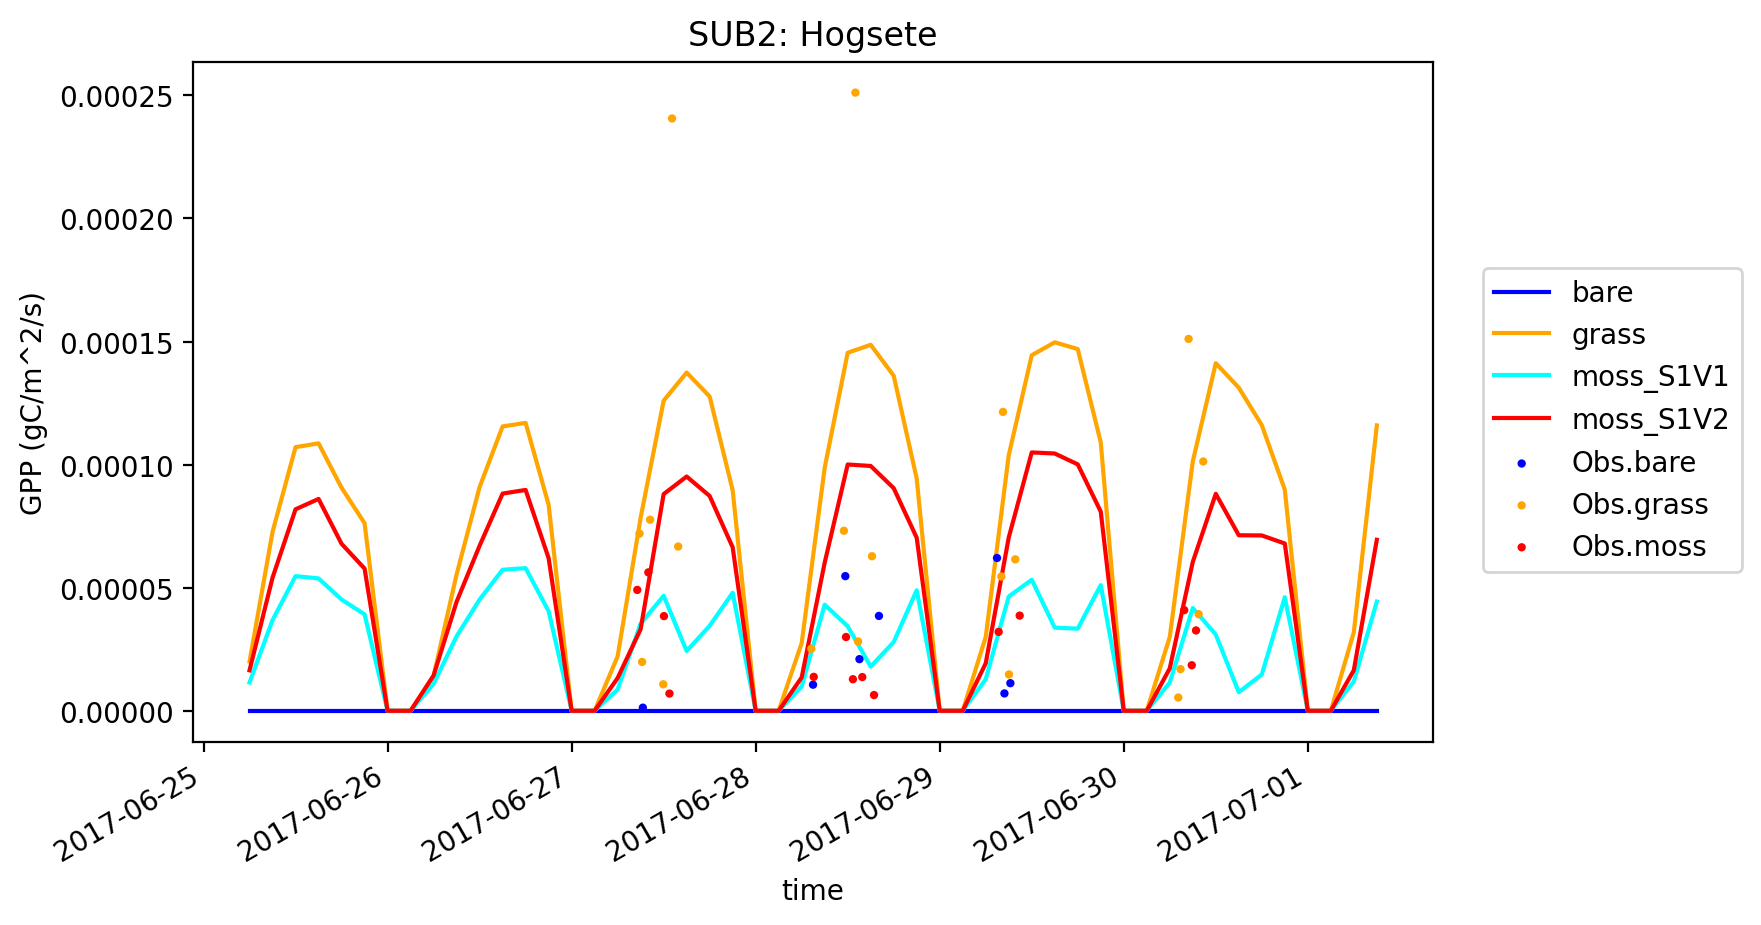

In [15]:
# Model output and comparison with observation, 2017 hourly

# Model output
i=5

#output comparison
#variables: "soiltemperature": 3-5 cm soil depth, hourly output
#           "soilmoisture": soilmoisture, daily output
#           "PAR" "gpp" "nee" "Reco":

sites=["ALP1","ALP2","ALP3","ALP4","SUB1","SUB2","SUB3","SUB4","BOR1","BOR2","BOR3","BOR4"]
siteID1=["Ulvehaugen","Lavisdalen","Gudmedalen","Skjelingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"] 
#siteID2=["Ulvhaugen","Lavisdalen","Gudmedalen","Skjellingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"]
siteID3=["ULV","LAV","GUD","SKJ","ALR","HOG","RAM","VES","FAU","VIK","ARH","OVS"]


blockID=[['Ulv1','Ulv2','Ulv3','Ulv4'],
         ['Lav1','Lav2','Lav3','Lav4'],
         ['Gud12','Gud13','Gud15','Gud5'], #12 13 15 5
         ['Skj1','Skj2','Skj3','Skj4'],
         ['Alr1','Alr2','Alr3','Alr5'], #1, 2,3,5
         ['Hog1','Hog2','Hog3','Hog4'],
         ['Ram4','Ram5','Ram6','Ram8'], #4 5 6 8
         ['Ves1','Ves2','Ves3','Ves4'],
         ['Fau1','Fau2','Fau4','Fau5'], #1 2 4 5
         ['Vik2','Vik3','Vik4','Vik5'], #2, 3,4,5
         ['Arh1','Arh2','Arh3','Arh4'],       
         ['Ovs1','Ovs2','Ovs3','Ovs4']] 


#siteID=siteID1[i]                                #"Ulvehaugen"
#blockID=['Ovs1','Ovs2','Ovs3']                #"Ulv2"  isin(['Mangos', 'Grapes'])
treatment1="FGB" # Bareground
treatment2="GF"  # Moss only
treatment3="B"   # GRASS (Graminoid and Forbs) only

dbare = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_bare_1.1.4.clm2.h1.2015-2017.nc',decode_times=True)
dgrass = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_grass_1.1.4.clm2.h1.2015-2017.nc',decode_times=True)
dmoss_S1 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S1.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S2 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S2.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S3 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S3.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S1V1 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_2.1.0_S3V1.clm2.h1.2015-2017.nc',decode_times=True)
dmoss_S1V2 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_2.1.0_S3V2.clm2.h1.2015-2017.nc',decode_times=True)




soil_temp_bare=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment1)
                             & (soil_temp["blockID"].isin(blockID[i]))]
soil_temp_moss=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment2)
                             & (soil_temp["blockID"].isin(blockID[i]))]
soil_temp_grass=soil_temp[(soil_temp["siteID"]==siteID1[i]) & (soil_temp["treatment"]==treatment3)
                             & (soil_temp["blockID"].isin(blockID[i]))]


soil_moist_bare=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment1)
                             & (soil_moist["blockID"].isin(blockID[i]))]
soil_moist_moss=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment2)
                             & (soil_moist["blockID"].isin(blockID[i]))]
soil_moist_grass=soil_moist[(soil_moist["siteID"]==siteID1[i]) & (soil_moist["treatment"]==treatment3)
                             & (soil_moist["blockID"].isin(blockID[i]))]

cflux_bare=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment1)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_moss=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment2)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_grass=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment3)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_control=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]=="C")
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_G=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]=="G")
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_F=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]=="F")
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_GB=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]=="GB")
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_FB=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]=="FB")
                             & (cflux["blockID"].isin(blockID[i]))]

# Carbon flux and comparison with observation
# Unit observation: µmol mol-1 s-1 gpp  (should be µmol m-2 s-1 )
# Unit model: gC/m^2/s

cflux_bare["starttime"]=pd.to_datetime(cflux_bare["starttime"])
cflux_moss["starttime"]=pd.to_datetime(cflux_moss["starttime"])
cflux_grass["starttime"]=pd.to_datetime(cflux_grass["starttime"])
cflux_bare.index=cflux_bare["starttime"]
cflux_moss.index=cflux_moss["starttime"]
cflux_grass.index=cflux_grass["starttime"]



#cflux_bare_rs=cflux_bare.resample('D', on="date").mean()*(-12)/1000000
#cflux_moss_rs=cflux_moss.resample('D', on="date").mean()*(-12)/1000000
#cflux_grass_rs=cflux_grass.resample('D', on="date").mean()*(-12)/1000000

plt.figure(figsize=(8,5), dpi=200)

plt.scatter(cflux_bare.loc['2017-6-1':'2017-8-31'].index,
         cflux_bare.loc['2017-6-1':'2017-8-31']['gpp']*(-12)/1000000,label='Obs.bare', marker=".",color='blue', edgecolors='none', zorder=2)
plt.scatter(cflux_grass.loc['2017-6-1':'2017-8-31'].index,
         cflux_grass.loc['2017-6-1':'2017-8-31']['gpp']*(-12)/1000000,label='Obs.grass',marker=".", color='orange',edgecolors='none', zorder=2)
plt.scatter(cflux_moss.loc['2017-6-1':'2017-8-31'].index,
         cflux_moss.loc['2017-6-1':'2017-8-31']['gpp']*(-12)/1000000,label='Obs.moss',marker=".", color='red', edgecolors='none', zorder=2)

#ALP1
mask1=7490
mask2=7560
#mask3=850
#mask4=950

#ALP2
mask1=7450
mask2=7520
#mask3=850
#mask4=950

#ALP4
mask1=7470
mask2=7540

#SUB1
mask1=7300
mask2=7340

#SUB2
mask1=7250
mask2=7300

#SUB4
mask1=7370
mask2=7410

#BOR1
mask1=7320
mask2=7350

#BOR2
mask1=7250
mask2=7300

#BOR4
mask1=7375
mask2=7450

mask1=7250
mask2=7300

plt.plot(dbare.indexes['time'][mask1:mask2],dbare['GPP'][mask1:mask2,0].data,label='bare', color='blue',zorder=1)
plt.plot(dgrass.indexes['time'][mask1:mask2],dgrass['GPP'][mask1:mask2,0].data,label='grass', color='orange',zorder=1)
#plt.plot(dmoss_S1.indexes['time'].to_datetimeindex(),dmoss_S1['GPP'][:,0].data,label='moss_S1', color='purple')
#plt.plot(dmoss_S2.indexes['time'].to_datetimeindex(),dmoss_S2['GPP'][:,0].data,label='moss_S2', color='yellow')
#plt.plot(dmoss_S3.indexes['time'].to_datetimeindex(),dmoss_S3['GPP'][:,0].data,label='moss_S3', color='green')
plt.plot(dmoss_S1V1.indexes['time'][mask1:mask2],dmoss_S1V1['GPP'][mask1:mask2,0].data,label='moss_S1V1', color='cyan',zorder=1)
plt.plot(dmoss_S1V2.indexes['time'][mask1:mask2],dmoss_S1V2['GPP'][mask1:mask2,0].data,label='moss_S1V2', color='red',zorder=1)

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("GPP (gC/m^2/s)")
plt.title(sites[i]+": "+siteID1[i])
plt.legend(loc=(1.04,0.25))
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_gpp_diurnal_2017.png", dpi=200)
plt.show()

In [61]:
cflux_moss.loc['2017-6-1':'2017-8-31']
#dmoss_S1V1.indexes['time'][mask1:mask2]

year        date   siteID blockID  plotID  \
starttime                                                              
2017-06-27 10:00:15+00:00  2017  2017-06-27  Hogsete    Hog1  Hog1GF   
2017-06-29 10:25:45+00:00  2017  2017-06-29  Hogsete    Hog1  Hog1GF   
2017-06-28 13:54:05+00:00  2017  2017-06-28  Hogsete    Hog2  Hog2GF   
2017-06-30 09:25:25+00:00  2017  2017-06-30  Hogsete    Hog2  Hog2GF   
2017-06-27 12:02:30+00:00  2017  2017-06-27  Hogsete    Hog3  Hog3GF   
2017-06-28 07:34:20+00:00  2017  2017-06-28  Hogsete    Hog3  Hog3GF   
2017-06-28 11:47:00+00:00  2017  2017-06-28  Hogsete    Hog3  Hog3GF   
2017-06-28 15:26:15+00:00  2017  2017-06-28  Hogsete    Hog3  Hog3GF   
2017-06-30 07:53:10+00:00  2017  2017-06-30  Hogsete    Hog3  Hog3GF   
2017-06-27 08:33:35+00:00  2017  2017-06-27  Hogsete    Hog4  Hog4GF   
2017-06-27 12:45:25+00:00  2017  2017-06-27  Hogsete    Hog4  Hog4GF   
2017-06-28 12:40:50+00:00  2017  2017-06-28  Hogsete    Hog4  Hog4GF   
2017-06-29 07:41:05+00:00  2017  2017-06-29  Hogsete    Hog4  Hog4GF   
2017-06-30 08:52:10+00:00  2017  2017-06-30  Hogsete    Hog4  Hog4GF   

                          treatment                 starttime  \
starttime                                                       
2017-06-27 10:00:15+00:00        GF 2017-06-27 10:00:15+00:00   
2017-06-29 10:25:45+00:00        GF 2017-06-29 10:25:45+00:00   
2017-06-28 13:54:05+00:00        GF 2017-06-28 13:54:05+00:00   
2017-06-30 09:25:25+00:00        GF 2017-06-30 09:25:25+00:00   
2017-06-27 12:02:30+00:00        GF 2017-06-27 12:02:30+00:00   
2017-06-28 07:34:20+00:00        GF 2017-06-28 07:34:20+00:00   
2017-06-28 11:47:00+00:00        GF 2017-06-28 11:47:00+00:00   
2017-06-28 15:26:15+00:00        GF 2017-06-28 15:26:15+00:00   
2017-06-30 07:53:10+00:00        GF 2017-06-30 07:53:10+00:00   
2017-06-27 08:33:35+00:00        GF 2017-06-27 08:33:35+00:00   
2017-06-27 12:45:25+00:00        GF 2017-06-27 12:45:25+00:00   
2017-06-28 12:40:50+00:00        GF 2017-06-28 12:40:50+00:00   
2017-06-29 07:41:05+00:00        GF 2017-06-29 07:41:05+00:00   
2017-06-30 08:52:10+00:00        GF 2017-06-30 08:52:10+00:00   

                                       stoptime  time          PAR  ...  \
starttime                                                           ...   
2017-06-27 10:00:15+00:00  2017-06-27T10:02:15Z   120   362.343976  ...   
2017-06-29 10:25:45+00:00  2017-06-29T10:27:45Z   120   462.904400  ...   
2017-06-28 13:54:05+00:00  2017-06-28T13:56:05Z   120  1400.312000  ...   
2017-06-30 09:25:25+00:00  2017-06-30T09:27:35Z   130   592.811874  ...   
2017-06-27 12:02:30+00:00  2017-06-27T12:04:30Z   120  1282.880429  ...   
2017-06-28 07:34:20+00:00  2017-06-28T07:36:00Z   100   316.229048  ...   
2017-06-28 11:47:00+00:00  2017-06-28T11:49:00Z   120   780.907960  ...   
2017-06-28 15:26:15+00:00  2017-06-28T15:28:15Z   120  1504.800000  ...   
2017-06-30 07:53:10+00:00  2017-06-30T07:55:10Z   120   724.480800  ...   
2017-06-27 08:33:35+00:00  2017-06-27T08:35:35Z   120   934.422800  ...   
2017-06-27 12:45:25+00:00  2017-06-27T12:47:05Z   100  1373.646314  ...   
2017-06-28 12:40:50+00:00  2017-06-28T12:42:50Z   120   645.491036  ...   
2017-06-29 07:41:05+00:00  2017-06-29T07:42:45Z   100   467.865238  ...   
2017-06-30 08:52:10+00:00  2017-06-30T08:54:10Z   120   803.966132  ...   

                           chamber_Reco  removal_Reco  weather_Reco  \
starttime                                                             
2017-06-27 10:00:15+00:00             1          post         Sunny   
2017-06-29 10:25:45+00:00             1          post      overcast   
2017-06-28 13:54:05+00:00             1          post         Sunny   
2017-06-30 09:25:25+00:00             1          post         Sunny   
2017-06-27 12:02:30+00:00             1          post         Sunny   
2017-06-28 07:34:20+00:00             1          post         Sunny   
2017-06-28 11:47:00+00:00             1          post         Su

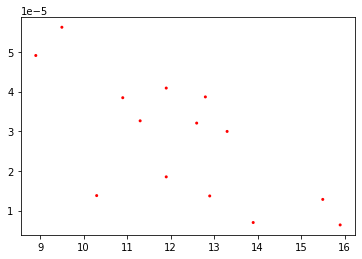

In [17]:
mask1=7272
mask2=7281
#plt.plot(dmoss_S1V1.indexes['time'][mask1:mask2],dmoss_S1V1['GPP'][mask1:mask2,0].data,label='moss_S1V1', color='cyan',zorder=1)
#plt.scatter(cflux_moss.loc['2017-6-1':'2017-8-30']['tempK'], cflux_moss.loc['2017-6-1':'2017-8-30']['gpp']*(-12)/1000000,label='Obs.moss',marker=".", color='red', edgecolors='none', zorder=2)
plt.scatter(cflux_moss.loc['2017-6-1':'2017-8-30']['soiltemp'], cflux_moss.loc['2017-6-1':'2017-8-30']['gpp']*(-12)/1000000,label='Obs.moss',marker=".", color='red', edgecolors='none', zorder=2)
#plt.scatter(cflux_moss.loc['2017-6-1':'2017-8-30']['soilmoisture'], cflux_moss.loc['2017-6-1':'2017-8-30']['gpp']*(-12)/1000000,label='Obs.moss',marker=".", color='red', edgecolors='none', zorder=2)

#plt.scatter(cflux_moss.loc['2017-6-1':'2017-8-30']['PAR'], cflux_moss.loc['2017-6-1':'2017-8-30']['gpp']*(-12)/1000000,label='Obs.moss',marker=".", color='red', edgecolors='none', zorder=2)

In [11]:
cflux_moss=cflux[cflux["treatment"]==treatment2]

cflux_moss["starttime"]=pd.to_datetime(cflux_moss["starttime"])
cflux_moss.index=cflux_moss["starttime"]

#plt.scatter(cflux_grass.loc['2017-6-1':'2017-8-30']['tempK'], cflux_grass.loc['2017-6-1':'2017-8-30']['gpp']*(-12)/1000000,label='Obs.moss',marker=".", color='red', edgecolors='none', zorder=2)
#plt.scatter(cflux_moss.loc['2017-6-1':'2017-8-30']['soiltemp'], cflux_moss.loc['2017-6-1':'2017-8-30']['gpp']*(-12)/1000000,label='Obs.moss',marker=".", color='red', edgecolors='none', zorder=2)
#plt.scatter(cflux_moss.loc['2017-6-1':'2017-8-30']['soilmoisture'], cflux_moss.loc['2017-6-1':'2017-8-30']['gpp']*(-12)/1000000,label='Obs.moss',marker=".", color='red', edgecolors='none', zorder=2)

#plt.scatter(cflux_moss.loc['2017-6-1':'2017-8-30']['PAR'], cflux_moss.loc['2017-6-1':'2017-8-30']['gpp']*(-12)/1000000,label='Obs.moss',marker=".", color='red', edgecolors='none', zorder=2)

<ipython-input-11-e0b15d2f7006>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cflux_moss["starttime"]=pd.to_datetime(cflux_moss["starttime"])


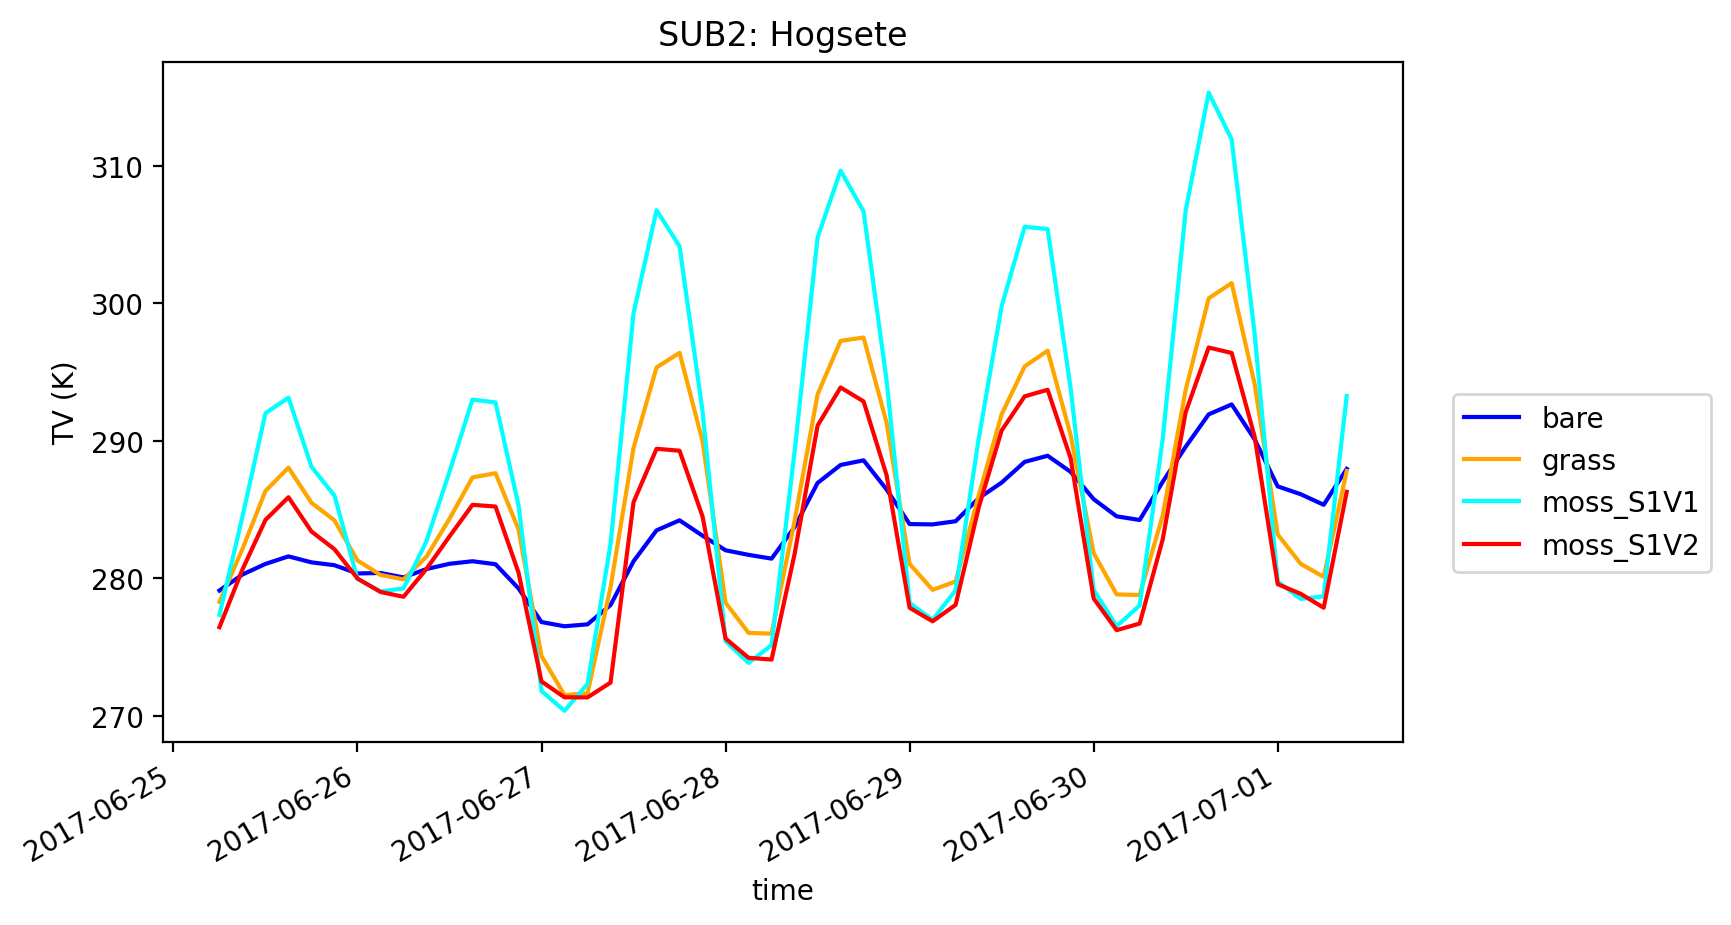

In [16]:
mask1=7250
mask2=7300

plt.figure(figsize=(8,5), dpi=200)

plt.plot(dbare.indexes['time'][mask1:mask2],dbare['TV'][mask1:mask2,0].data,label='bare', color='blue',zorder=1)
plt.plot(dgrass.indexes['time'][mask1:mask2],dgrass['TV'][mask1:mask2,0].data,label='grass', color='orange',zorder=1)
#plt.plot(dmoss_S1.indexes['time'].to_datetimeindex(),dmoss_S1['GPP'][:,0].data,label='moss_S1', color='purple')
#plt.plot(dmoss_S2.indexes['time'].to_datetimeindex(),dmoss_S2['GPP'][:,0].data,label='moss_S2', color='yellow')
#plt.plot(dmoss_S3.indexes['time'].to_datetimeindex(),dmoss_S3['GPP'][:,0].data,label='moss_S3', color='green')
plt.plot(dmoss_S1V1.indexes['time'][mask1:mask2],dmoss_S1V1['TV'][mask1:mask2,0].data,label='moss_S1V1', color='cyan',zorder=1)
plt.plot(dmoss_S1V2.indexes['time'][mask1:mask2],dmoss_S1V2['TV'][mask1:mask2,0].data,label='moss_S1V2', color='red',zorder=1)

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("TV (K)")
plt.title(sites[i]+": "+siteID1[i])
plt.legend(loc=(1.04,0.25))
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_TV_diurnal_2017.png", dpi=200)
plt.show()

In [99]:
i=0

cflux_bare=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment1)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_moss=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment2)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_grass=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment3)
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_control=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]=="C")
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_G=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]=="G")
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_F=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]=="F")
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_GB=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]=="GB")
                             & (cflux["blockID"].isin(blockID[i]))]
cflux_FB=cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]=="FB")
                             & (cflux["blockID"].isin(blockID[i]))]


print(cflux_bare["gpp"].mean())
print(cflux_moss["gpp"].mean())
print(cflux_grass["gpp"].mean())
print(cflux_control["gpp"].mean())
print(cflux_G["gpp"].mean())
print(cflux_F["gpp"].mean())
print(cflux_GB["gpp"].mean())
print(cflux_FB["gpp"].mean())

-4.470295162015646
-5.338107621260296
-6.511025457303586
-7.83286098573699
-7.777537846062742
-4.48313255980411
-6.421009525686092
-7.205332210756855


In [103]:
cflux_bare

year        date      siteID blockID   plotID treatment  \
2745  2015  2015-07-17  Ulvehaugen    Ulv1  Ulv1FGB       FGB   
2746  2015  2015-07-31  Ulvehaugen    Ulv1  Ulv1FGB       FGB   
2747  2015  2015-07-31  Ulvehaugen    Ulv1  Ulv1FGB       FGB   
2748  2017  2017-07-25  Ulvehaugen    Ulv1  Ulv1FGB       FGB   
2749  2017  2017-08-01  Ulvehaugen    Ulv1  Ulv1FGB       FGB   
2750  2017  2017-07-25  Ulvehaugen    Ulv1  Ulv1FGB       FGB   
2830  2015  2015-07-17  Ulvehaugen    Ulv2  Ulv2FGB       FGB   
2831  2015  2015-07-17  Ulvehaugen    Ulv2  Ulv2FGB       FGB   
2832  2015  2015-07-31  Ulvehaugen    Ulv2  Ulv2FGB       FGB   
2833  2015  2015-07-31  Ulvehaugen    Ulv2  Ulv2FGB       FGB   
2834  2017  2017-07-25  Ulvehaugen    Ulv2  Ulv2FGB       FGB   
2835  2017  2017-07-25  Ulvehaugen    Ulv2  Ulv2FGB       FGB   
2905  2015  2015-07-17  Ulvehaugen    Ulv3  Ulv3FGB       FGB   
2906  2015  2015-07-31  Ulvehaugen    Ulv3  Ulv3FGB       FGB   
2907  2015  2015-07-31  Ulvehaugen    Ulv3  Ulv3FGB       FGB   
2908  2017  2017-07-25  Ulvehaugen    Ulv3  Ulv3FGB       FGB   
2909  2017  2017-08-01  Ulvehaugen    Ulv3  Ulv3FGB       FGB   
2910  2017  2017-07-25  Ulvehaugen    Ulv3  Ulv3FGB       FGB   
2981  2015  2015-07-17  Ulvehaugen    Ulv4  Ulv4FGB       FGB   
2982  2015  2015-07-31  Ulvehaugen    Ulv4  Ulv4FGB       FGB   
2983  2017  2017-07-25  Ulvehaugen    Ulv4  Ulv4FGB       FGB   
2984  2017  2017-08-01  Ulvehaugen    Ulv4  Ulv4FGB       FGB   
2985  2017  2017-07-25  Ulvehaugen    Ulv4  Ulv4FGB       FGB   

                 starttime              stoptime  time          PAR  ...  \
2745  2015-07-17T09:28:30Z  2015-07-17T09:30:00Z    90  1018.047368  ...   
2746  2015-07-31T11:05:55Z  2015-07-31T11:07:25Z    90  1179.082632  ...   
2747  2015-07-31T13:50:30Z  2015-07-31T13:52:10Z   100  1994.766667  ...   
2748  2017-07-25T09:45:30Z  2017-07-25T09:46:50Z    80   589.637647  ...   
2749  2017-08-01T14:17:10Z  2017-08-01T14:19:10Z   120   684.455600  ...   
2750  2017-07-25T13:52:00Z  2017-07-25T13:53:00Z    60   556.711475  ...   
2830  2015-07-17T08:42:30Z  2015-07-17T08:44:00Z    90   147.885263  ...   
2831  2015-07-17T12:16:30Z  2015-07-17T12:18:00Z    90  1481.115789  ...   
2832  2015-07-31T10:09:00Z  2015-07-31T10:10:30Z    90   512.872632  ...   
2833  2015-07-31T13:38:00Z  2015-07-31T13:39:30Z    90  1164.575789  ...   
2834  2017-07-25T10:26:50Z  2017-07-25T10:28:30Z   100  1141.709524  ...   
2835  2017-07-25T11:37:40Z  2017-07-25T11:39:20Z   100   441.702970  ...   
2905  2015-07-17T11:18:00Z  2015-07-17T11:19:10Z    70  1776.160000  ...   
2906  2015-07-31T09:22:30Z  2015-07-31T09:24:00Z    90   984.482632  ...   
2907  2015-07-31T12:41:00Z  2015-07-31T12:42:20Z    80  2204.547059  ...   
2908  2017-07-25T14:26:55Z  2017-07-25T14:28:55Z   120   508.774400  ...   
2909  2017-08-01T10:12:05Z  2017-08-01T10:13:45Z    95   896.894000  ...   
2910  2017-07-25T10:26:50Z  2017-07-25T10:28:25Z    95  1554.360417  ...   
2981  2015-07-17T09:56:55Z  2015-07-17T09:57:55Z    60  1452.338462  ...   
2982  2015-07-31T14:30:05Z  2015-07-31T14:31:35Z    90  1836.136842  ...   
2983  2017-07-25T11:15:50Z  2017-07-25T11:17:50Z   120  1727.172000  ...   
2984  2017-08-01T09:18:55Z  2017-08-01T09:20:15Z    80  1252.605882  ...   
2985  2017-07-25T09:30:11Z  2017-07-25T09:31:20Z    69   666.040000  ...   

      chamber_Reco  removal_Reco  weather_Reco  flag_Reco  comment_Reco  \
2745             1           pre           NaN        pre           NaN   
2746             1           pre           NaN        pre           NaN   
2747             1           pre           NaN        pre           NaN   
2748             1          post        Cloudy        NaN           NaN   
2749             1          post         Windy        NaN           NaN   
2750             1          post        Cloudy        NaN           NaN   
2830             1           pre           NaN        pre           NaN   
2831             1  

In [ ]:
cflux[(cflux["siteID"]==siteID1[i]) & (cflux["treatment"]==treatment1)
                             & (cflux["blockID"].isin(blockID[i]))]

In [ ]:
# This is a different way to read the model data

year=['2015','2016']
fmoss_S1V1=[]
fmoss_S1V2=[]
fmoss_S1=[]
fmoss_S2=[]
fmoss_S3=[]
fgrass=[]
fmoss=[]

for j in range(0,2):
    fmoss_S1V1=fmoss_S1V1+sorted(glob.glob('/home/huitang/saga/proj/mosslichen/model/'+sites[i]+'_moss_1.0.0_S1V1/lnd/hist/'+sites[i]+'_moss_1.0.0.clm2.h2.'+year[j]+'*.nc'))
    fmoss_S1V2=fmoss_S1V2+sorted(glob.glob('/home/huitang/saga/proj/mosslichen/model/'+sites[i]+'_moss_1.0.0_S1V2/lnd/hist/'+sites[i]+'_moss_1.0.0.clm2.h2.'+year[j]+'*.nc'))
    fmoss_S1=fmoss_S1+sorted(glob.glob('/home/huitang/saga/proj/mosslichen/model/'+sites[i]+'_moss_soil_1.0.0_S1/lnd/hist/'+sites[i]+'_moss_soil_1.0.0.clm2.h2.'+year[j]+'*.nc'))
    fmoss_S2=fmoss_S2+sorted(glob.glob('/home/huitang/saga/proj/mosslichen/model/'+sites[i]+'_moss_soil_1.0.0_S2/lnd/hist/'+sites[i]+'_moss_soil_1.0.0.clm2.h2.'+year[j]+'*.nc'))
    fmoss_S3=fmoss_S3+sorted(glob.glob('/home/huitang/saga/proj/mosslichen/model/'+sites[i]+'_moss_soil_1.0.0_S3/lnd/hist/'+sites[i]+'_moss_soil_1.0.0.clm2.h2.'+year[j]+'*.nc'))
    fgrass=fgrass+sorted(glob.glob('/home/huitang/saga/proj/mosslichen/model/'+sites[i]+'_grass_1.0.0/lnd/hist/'+sites[i]+'_grass_1.0.0.clm2.h2.'+year[j]+'*.nc'))
    fbare=fbare+sorted(glob.glob('/home/huitang/saga/proj/mosslichen/model/'+sites[i]+'_bare_1.0.0/lnd/hist/'+sites[i]+'_bare_1.0.0.clm2.h2.'+year[j]+'*.nc'))
    
# concentration comparison
dmoss_S1V1=xr.open_mfdataset(fmoss_S1V1,concat_dim='time',combine='nested',decode_times=True)
dmoss_S1V2=xr.open_mfdataset(fmoss_S1V2,concat_dim='time',combine='nested',decode_times=True)
dmoss_S1=xr.open_mfdataset(fmoss_S1,concat_dim='time',combine='nested',decode_times=True)
dmoss_S2=xr.open_mfdataset(fmoss_S2,concat_dim='time',combine='nested',decode_times=True)
dmoss_S3=xr.open_mfdataset(fmoss_S3,concat_dim='time',combine='nested',decode_times=True)
dgrass=xr.open_mfdataset(fgrass,concat_dim='time',combine='nested',decode_times=True)
dbare=xr.open_mfdataset(fbare,concat_dim='time',combine='nested',decode_times=True)
dbare['TSOI'].time

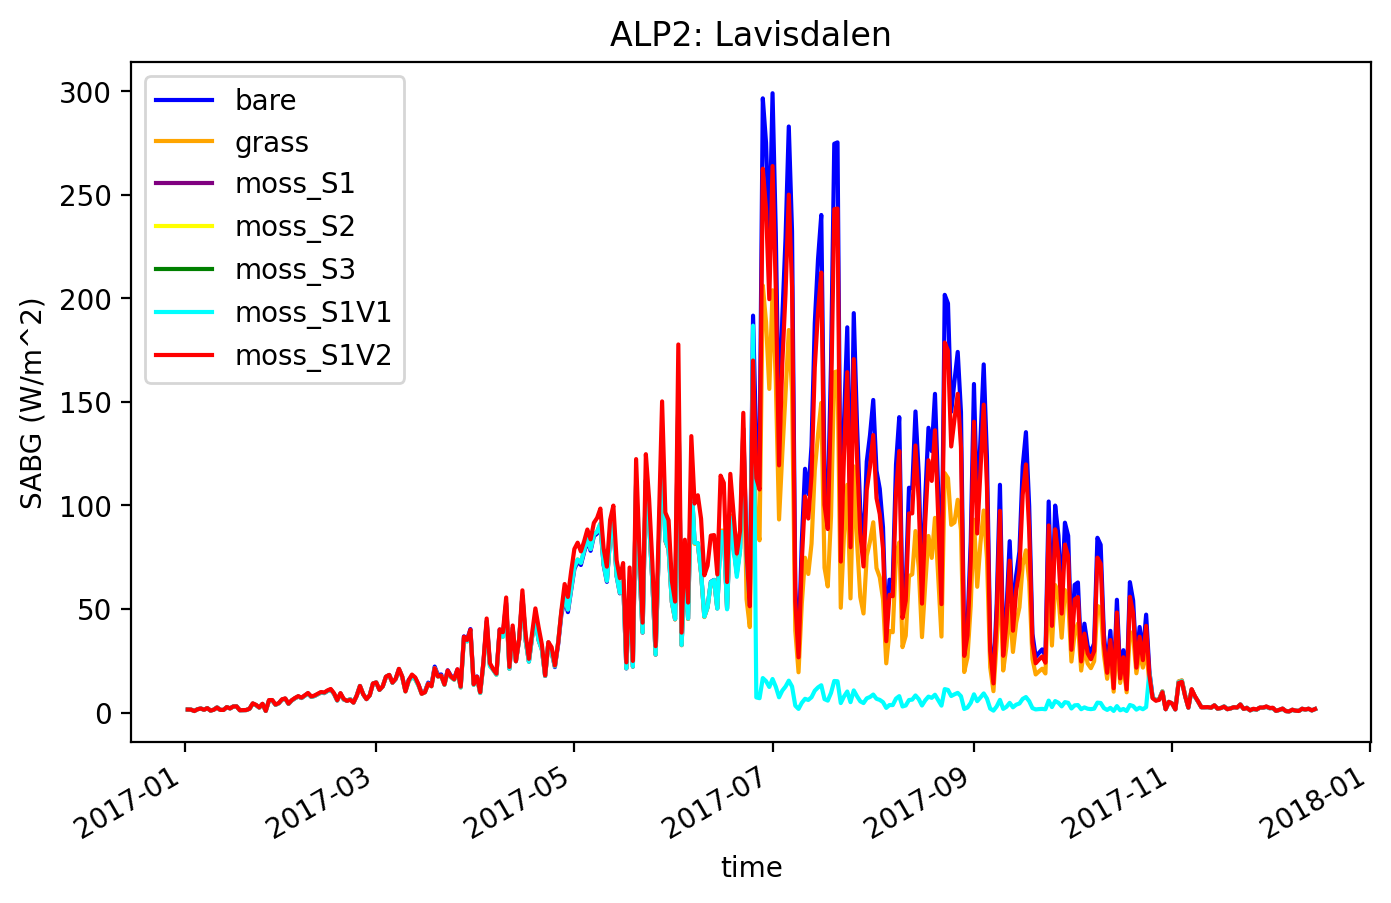

In [3]:
# Model output and comparison with observation, 2017

# Model output
i=1

dbare = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_bare_1.1.4.clm2.h2.2015-2017.nc',decode_times=True)
dgrass = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_grass_1.1.4.clm2.h2.2015-2017.nc',decode_times=True)
dmoss_S1 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S1.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S2 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S2.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S3 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_soil_1.0.0_S3.clm2.h2.2015-2016.nc',decode_times=True)
dmoss_S1V1 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_1.1.3_S3V1.clm2.h2.2015-2017.nc',decode_times=True)
dmoss_S1V2 = xr.open_dataset('/home/huitang/saga/proj/mosslichen/model/Merged_results/'+sites[i]+'_moss_1.1.3_S3V2.clm2.h2.2015-2017.nc',decode_times=True)

#output comparison
#variables: "soiltemperature": 3-5 cm soil depth, hourly output
#           "soilmoisture": soilmoisture, daily output
#           "PAR" "gpp" "nee" "Reco":

sites=["ALP1","ALP2","ALP3","ALP4","SUB1","SUB2","SUB3","SUB4","BOR1","BOR2","BOR3","BOR4"]
siteID1=["Ulvehaugen","Lavisdalen","Gudmedalen","Skjelingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"] 
#siteID2=["Ulvhaugen","Lavisdalen","Gudmedalen","Skjellingahaugen","Alrust","Hogsete","Rambera","Veskre","Fauske","Vikesland","Arhelleren","Ovstedalen"]
siteID3=["ULV","LAV","GUD","SKJ","ALR","HOG","RAM","VES","FAU","VIK","ARH","OVS"]


blockID=[['Ulv1','Ulv2','Ulv3','Ulv4'],
         ['Lav1','Lav2','Lav3','Lav4'],
         ['Gud12','Gud13','Gud15','Gud5'], #12 13 15 5
         ['Skj1','Skj2','Skj3','Skj4'],
         ['Alr1','Alr2','Alr3','Alr5'], #1, 2,3,5
         ['Hog1','Hog2','Hog3','Hog4'],
         ['Ram4','Ram5','Ram6','Ram8'], #4 5 6 8
         ['Ves1','Ves2','Ves3','Ves4'],
         ['Fau1','Fau2','Fau4','Fau5'], #1 2 4 5
         ['Vik2','Vik3','Vik4','Vik5'], #2, 3,4,5
         ['Arh1','Arh2','Arh3','Arh4'],       
         ['Ovs1','Ovs2','Ovs3','Ovs4']] 



plt.figure(figsize=(8,5), dpi=200)

mask1=732
mask2=1080
mask3=850
mask4=950

plt.plot(dbare.indexes['time'][mask1:mask2],dbare['SABG'][mask1:mask2,0].data,label='bare', color='blue',zorder=1)
plt.plot(dgrass.indexes['time'][mask1:mask2],dgrass['SABG'][mask1:mask2,0].data,label='grass', color='orange',zorder=1)
plt.plot(dmoss_S1.indexes['time'][mask1:mask2],dmoss_S1['SABG'][mask1:mask2,0].data,label='moss_S1', color='purple')
plt.plot(dmoss_S2.indexes['time'][mask1:mask2],dmoss_S2['SABG'][mask1:mask2,0].data,label='moss_S2', color='yellow')
plt.plot(dmoss_S3.indexes['time'][mask1:mask2],dmoss_S3['SABG'][mask1:mask2,0].data,label='moss_S3', color='green')
plt.plot(dmoss_S1V1.indexes['time'][mask1:mask2],dmoss_S1V1['SABG'][mask1:mask2,0].data,label='moss_S1V1', color='cyan',zorder=1)
plt.plot(dmoss_S1V2.indexes['time'][mask1:mask2],dmoss_S1V2['SABG'][mask1:mask2,0].data,label='moss_S1V2', color='red',zorder=1)

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("SABG (W/m^2)")
plt.title(sites[i]+": "+siteID1[i])
plt.legend(loc='upper left')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_SABG_daily_2017.png", dpi=200)
plt.show()

In [28]:
dbare

<xarray.Dataset>
Dimensions:                  (fates_levage: 7, fates_levagefuel: 42, fates_levagepft: 7, fates_levcacls: 2, fates_levcan: 2, fates_levcapf: 2, fates_levcnlf: 60, fates_levcnlfpf: 60, fates_levcwdsc: 4, fates_levfuel: 6, fates_levheight: 6, fates_levpft: 1, fates_levscag: 91, fates_levscagpf: 91, fates_levscls: 13, fates_levscpf: 13, hist_interval: 2, levdcmp: 25, levgrnd: 25, levlak: 10, levsoi: 20, lndgrid: 1, time: 1096)
Coordinates:
  * levgrnd                  (levgrnd) float32 0.01 0.04 ... 28.870724 41.998436
  * levlak                   (levlak) float32 0.05 0.6 2.1 ... 34.325 44.775
  * levdcmp                  (levdcmp) float32 0.01 0.04 ... 28.870724 41.998436
  * fates_levscls            (fates_levscls) float32 0.0 5.0 10.0 ... 90.0 100.0
  * fates_levcacls           (fates_levcacls) float32 0.0 5.0
  * fates_levage             (fates_levage) float32 0.0 1.0 2.0 ... 20.0 50.0
  * fates_levheight          (fates_levheight) float32 0.0 0.1 0.3 1.0 3.0 10.0
  * fates_levpft             (fates_levpft) int32 1
  * fates_levfuel            (fates_levfuel) int32 1 2 3 4 5 6
  * fates_levcwdsc           (fates_levcwdsc) int32 1 2 3 4
  * fates_levcan             (fates_levcan) int32 1 2
  * time                     (time) datetime64[ns] 2015-01-01 ... 2017-12-31
Dimensions without coordinates: fates_levagefuel, fates_levagepft, fates_levcapf, fates_levcnlf, fates_levcnlfpf, fates_levscag, fates_levscagpf, fates_levscpf, hist_interval, levsoi, lndgrid
Data variables:
    fates_scmap_levscag      (fates_levscag) int32 ...
    fates_agmap_levscag      (fates_levscag) int32 ...
    fates_pftmap_levscpf     (fates_levscpf) int32 ...
    fates_scmap_levscpf      (fates_levscpf) int32 ...
    fates_pftmap_levcapf     (fates_levcapf) int32 ...
    fates_camap_levcapf      (fates_levcapf) int32 ...
    fates_canmap_levcnlf     (fates_levcnlf) int32 ...
    fates_lfmap_levcnlf      (fates_levcnlf) int32 ...
    fates_canmap_levcnlfpf   (fates_levcnlfpf) int32 ...
    fates_lfmap_levcnlfpf    (fates_levcnlfpf) int32 ...
    fates_pftmap_levcnlfpf   (fates_levcnlfpf) int32 ...
    fates_scmap_levscagpft   (fates_levscagpf) int32 ...
    fates_agmap_levscagpft   (fates_levscagpf) int32 ...
    fates_pftmap_levscagpft  (fates_levscagpf) int32 ...
    fates_pftmap_levagepft   (fates_levagepft) int32 ...
    fates_agmap_levagepft    (fates_levagepft) int32 ...
    fates_agmap_levagefuel   (fates_levagefuel) int32 ...
    fates_fscmap_levagefuel  (fates_levagefuel) int32 ...
    mcdate                   (time) int32 ...
    mcsec                    (time) int32 ...
    mdcur                    (time) int32 ...
    mscur                    (time) int32 ...
    nstep                    (time) int32 ...
    time_bounds              (time, hist_interval) datetime64[ns] ...
    date_written             (time) |S16 ...
    time_written             (time) |S16 ...
    lon                      (lndgrid) float32 ...
    lat                      (lndgrid) float32 ...
    area                     (lndgrid) float32 ...
    landfrac                 (lndgrid) float32 ...
    landmask                 (lndgrid) float64 ...
    pftmask                  (lndgrid) float64 ...
    nbedrock                 (lndgrid) float64 ...
    EFLX_LH_TOT              (time, lndgrid) float32 ...
    FSDS                     (time, lndgrid) float32 ...
    FSH                      (time, lndgrid) float32 ...
    FSNO                     (time, lndgrid) float32 ...
    FSNO_EFF                 (time, lndgrid) float32 ...
    FSR                      (time, lndgrid) float32 ...
    GPP                      (time, lndgrid) float32 ...
    H2OCAN                   (time, lndgrid) float32 ...
    H2OSOI                   (time, levsoi, lndgrid) float32 ...
    LIQCAN                   (time, lndgrid) float32 ...
    PARVEGLN                 (time, lndgrid) float32 ...
    QFLOOD                   (time, lndgrid) float32 ...
    QH2OSFC                  (time, ln

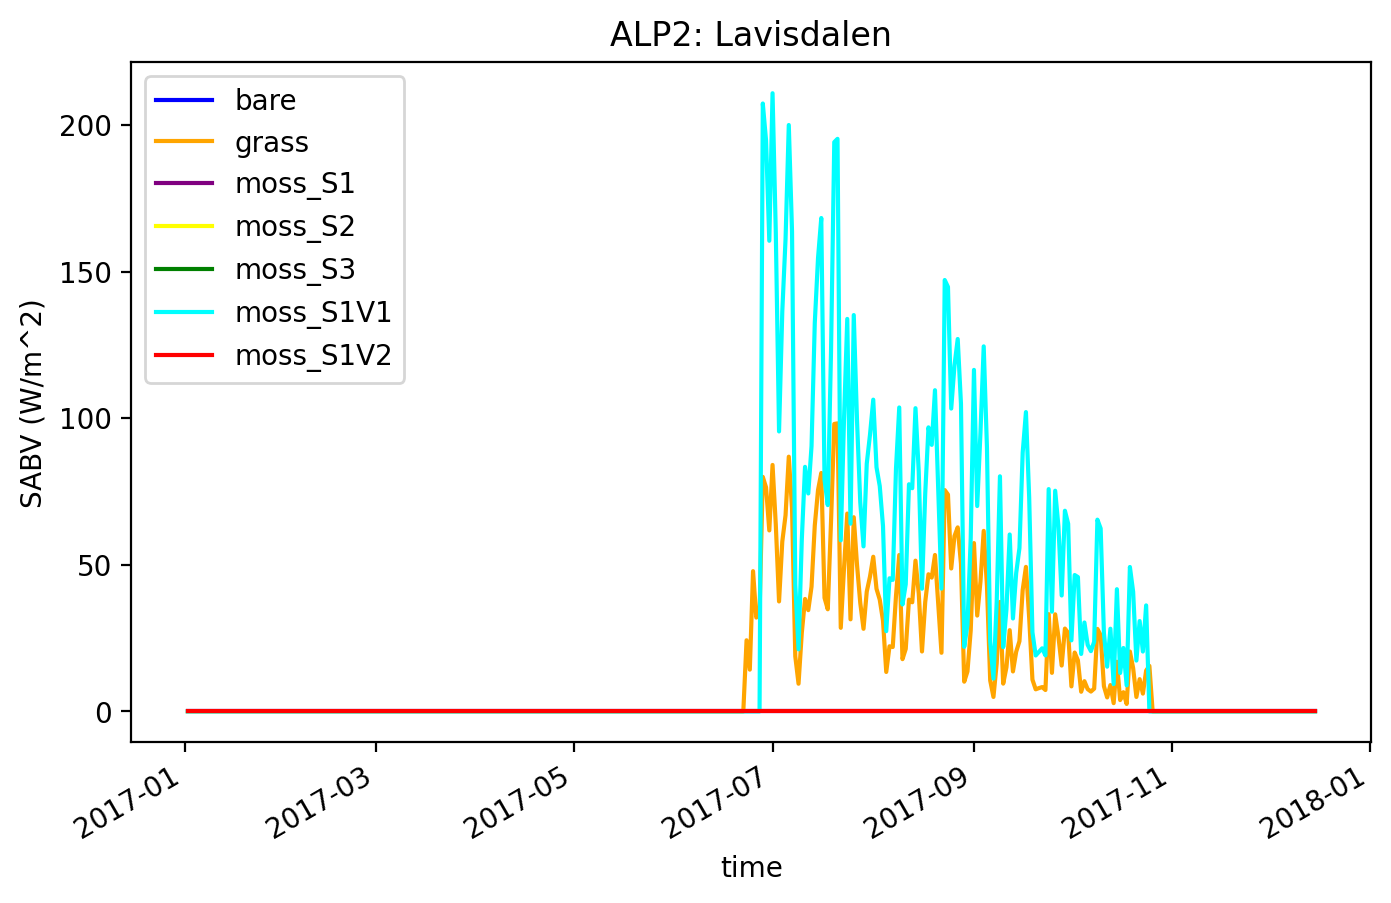

In [124]:
plt.figure(figsize=(8,5), dpi=200)

mask1=732
mask2=1080
mask3=850
mask4=950

plt.plot(dbare.indexes['time'][mask1:mask2],dbare['SABV'][mask1:mask2,0].data,label='bare', color='blue',zorder=1)
plt.plot(dgrass.indexes['time'][mask1:mask2],dgrass['SABV'][mask1:mask2,0].data,label='grass', color='orange',zorder=1)
plt.plot(dmoss_S1.indexes['time'][mask1:mask2],dmoss_S1['SABV'][mask1:mask2,0].data,label='moss_S1', color='purple')
plt.plot(dmoss_S2.indexes['time'][mask1:mask2],dmoss_S2['SABV'][mask1:mask2,0].data,label='moss_S2', color='yellow')
plt.plot(dmoss_S3.indexes['time'][mask1:mask2],dmoss_S3['SABV'][mask1:mask2,0].data,label='moss_S3', color='green')
plt.plot(dmoss_S1V1.indexes['time'][mask1:mask2],dmoss_S1V1['SABV'][mask1:mask2,0].data,label='moss_S1V1', color='cyan',zorder=1)
plt.plot(dmoss_S1V2.indexes['time'][mask1:mask2],dmoss_S1V2['SABV'][mask1:mask2,0].data,label='moss_S1V2', color='red',zorder=1)

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("SABV (W/m^2)")
plt.title(sites[i]+": "+siteID1[i])
plt.legend(loc='upper left')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_SABV_daily_2017.png", dpi=200)
plt.show()

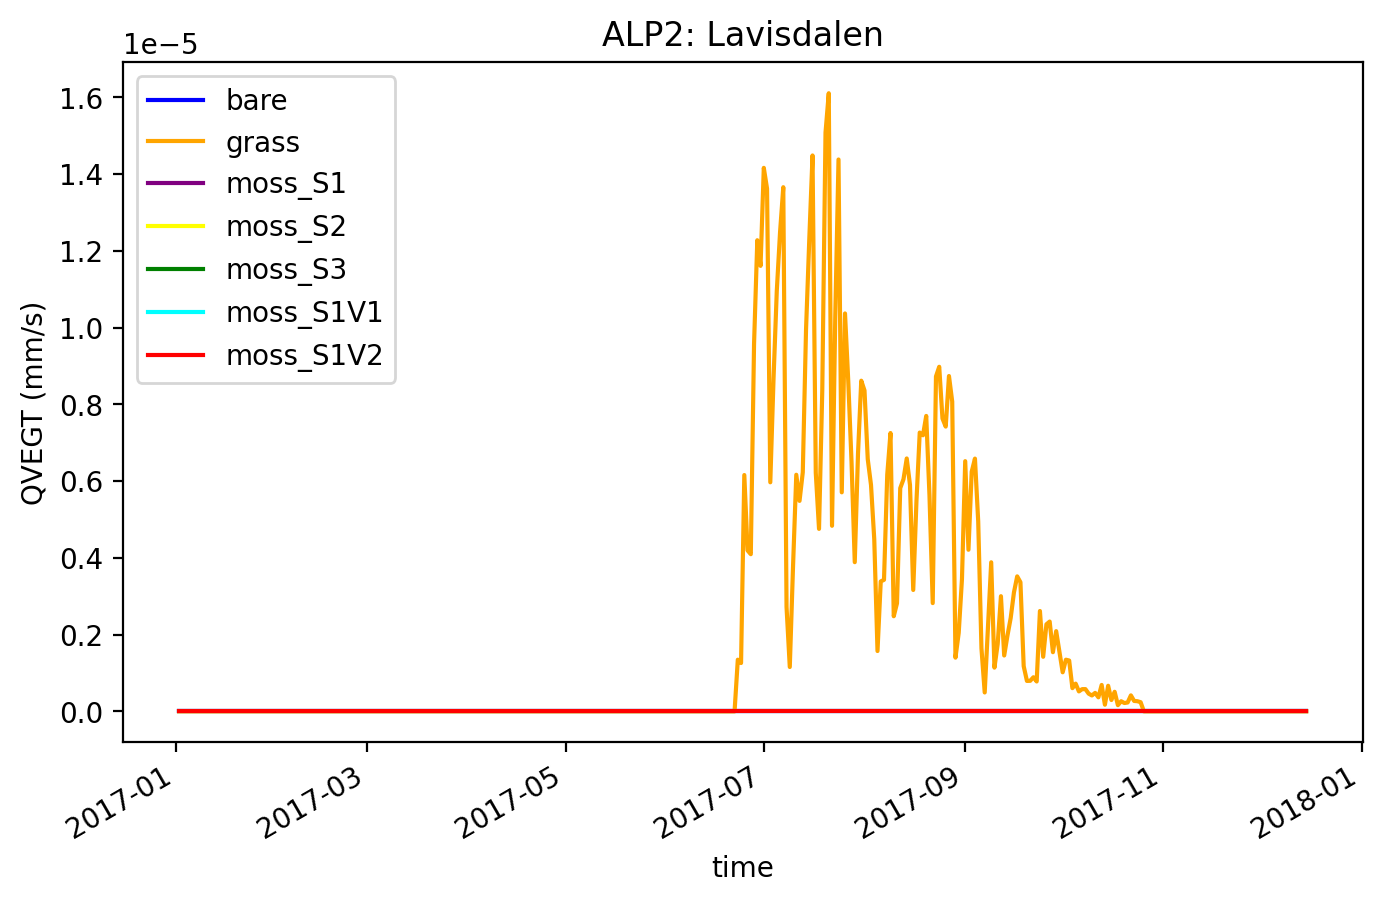

In [53]:
plt.figure(figsize=(8,5), dpi=200)

plt.plot(dbare.indexes['time'][mask1:mask2],dbare['QVEGT'][mask1:mask2,0].data,label='bare', color='blue',zorder=1)
plt.plot(dgrass.indexes['time'][mask1:mask2],dgrass['QVEGT'][mask1:mask2,0].data,label='grass', color='orange',zorder=1)
plt.plot(dmoss_S1.indexes['time'][mask1:mask2],dmoss_S1['QVEGT'][mask1:mask2,0].data,label='moss_S1', color='purple')
plt.plot(dmoss_S2.indexes['time'][mask1:mask2],dmoss_S2['QVEGT'][mask1:mask2,0].data,label='moss_S2', color='yellow')
plt.plot(dmoss_S3.indexes['time'][mask1:mask2],dmoss_S3['QVEGT'][mask1:mask2,0].data,label='moss_S3', color='green')
plt.plot(dmoss_S1V1.indexes['time'][mask1:mask2],dmoss_S1V1['QVEGT'][mask1:mask2,0].data,label='moss_S1V1', color='cyan',zorder=1)
plt.plot(dmoss_S1V2.indexes['time'][mask1:mask2],dmoss_S1V2['QVEGT'][mask1:mask2,0].data,label='moss_S1V2', color='red',zorder=1)

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("QVEGT (mm/s)")
plt.title(sites[i]+": "+siteID1[i])
plt.legend(loc='upper left')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_QVEGT_daily_2017.png", dpi=200)
plt.show()

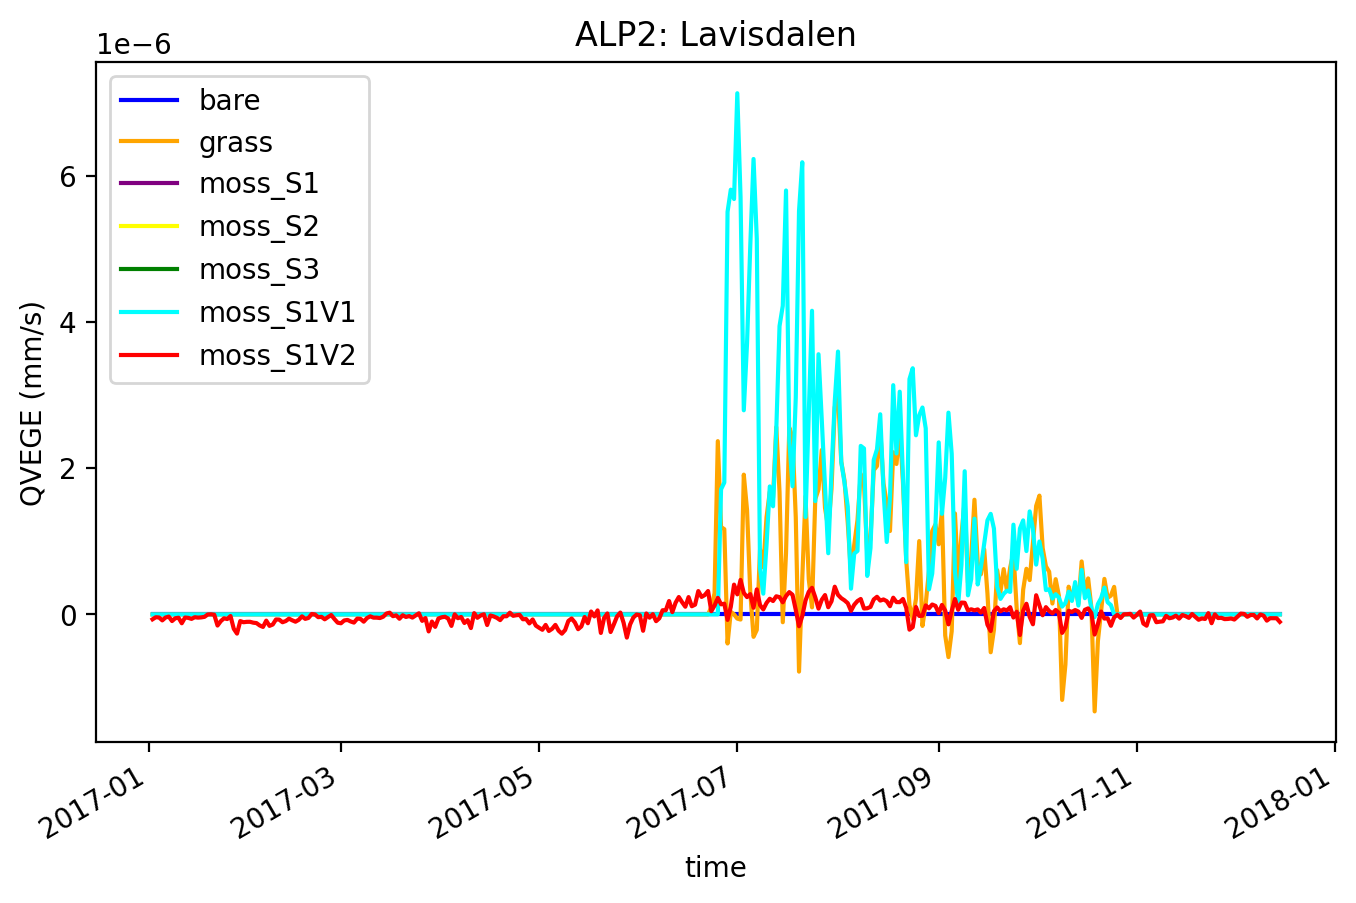

In [4]:
plt.figure(figsize=(8,5), dpi=200)

plt.plot(dbare.indexes['time'][mask1:mask2],dbare['QVEGE'][mask1:mask2,0].data,label='bare', color='blue',zorder=1)
plt.plot(dgrass.indexes['time'][mask1:mask2],dgrass['QVEGE'][mask1:mask2,0].data,label='grass', color='orange',zorder=1)
plt.plot(dmoss_S1.indexes['time'][mask1:mask2],dmoss_S1['QVEGE'][mask1:mask2,0].data,label='moss_S1', color='purple')
plt.plot(dmoss_S2.indexes['time'][mask1:mask2],dmoss_S2['QVEGE'][mask1:mask2,0].data,label='moss_S2', color='yellow')
plt.plot(dmoss_S3.indexes['time'][mask1:mask2],dmoss_S3['QVEGE'][mask1:mask2,0].data,label='moss_S3', color='green')
plt.plot(dmoss_S1V1.indexes['time'][mask1:mask2],dmoss_S1V1['QVEGE'][mask1:mask2,0].data,label='moss_S1V1', color='cyan',zorder=1)
plt.plot(dmoss_S1V2.indexes['time'][mask1:mask2],dmoss_S1V2['QVEGE'][mask1:mask2,0].data,label='moss_S1V2', color='red',zorder=1)

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("QVEGE (mm/s)")
plt.title(sites[i]+": "+siteID1[i])
plt.legend(loc='upper left')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_QVEGE_daily_2017.png", dpi=200)
plt.show()

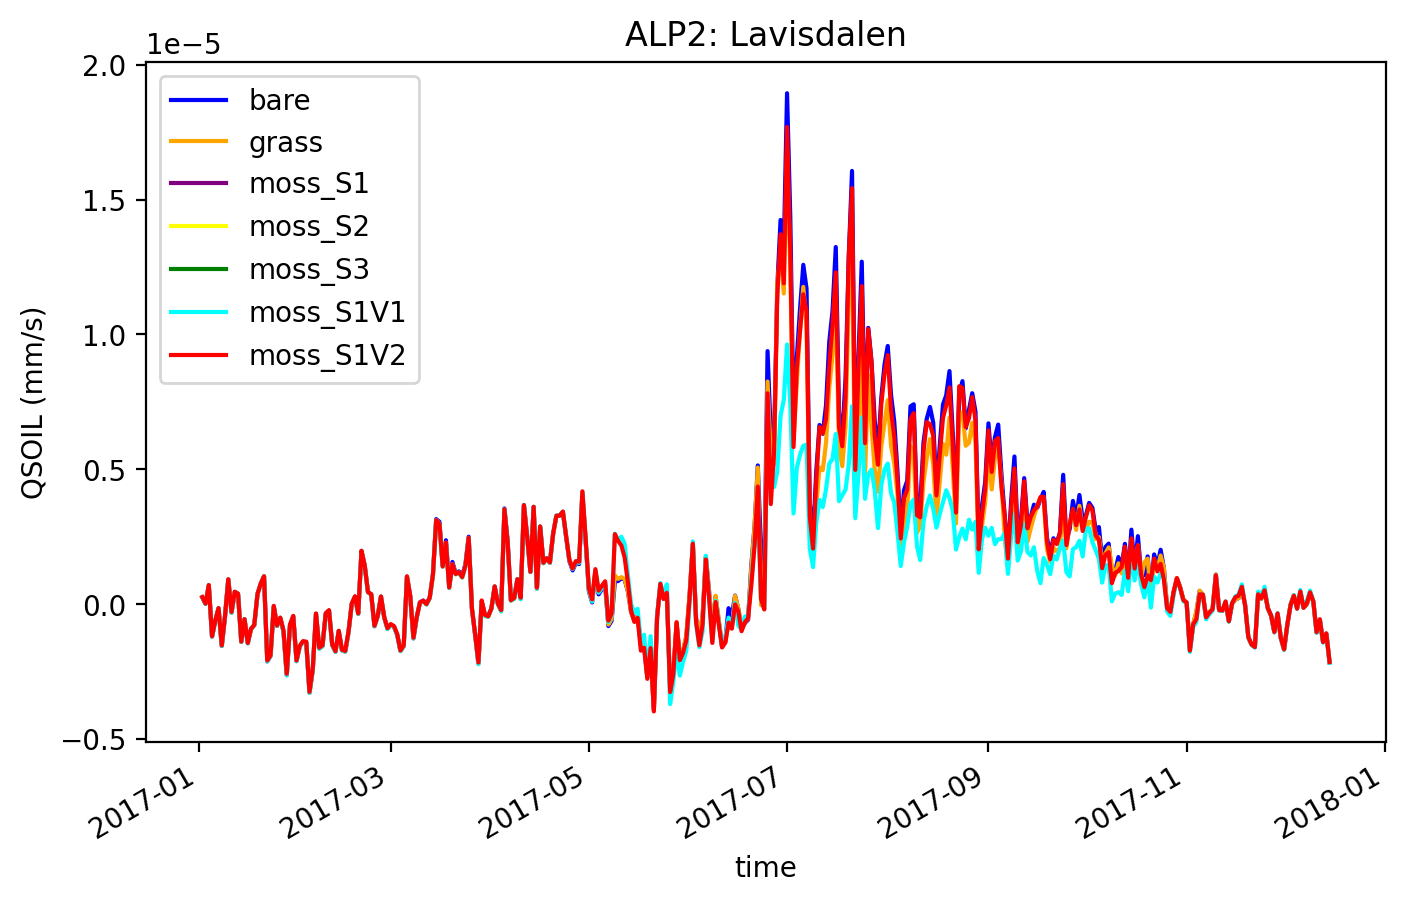

In [55]:
plt.figure(figsize=(8,5), dpi=200)

plt.plot(dbare.indexes['time'][mask1:mask2],dbare['QSOIL'][mask1:mask2,0].data,label='bare', color='blue',zorder=1)
plt.plot(dgrass.indexes['time'][mask1:mask2],dgrass['QSOIL'][mask1:mask2,0].data,label='grass', color='orange',zorder=1)
plt.plot(dmoss_S1.indexes['time'][mask1:mask2],dmoss_S1['QSOIL'][mask1:mask2,0].data,label='moss_S1', color='purple')
plt.plot(dmoss_S2.indexes['time'][mask1:mask2],dmoss_S2['QSOIL'][mask1:mask2,0].data,label='moss_S2', color='yellow')
plt.plot(dmoss_S3.indexes['time'][mask1:mask2],dmoss_S3['QSOIL'][mask1:mask2,0].data,label='moss_S3', color='green')
plt.plot(dmoss_S1V1.indexes['time'][mask1:mask2],dmoss_S1V1['QSOIL'][mask1:mask2,0].data,label='moss_S1V1', color='cyan',zorder=1)
plt.plot(dmoss_S1V2.indexes['time'][mask1:mask2],dmoss_S1V2['QSOIL'][mask1:mask2,0].data,label='moss_S1V2', color='red',zorder=1)

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("QSOIL (mm/s)")
plt.title(sites[i]+": "+siteID1[i])
plt.legend(loc='upper left')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_QSOIL_daily_2017.png", dpi=200)
plt.show()

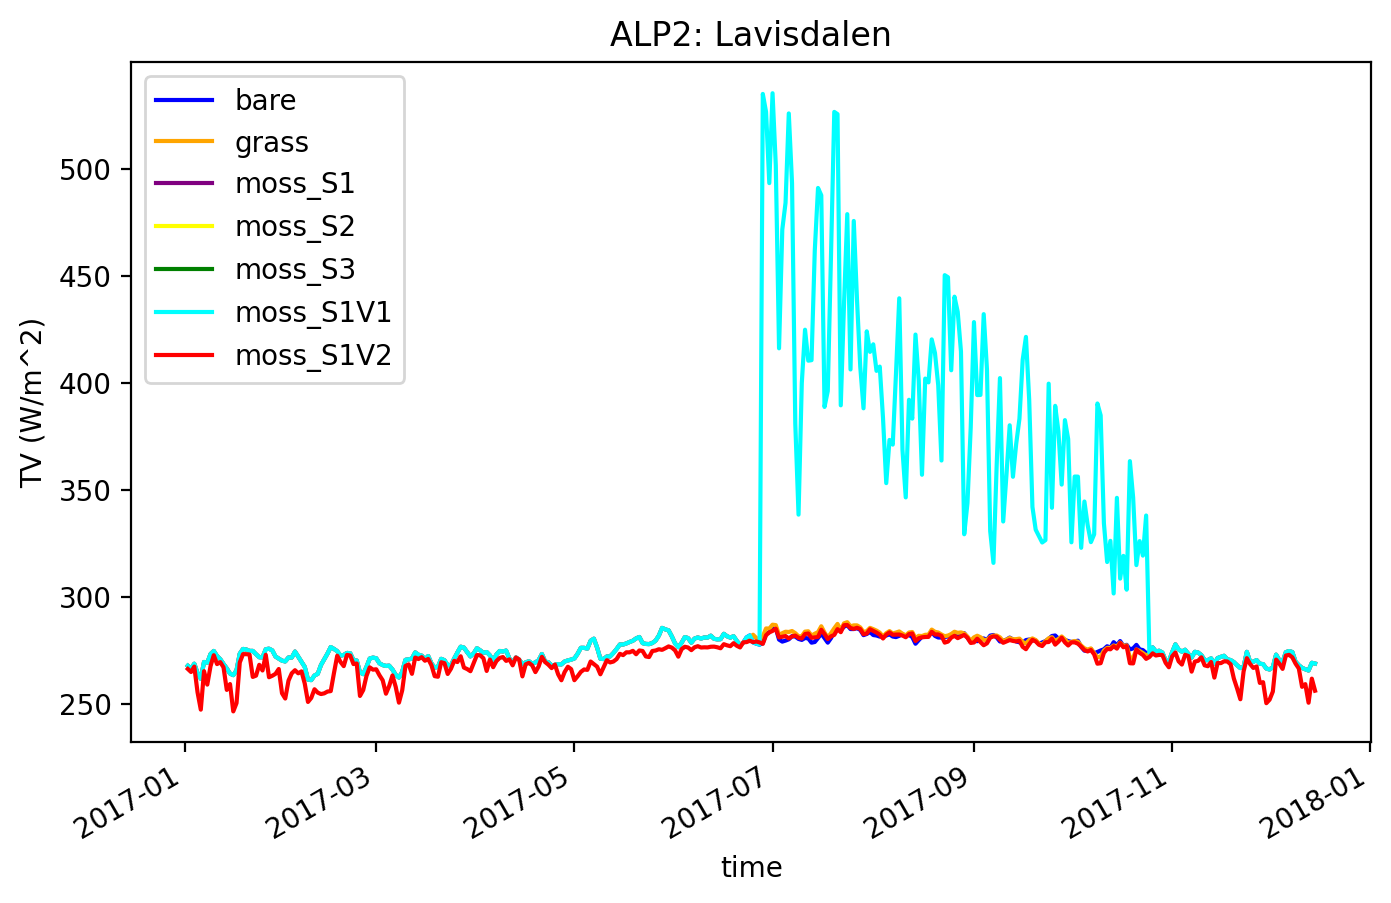

In [121]:
plt.figure(figsize=(8,5), dpi=200)

plt.plot(dbare.indexes['time'][mask1:mask2],dbare['TV'][mask1:mask2,0].data,label='bare', color='blue',zorder=1)
plt.plot(dgrass.indexes['time'][mask1:mask2],dgrass['TV'][mask1:mask2,0].data,label='grass', color='orange',zorder=1)
plt.plot(dmoss_S1.indexes['time'][mask1:mask2],dmoss_S1['TV'][mask1:mask2,0].data,label='moss_S1', color='purple')
plt.plot(dmoss_S2.indexes['time'][mask1:mask2],dmoss_S2['TV'][mask1:mask2,0].data,label='moss_S2', color='yellow')
plt.plot(dmoss_S3.indexes['time'][mask1:mask2],dmoss_S3['TV'][mask1:mask2,0].data,label='moss_S3', color='green')
plt.plot(dmoss_S1V1.indexes['time'][mask1:mask2],dmoss_S1V1['TV'][mask1:mask2,0].data,label='moss_S1V1', color='cyan',zorder=1)
plt.plot(dmoss_S1V2.indexes['time'][mask1:mask2],dmoss_S1V2['TV'][mask1:mask2,0].data,label='moss_S1V2', color='red',zorder=1)

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("TV (W/m^2)")
plt.title(sites[i]+": "+siteID1[i])
plt.legend(loc='upper left')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_TV_daily_2017.png", dpi=200)
plt.show()

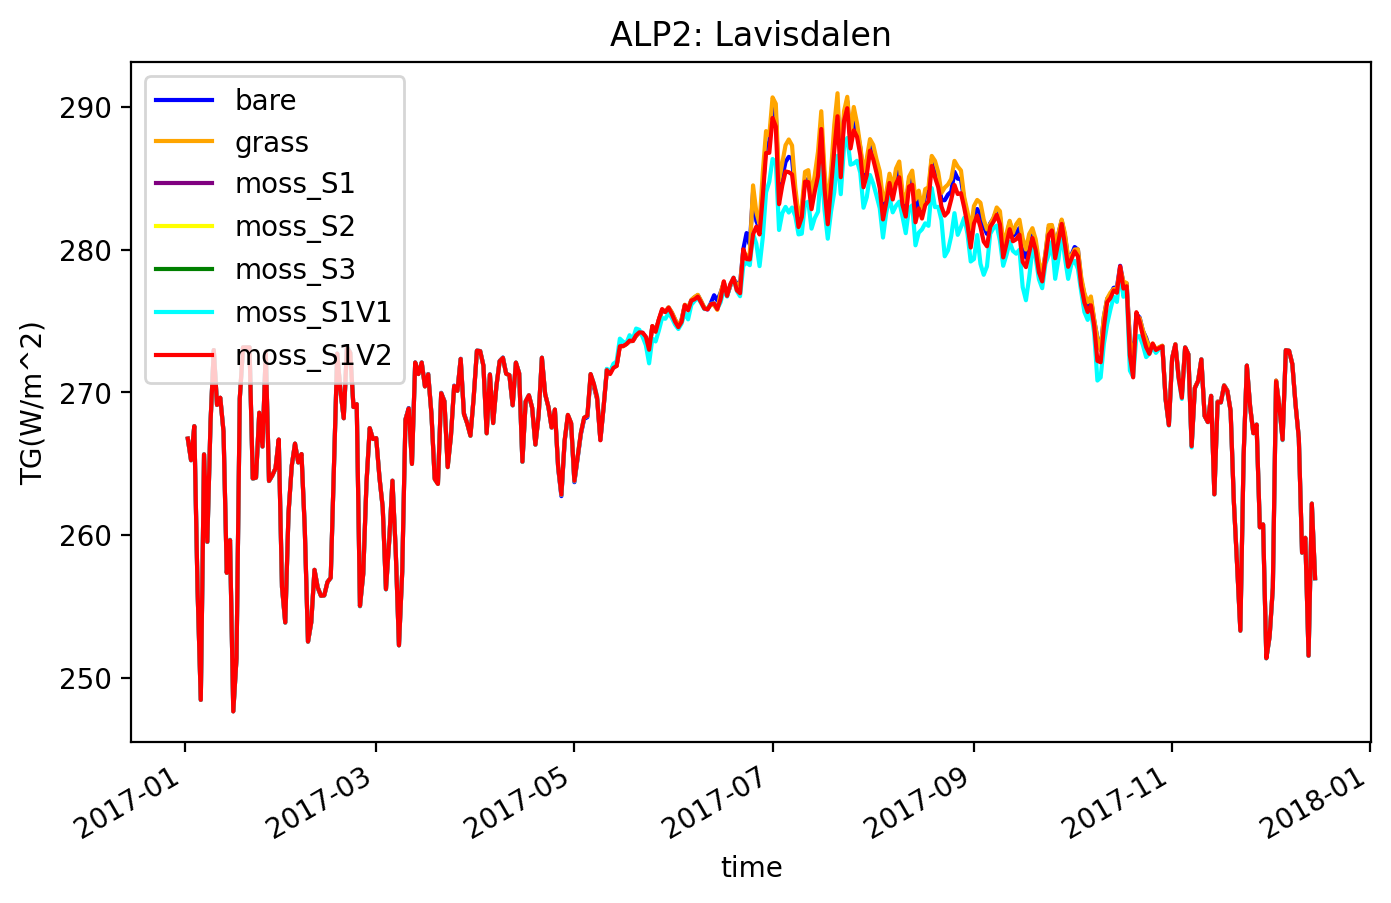

In [122]:
plt.figure(figsize=(8,5), dpi=200)

plt.plot(dbare.indexes['time'][mask1:mask2],dbare['TG'][mask1:mask2,0].data,label='bare', color='blue',zorder=1)
plt.plot(dgrass.indexes['time'][mask1:mask2],dgrass['TG'][mask1:mask2,0].data,label='grass', color='orange',zorder=1)
plt.plot(dmoss_S1.indexes['time'][mask1:mask2],dmoss_S1['TG'][mask1:mask2,0].data,label='moss_S1', color='purple')
plt.plot(dmoss_S2.indexes['time'][mask1:mask2],dmoss_S2['TG'][mask1:mask2,0].data,label='moss_S2', color='yellow')
plt.plot(dmoss_S3.indexes['time'][mask1:mask2],dmoss_S3['TG'][mask1:mask2,0].data,label='moss_S3', color='green')
plt.plot(dmoss_S1V1.indexes['time'][mask1:mask2],dmoss_S1V1['TG'][mask1:mask2,0].data,label='moss_S1V1', color='cyan',zorder=1)
plt.plot(dmoss_S1V2.indexes['time'][mask1:mask2],dmoss_S1V2['TG'][mask1:mask2,0].data,label='moss_S1V2', color='red',zorder=1)

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("TG(W/m^2)")
plt.title(sites[i]+": "+siteID1[i])
plt.legend(loc='upper left')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_TG_daily_2017.png", dpi=200)
plt.show()

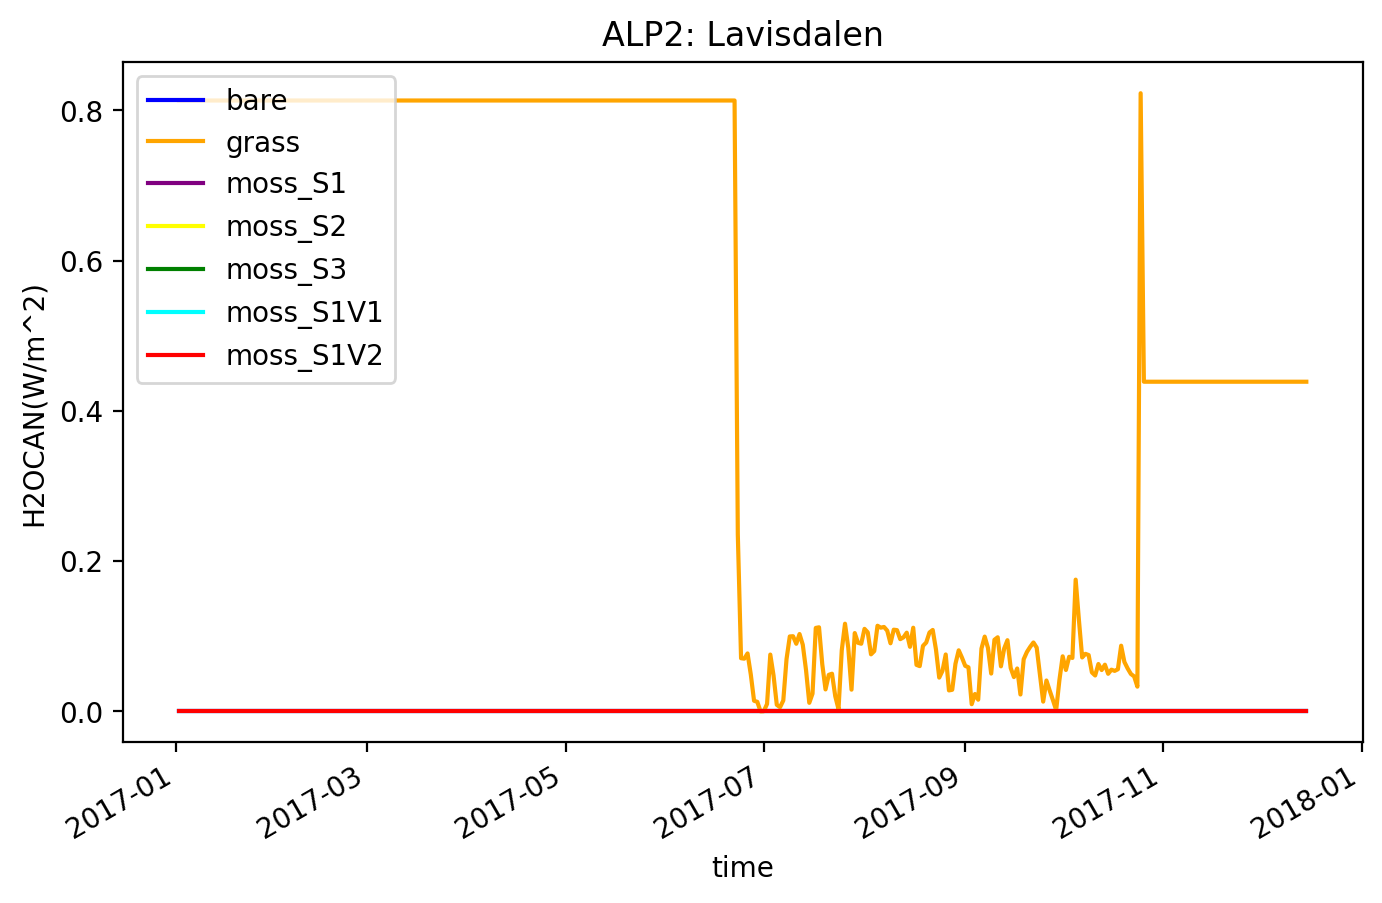

In [28]:
plt.figure(figsize=(8,5), dpi=200)

plt.plot(dbare.indexes['time'][mask1:mask2],dbare['H2OCAN'][mask1:mask2,0].data,label='bare', color='blue',zorder=1)
plt.plot(dgrass.indexes['time'][mask1:mask2],dgrass['H2OCAN'][mask1:mask2,0].data,label='grass', color='orange',zorder=1)
plt.plot(dmoss_S1.indexes['time'][mask1:mask2],dmoss_S1['H2OCAN'][mask1:mask2,0].data,label='moss_S1', color='purple')
plt.plot(dmoss_S2.indexes['time'][mask1:mask2],dmoss_S2['H2OCAN'][mask1:mask2,0].data,label='moss_S2', color='yellow')
plt.plot(dmoss_S3.indexes['time'][mask1:mask2],dmoss_S3['H2OCAN'][mask1:mask2,0].data,label='moss_S3', color='green')
plt.plot(dmoss_S1V1.indexes['time'][mask1:mask2],dmoss_S1V1['H2OCAN'][mask1:mask2,0].data,label='moss_S1V1', color='cyan',zorder=1)
plt.plot(dmoss_S1V2.indexes['time'][mask1:mask2],dmoss_S1V2['H2OCAN'][mask1:mask2,0].data,label='moss_S1V2', color='red',zorder=1)

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("H2OCAN(W/m^2)")
plt.title(sites[i]+": "+siteID1[i])
plt.legend(loc='upper left')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_H2OCAN_daily_2017.png", dpi=200)
plt.show()

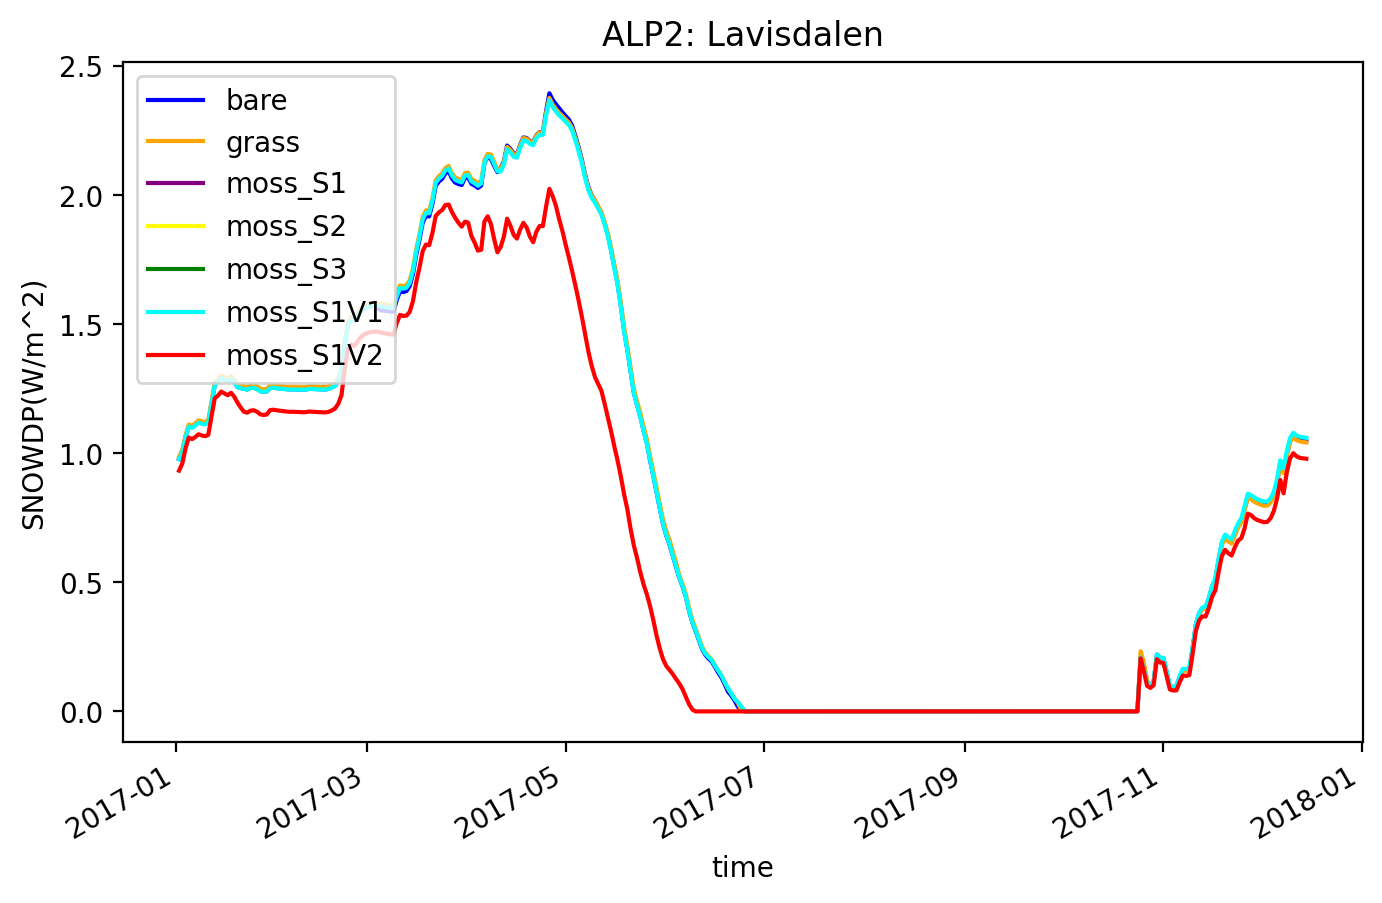

In [29]:
plt.figure(figsize=(8,5), dpi=200)

plt.plot(dbare.indexes['time'][mask1:mask2],dbare['SNOWDP'][mask1:mask2,0].data,label='bare', color='blue',zorder=1)
plt.plot(dgrass.indexes['time'][mask1:mask2],dgrass['SNOWDP'][mask1:mask2,0].data,label='grass', color='orange',zorder=1)
plt.plot(dmoss_S1.indexes['time'][mask1:mask2],dmoss_S1['SNOWDP'][mask1:mask2,0].data,label='moss_S1', color='purple')
plt.plot(dmoss_S2.indexes['time'][mask1:mask2],dmoss_S2['SNOWDP'][mask1:mask2,0].data,label='moss_S2', color='yellow')
plt.plot(dmoss_S3.indexes['time'][mask1:mask2],dmoss_S3['SNOWDP'][mask1:mask2,0].data,label='moss_S3', color='green')
plt.plot(dmoss_S1V1.indexes['time'][mask1:mask2],dmoss_S1V1['SNOWDP'][mask1:mask2,0].data,label='moss_S1V1', color='cyan',zorder=1)
plt.plot(dmoss_S1V2.indexes['time'][mask1:mask2],dmoss_S1V2['SNOWDP'][mask1:mask2,0].data,label='moss_S1V2', color='red',zorder=1)

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("SNOWDP(W/m^2)")
plt.title(sites[i]+": "+siteID1[i])
plt.legend(loc='upper left')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_SNOWDP_daily_2017.png", dpi=200)
plt.show()

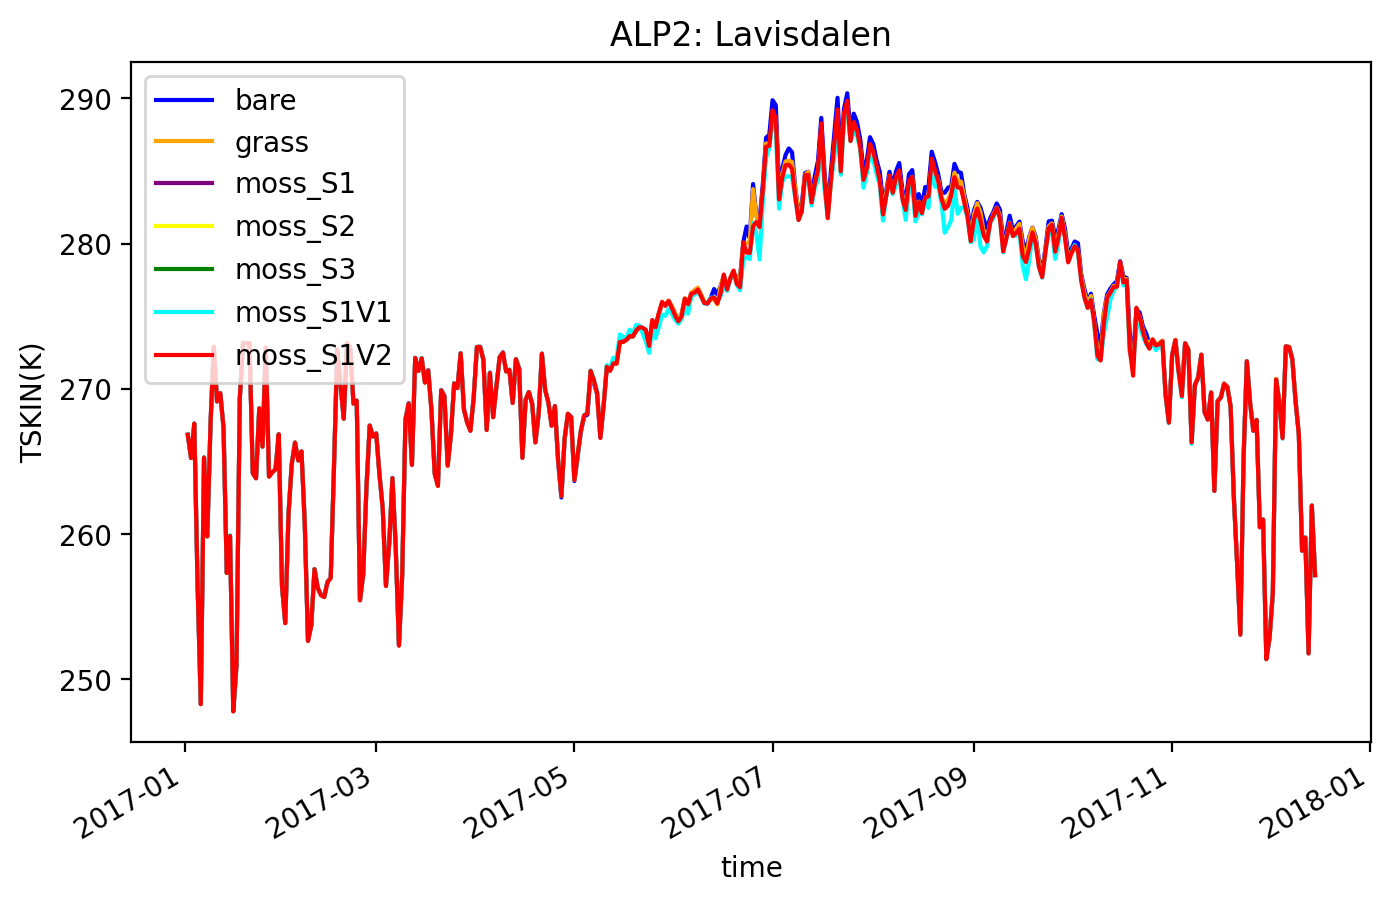

In [116]:
plt.figure(figsize=(8,5), dpi=200)

plt.plot(dbare.indexes['time'][mask1:mask2],dbare['TSKIN'][mask1:mask2,0].data,label='bare', color='blue',zorder=1)
plt.plot(dgrass.indexes['time'][mask1:mask2],dgrass['TSKIN'][mask1:mask2,0].data,label='grass', color='orange',zorder=1)
plt.plot(dmoss_S1.indexes['time'][mask1:mask2],dmoss_S1['TSKIN'][mask1:mask2,0].data,label='moss_S1', color='purple')
plt.plot(dmoss_S2.indexes['time'][mask1:mask2],dmoss_S2['TSKIN'][mask1:mask2,0].data,label='moss_S2', color='yellow')
plt.plot(dmoss_S3.indexes['time'][mask1:mask2],dmoss_S3['TSKIN'][mask1:mask2,0].data,label='moss_S3', color='green')
plt.plot(dmoss_S1V1.indexes['time'][mask1:mask2],dmoss_S1V1['TSKIN'][mask1:mask2,0].data,label='moss_S1V1', color='cyan',zorder=1)
plt.plot(dmoss_S1V2.indexes['time'][mask1:mask2],dmoss_S1V2['TSKIN'][mask1:mask2,0].data,label='moss_S1V2', color='red',zorder=1)

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("TSKIN(K)")
plt.title(sites[i]+": "+siteID1[i])
plt.legend(loc='upper left')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_TSKIN_daily_2017.png", dpi=200)
plt.show()

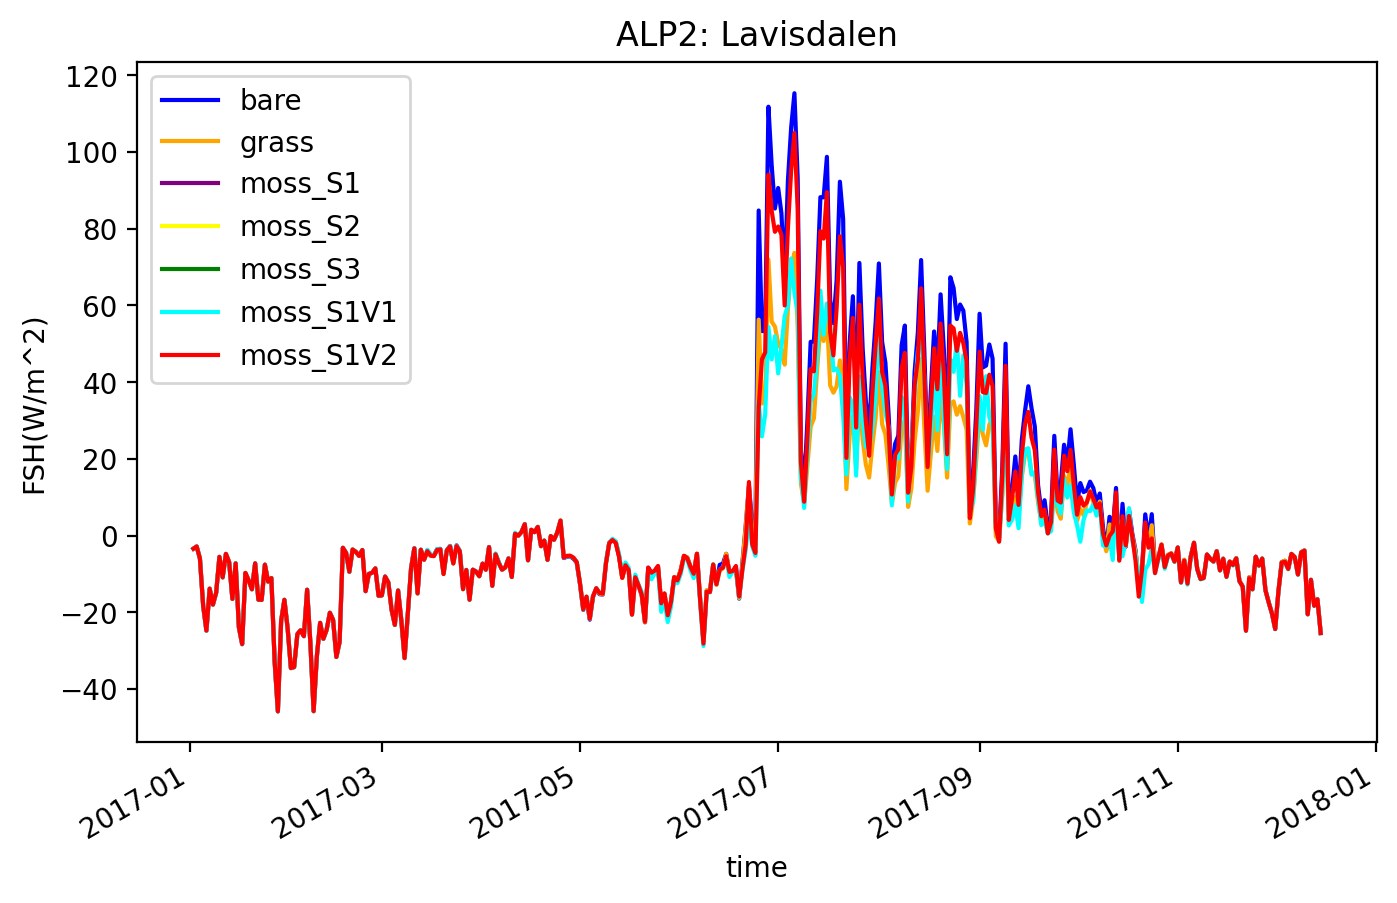

In [117]:
plt.figure(figsize=(8,5), dpi=200)

plt.plot(dbare.indexes['time'][mask1:mask2],dbare['FSH'][mask1:mask2,0].data,label='bare', color='blue',zorder=1)
plt.plot(dgrass.indexes['time'][mask1:mask2],dgrass['FSH'][mask1:mask2,0].data,label='grass', color='orange',zorder=1)
plt.plot(dmoss_S1.indexes['time'][mask1:mask2],dmoss_S1['FSH'][mask1:mask2,0].data,label='moss_S1', color='purple')
plt.plot(dmoss_S2.indexes['time'][mask1:mask2],dmoss_S2['FSH'][mask1:mask2,0].data,label='moss_S2', color='yellow')
plt.plot(dmoss_S3.indexes['time'][mask1:mask2],dmoss_S3['FSH'][mask1:mask2,0].data,label='moss_S3', color='green')
plt.plot(dmoss_S1V1.indexes['time'][mask1:mask2],dmoss_S1V1['FSH'][mask1:mask2,0].data,label='moss_S1V1', color='cyan',zorder=1)
plt.plot(dmoss_S1V2.indexes['time'][mask1:mask2],dmoss_S1V2['FSH'][mask1:mask2,0].data,label='moss_S1V2', color='red',zorder=1)

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("FSH(W/m^2)")
plt.title(sites[i]+": "+siteID1[i])
plt.legend(loc='upper left')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_FSH_daily_2017.png", dpi=200)
plt.show()

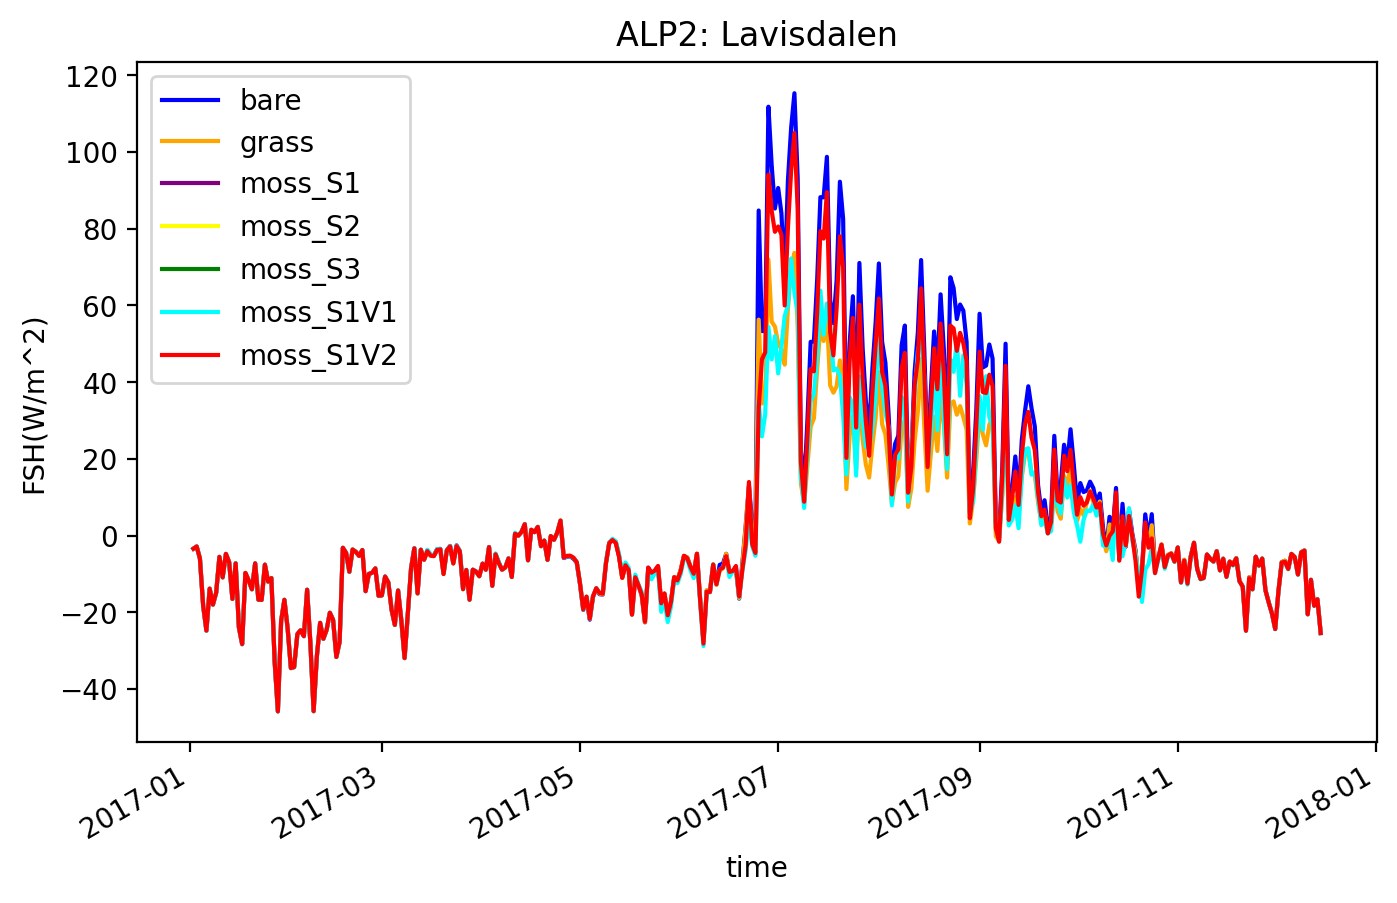

In [114]:
plt.figure(figsize=(8,5), dpi=200)

plt.plot(dbare.indexes['time'][mask1:mask2],dbare['FSH'][mask1:mask2,0].data,label='bare', color='blue',zorder=1)
plt.plot(dgrass.indexes['time'][mask1:mask2],dgrass['FSH'][mask1:mask2,0].data,label='grass', color='orange',zorder=1)
plt.plot(dmoss_S1.indexes['time'][mask1:mask2],dmoss_S1['FSH'][mask1:mask2,0].data,label='moss_S1', color='purple')
plt.plot(dmoss_S2.indexes['time'][mask1:mask2],dmoss_S2['FSH'][mask1:mask2,0].data,label='moss_S2', color='yellow')
plt.plot(dmoss_S3.indexes['time'][mask1:mask2],dmoss_S3['FSH'][mask1:mask2,0].data,label='moss_S3', color='green')
plt.plot(dmoss_S1V1.indexes['time'][mask1:mask2],dmoss_S1V1['FSH'][mask1:mask2,0].data,label='moss_S1V1', color='cyan',zorder=1)
plt.plot(dmoss_S1V2.indexes['time'][mask1:mask2],dmoss_S1V2['FSH'][mask1:mask2,0].data,label='moss_S1V2', color='red',zorder=1)

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("FSH(W/m^2)")
plt.title(sites[i]+": "+siteID1[i])
plt.legend(loc='upper left')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_FSH_daily_2017.png", dpi=200)
plt.show()

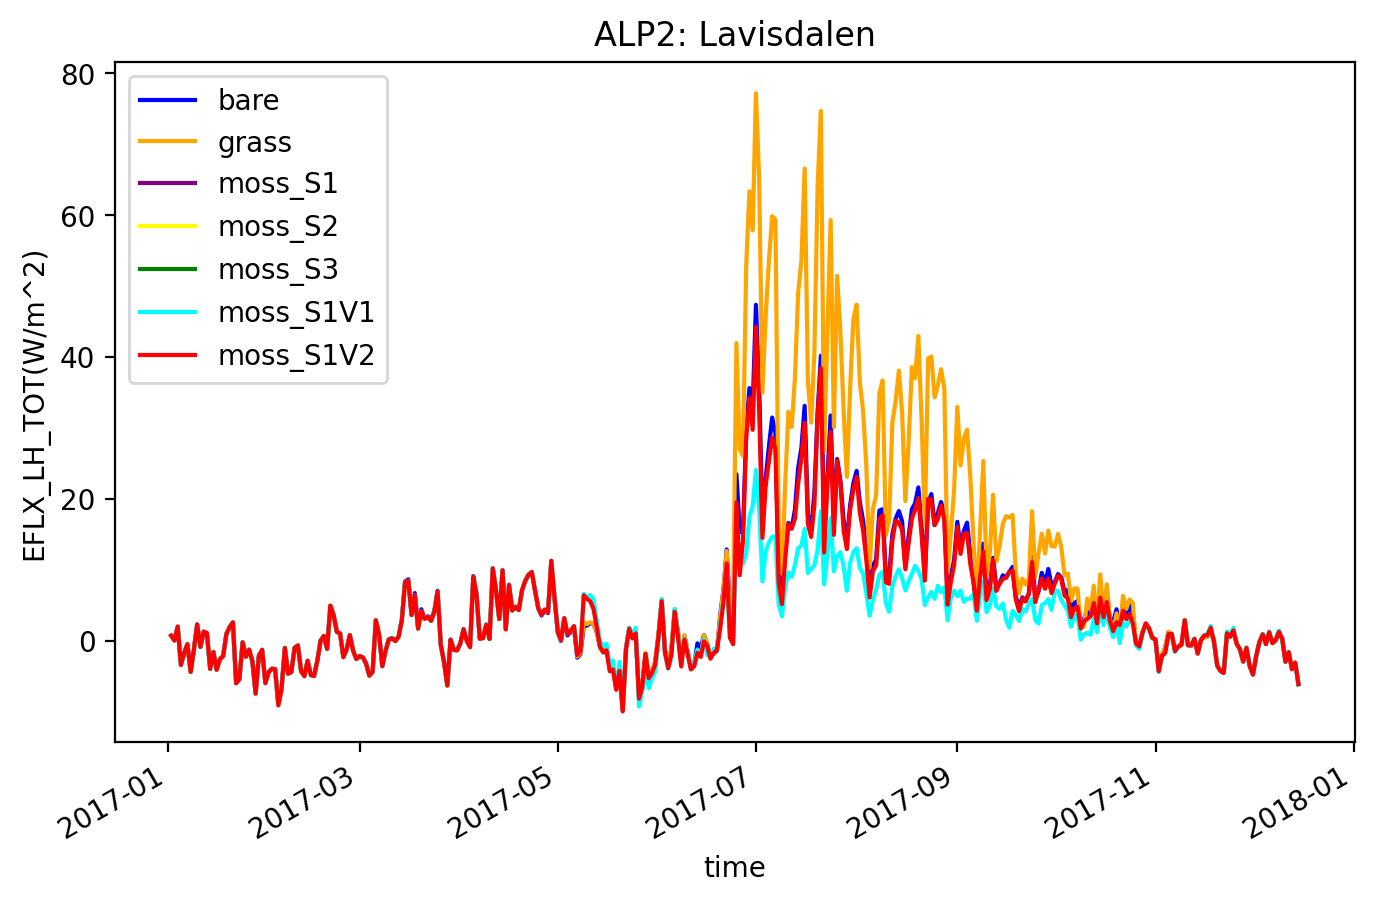

In [52]:
plt.figure(figsize=(8,5), dpi=200)

plt.plot(dbare.indexes['time'][mask1:mask2],dbare['EFLX_LH_TOT'][mask1:mask2,0].data,label='bare', color='blue',zorder=1)
plt.plot(dgrass.indexes['time'][mask1:mask2],dgrass['EFLX_LH_TOT'][mask1:mask2,0].data,label='grass', color='orange',zorder=1)
plt.plot(dmoss_S1.indexes['time'][mask1:mask2],dmoss_S1['EFLX_LH_TOT'][mask1:mask2,0].data,label='moss_S1', color='purple')
plt.plot(dmoss_S2.indexes['time'][mask1:mask2],dmoss_S2['EFLX_LH_TOT'][mask1:mask2,0].data,label='moss_S2', color='yellow')
plt.plot(dmoss_S3.indexes['time'][mask1:mask2],dmoss_S3['EFLX_LH_TOT'][mask1:mask2,0].data,label='moss_S3', color='green')
plt.plot(dmoss_S1V1.indexes['time'][mask1:mask2],dmoss_S1V1['EFLX_LH_TOT'][mask1:mask2,0].data,label='moss_S1V1', color='cyan',zorder=1)
plt.plot(dmoss_S1V2.indexes['time'][mask1:mask2],dmoss_S1V2['EFLX_LH_TOT'][mask1:mask2,0].data,label='moss_S1V2', color='red',zorder=1)

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("EFLX_LH_TOT(W/m^2)")
plt.title(sites[i]+": "+siteID1[i])
plt.legend(loc='upper left')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_EFLX_LH_TOT_daily_2017.png", dpi=200)
plt.show()

In [ ]:
plt.figure(figsize=(8,5), dpi=200)

plt.plot(dbare.indexes['time'][mask1:mask2],dbare['EFLX_LH_TOT'][mask1:mask2,0].data,label='bare', color='blue',zorder=1)
plt.plot(dgrass.indexes['time'][mask1:mask2],dgrass['EFLX_LH_TOT'][mask1:mask2,0].data,label='grass', color='orange',zorder=1)
plt.plot(dmoss_S1.indexes['time'][mask1:mask2],dmoss_S1['EFLX_LH_TOT'][mask1:mask2,0].data,label='moss_S1', color='purple')
plt.plot(dmoss_S2.indexes['time'][mask1:mask2],dmoss_S2['EFLX_LH_TOT'][mask1:mask2,0].data,label='moss_S2', color='yellow')
plt.plot(dmoss_S3.indexes['time'][mask1:mask2],dmoss_S3['EFLX_LH_TOT'][mask1:mask2,0].data,label='moss_S3', color='green')
plt.plot(dmoss_S1V1.indexes['time'][mask1:mask2],dmoss_S1V1['EFLX_LH_TOT'][mask1:mask2,0].data,label='moss_S1V1', color='cyan',zorder=1)
plt.plot(dmoss_S1V2.indexes['time'][mask1:mask2],dmoss_S1V2['EFLX_LH_TOT'][mask1:mask2,0].data,label='moss_S1V2', color='red',zorder=1)

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("EFLX_LH_TOT(W/m^2)")
plt.title(sites[i]+": "+siteID1[i])
plt.legend(loc='upper left')
#plt.grid(True)
plt.savefig("/home/huitang/SynologyDrive/moss_lichen/sites_observation/"+sites[i]+"_EFLX_LH_TOT_daily_2017.png", dpi=200)
plt.show()